# ID를 기준으로 전처리를 진행한다.
Main Project_1.0에서 quality 데이터를 추가해주었다
* 전처리(그룹화) 과정을 넘기고 싶으면 "그룹데이터"를 검색

### errtype & errcode(상위 30개) 전처리
ID 별로 errtype과 errcode를 count해준다

In [115]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import gc
import random
import re
plt.style.use('fivethirtyeight') # 테마바꾸기
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tnrange, tqdm_notebook, notebook
import time

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler, scale

from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

from ngboost.ngboost import NGBoost
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli

from ngboost.learners import default_tree_learner
from ngboost.scores import CRPS, MLE
from ngboost.distns import LogNormal, Normal

from sklearn.metrics import *
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.datasets import make_blobs, load_boston
import matplotlib.cm as cm

In [4]:
#train 데이터와 test데이터의 경향을 먼저 살펴보자
train_err=pd.read_csv('train_err_data.csv')
test_err=pd.read_csv('test_err_data.csv')

In [7]:
train_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


In [8]:
test_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,30000,20201101030227,model_1,04.16.3553,31,1
1,30000,20201101030227,model_1,04.16.3553,33,2
2,30000,20201101030228,model_1,04.16.3553,15,1
3,30000,20201101030256,model_1,04.16.3553,22,1
4,30000,20201101030300,model_1,04.16.3553,11,1


In [9]:
#train 과 test의 errtype& errcode(상위30개)를 살펴본 결과 겹친다

#train_err['errtype'].unique()
#train_err['errtype'].unique()
#train_err['errcode'].unique()
#train_err['errcode'].unique()


## train 전처리

### errtype 전처리 (errtype 별 ID기준 count)

In [10]:
# errtype 별 count를 하기위해 onehot인코딩을 해준다
train_err_incoded=pd.get_dummies(train_err,columns=['errtype'])
train_err_incoded

,user_id,time,model_nm,fwver,errcode,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42
0,10000,20201101025616,model_3,05.15.2138,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10000,20201101030309,model_3,05.15.2138,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000,20201101030309,model_3,05.15.2138,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000,20201101050514,model_3,05.15.2138,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10000,20201101050515,model_3,05.15.2138,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16554659,24999,20201130172625,model_3,05.15.2138,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16554660,24999,20201130172625,model_3,05.15.2138,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16554661,24999,20201130172631,model_3,05.15.2138,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# ID를 기준으로 groupby하여 errtype 들을 더해주어 errtype 데이터를 생성한다
err_get=train_err_incoded.groupby(['user_id'])[ 'errtype_1',
       'errtype_2', 'errtype_3', 'errtype_4', 'errtype_5', 'errtype_6',
       'errtype_7', 'errtype_8', 'errtype_9', 'errtype_10', 'errtype_11',
       'errtype_12', 'errtype_13', 'errtype_14', 'errtype_15', 'errtype_16',
       'errtype_17', 'errtype_18', 'errtype_19', 'errtype_20', 'errtype_21',
       'errtype_22', 'errtype_23', 'errtype_24', 'errtype_25', 'errtype_26',
       'errtype_27', 'errtype_28', 'errtype_30', 'errtype_31', 'errtype_32',
       'errtype_33', 'errtype_34', 'errtype_35', 'errtype_36', 'errtype_37',
       'errtype_38', 'errtype_39', 'errtype_40', 'errtype_41', 'errtype_42'].sum()

In [12]:
# 다루기 쉽게 DaraFrame으로 전환해준다
errtype_train=pd.DataFrame(err_get)
errtype_train

,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42
user_id,,,,,,,,,,,,,,,,,,,,,
10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,0.0,...,10.0,18.0,0.0,1.0,1.0,0.0,0.0,113.0,56.0,1.0
10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,8.0,0.0,0.0,1.0,1.0,2.0,0.0,17.0,1.0,0.0
10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,...,16.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,4.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,...,16.0,17.0,0.0,1.0,1.0,0.0,0.0,58.0,8.0,5.0


### errcode의 상위 30개 전처리 
errcode의 상위 30개가 99%이상의 수를 나타내므로 임의로 30으로 선정하였다

In [13]:
# errcode의 종류가 너무 많아 상위 30개 외의 errcode는 "other"로 변경해준다
# 그를 위해 활용할 데이터 errcode_30을 생성


errcode_30=pd.DataFrame(train_err['errcode'].value_counts()[:30]).reset_index()
errcode_30.columns=['errcode','counts']
errcode_30.head()


,errcode,counts
0,1,8906967
1,0,2599123
2,connection timeout,1835600
3,B-A8002,897863
4,80,334018


In [14]:
#errcode_30 데이터를 원본 데이터에 merge 시키면 30개에 해당하지 않는 errcode는 nan이 됨을 이용한다.

train_errcode=pd.merge(train_err,errcode_30,on='errcode',how='left')
train_errcode['counts']=train_errcode['counts'].fillna(0) # nan을 0으로 전환해준다(counts를 합쳤기에 원래는 0이 없었음)

In [15]:
#counts가 0인(30개에 들지 못하는) errcode들을 'other'로 변경해준다.¶
train_errcode['errcode'][train_errcode['counts']==0]='other'
train_errcode['errcode'].value_counts()

1                                     8906967
0                                     2599123
connection timeout                    1835600
B-A8002                                897863
80                                     334018
79                                     332422
14                                     263577
active                                 219238
2                                      166382
84                                     129876
85                                     127744
standby                                110370
NFANDROID2                             104138
connection fail to establish           100940
3                                       91223
90                                      65992
89                                      64799
other                                   38497
S-61001                                 34631
95                                      23452
94                                      22118
4                                 

In [16]:
train_errcode['errcode'].unique()

array(['1', '0', '2', 'NFANDROID2', 'B-A8002', '14', '4', '13', '3',
       '8.0', 'standby', 'active', 'Q-64002', 'connection timeout',
       'S-61001', 'other', 'connection fail to establish', '80', '79',
       '81', '86', '84', 'connectionterminated by local host', '78', '85',
       '90', '89', '95', '94', '6', '5'], dtype=object)

In [17]:
#errcode를 원핫 인코딩해주고 id를 기준으로 groupby 하여 sum을 해준다

#원핫인코딩
train_errcode_OH=pd.get_dummies(train_errcode,columns=['errcode'])
train_errcode_OH

,user_id,time,model_nm,fwver,errtype,counts,errcode_0,errcode_1,errcode_13,errcode_14,...,errcode_B-A8002,errcode_NFANDROID2,errcode_Q-64002,errcode_S-61001,errcode_active,errcode_connection fail to establish,errcode_connection timeout,errcode_connectionterminated by local host,errcode_other,errcode_standby
0,10000,20201101025616,model_3,05.15.2138,15,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10000,20201101030309,model_3,05.15.2138,12,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000,20201101030309,model_3,05.15.2138,11,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000,20201101050514,model_3,05.15.2138,16,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10000,20201101050515,model_3,05.15.2138,4,2599123.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16554659,24999,20201130172625,model_3,05.15.2138,16,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16554660,24999,20201130172625,model_3,05.15.2138,4,2599123.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16554661,24999,20201130172631,model_3,05.15.2138,4,2599123.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#ID를 기준으로 groupby해주어 sum해준다
# other를 제외한 errcode들을 groupby 해줌
errcode_train=train_errcode_OH.groupby(['user_id'])['errcode_0', 'errcode_1', 'errcode_13', 'errcode_14', 'errcode_2',
       'errcode_3', 'errcode_4', 'errcode_5', 'errcode_6', 'errcode_78',
       'errcode_79', 'errcode_8.0', 'errcode_80', 'errcode_81', 'errcode_84',
       'errcode_85', 'errcode_86', 'errcode_89', 'errcode_90', 'errcode_94',
       'errcode_95', 'errcode_B-A8002', 'errcode_NFANDROID2',
       'errcode_Q-64002', 'errcode_S-61001', 'errcode_active',
       'errcode_connection fail to establish', 'errcode_connection timeout',
       'errcode_connectionterminated by local host','errcode_standby'].sum()

In [19]:
errcode_train=pd.DataFrame(errcode_train)
errcode_train

,errcode_0,errcode_1,errcode_13,errcode_14,errcode_2,errcode_3,errcode_4,errcode_5,errcode_6,errcode_78,...,errcode_95,errcode_B-A8002,errcode_NFANDROID2,errcode_Q-64002,errcode_S-61001,errcode_active,errcode_connection fail to establish,errcode_connection timeout,errcode_connectionterminated by local host,errcode_standby
user_id,,,,,,,,,,,,,,,,,,,,,
10000,104.0,212.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001,183.0,1274.0,1.0,16.0,7.0,5.0,18.0,0.0,0.0,0.0,...,0.0,53.0,56.0,0.0,0.0,126.0,0.0,0.0,0.0,625.0
10002,132.0,172.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10003,42.0,229.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,12.0,0.0,7.0,0.0,0.0
10004,98.0,529.0,3.0,9.0,14.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,1.0,104.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,22.0,125.0,4.0,14.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,2.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0
24996,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,146.0,598.0,1.0,2.0,20.0,13.0,0.0,0.0,0.0,0.0,...,0.0,8.0,8.0,0.0,0.0,4.0,0.0,13.0,1.0,11.0


## errtype_train 과 errcode_train을 결합하여 err_group_ID_train 데이터 생성

In [20]:
err_group_ID_train=pd.concat([errtype_train,errcode_train],axis=1).reset_index() #결합한 후 user_id를 꺼내기 위해 reset_index()활용
err_group_ID_train

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errcode_95,errcode_B-A8002,errcode_NFANDROID2,errcode_Q-64002,errcode_S-61001,errcode_active,errcode_connection fail to establish,errcode_connection timeout,errcode_connectionterminated by local host,errcode_standby
0,10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,...,0.0,53.0,56.0,0.0,0.0,126.0,0.0,0.0,0.0,625.0
2,10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,12.0,0.0,7.0,0.0,0.0
4,10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,1.0,104.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,...,0.0,2.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0
14996,24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,24997,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,...,0.0,8.0,8.0,0.0,0.0,4.0,0.0,13.0,1.0,11.0
14998,24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
#csv로 꺼내기
err_group_ID_train.to_csv(r"err_group_ID_train.csv", index=False)

## test전처리
#### train과 동일한 방식을 사용하며 errcode의 상위 30개 역시 train과 동일하게 사용한다

### errtype 전처리
방식은 train과 동일

In [22]:
# errtype 별 count를 하기위해 onehot인코딩을 해준다
test_err_incoded=pd.get_dummies(test_err,columns=['errtype'])
test_err_incoded

,user_id,time,model_nm,fwver,errcode,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42
0,30000,20201101030227,model_1,04.16.3553,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000,20201101030227,model_1,04.16.3553,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,30000,20201101030228,model_1,04.16.3553,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30000,20201101030256,model_1,04.16.3553,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30000,20201101030300,model_1,04.16.3553,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16532643,44998,20201130210050,model_1,04.16.3553,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16532644,44998,20201130211831,model_1,04.16.3553,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16532645,44998,20201130211832,model_1,04.16.3553,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16532646,44998,20201130212259,model_1,04.16.3553,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# ID를 기준으로 groupby하여 errtype 들을 더해주어 errtype 데이터를 생성한다
err_get_test=test_err_incoded.groupby(['user_id'])[ 'errtype_1',
       'errtype_2', 'errtype_3', 'errtype_4', 'errtype_5', 'errtype_6',
       'errtype_7', 'errtype_8', 'errtype_9', 'errtype_10', 'errtype_11',
       'errtype_12', 'errtype_13', 'errtype_14', 'errtype_15', 'errtype_16',
       'errtype_17', 'errtype_18', 'errtype_19', 'errtype_20', 'errtype_21',
       'errtype_22', 'errtype_23', 'errtype_24', 'errtype_25', 'errtype_26',
       'errtype_27', 'errtype_28', 'errtype_30', 'errtype_31', 'errtype_32',
       'errtype_33', 'errtype_34', 'errtype_35', 'errtype_36', 'errtype_37',
       'errtype_38', 'errtype_39', 'errtype_40', 'errtype_41', 'errtype_42'].sum()

In [24]:
# 다루기 쉽게 DaraFrame으로 전환해준다
errtype_test=pd.DataFrame(err_get_test)
errtype_test

,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,...,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42
user_id,,,,,,,,,,,,,,,,,,,,,
30000,0.0,0.0,0.0,0.0,62.0,1.0,1.0,0.0,0.0,0.0,...,16.0,0.0,1.0,3.0,3.0,0.0,2.0,92.0,0.0,2.0
30001,0.0,0.0,3.0,98.0,3.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30002,0.0,0.0,0.0,0.0,79.0,2.0,1.0,0.0,0.0,0.0,...,16.0,0.0,0.0,1.0,1.0,0.0,14.0,113.0,1.0,2.0
30003,0.0,0.0,0.0,0.0,107.0,2.0,2.0,0.0,0.0,0.0,...,4.0,16.0,3.0,1.0,1.0,0.0,0.0,40.0,8.0,0.0
30004,0.0,0.0,0.0,2.0,6.0,1.0,1.0,0.0,0.0,0.0,...,11.0,6.0,1.0,1.0,1.0,1.0,0.0,48.0,90.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,0.0,0.0,0.0,2.0,12.0,5.0,5.0,0.0,0.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,87.0,0.0
44995,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,14.0,1.0,0.0,1.0,1.0,0.0,0.0,12.0,17.0,0.0
44996,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12.0,1118.0,0.0,1.0,1.0,1.0,0.0,329.0,2.0,3.0


### errcode의 상위 30개 전처리 
train과 같은 기준을 사용하므로 앞서 생성한 errcode_30 데이터를 활용한다.

In [25]:
#errcode_30 데이터를 원본 데이터에 merge 시키면 30개에 해당하지 않는 errcode는 nan이 됨을 이용한다.

test_errcode=pd.merge(test_err,errcode_30,on='errcode',how='left')
test_errcode['counts']=test_errcode['counts'].fillna(0) # nan을 0으로 전환해준다(counts를 합쳤기에 원래는 0이 없었음)

In [26]:
#counts가 0인(30개에 들지 못하는) errcode들을 'other'로 변경해준다.¶
test_errcode['errcode'][test_errcode['counts']==0]='other'
test_errcode['errcode'].value_counts()

1                                     8750154
0                                     2565532
connection timeout                    1890632
B-A8002                                855747
80                                     326179
79                                     324186
14                                     316110
active                                 225519
2                                      155401
84                                     140642
standby                                139947
85                                     139255
connection fail to establish           109690
NFANDROID2                             108244
3                                       86451
connectionterminated by local host      84809
90                                      58820
89                                      57718
other                                   37704
S-61001                                 35026
4                                       19084
95                                

In [27]:
#errcode를 원핫 인코딩해주고 id를 기준으로 groupby 하여 sum을 해준다

#원핫인코딩
test_errcode_OH=pd.get_dummies(test_errcode,columns=['errcode'])
test_errcode_OH

,user_id,time,model_nm,fwver,errtype,counts,errcode_0,errcode_1,errcode_13,errcode_14,...,errcode_B-A8002,errcode_NFANDROID2,errcode_Q-64002,errcode_S-61001,errcode_active,errcode_connection fail to establish,errcode_connection timeout,errcode_connectionterminated by local host,errcode_other,errcode_standby
0,30000,20201101030227,model_1,04.16.3553,31,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000,20201101030227,model_1,04.16.3553,33,166382.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30000,20201101030228,model_1,04.16.3553,15,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30000,20201101030256,model_1,04.16.3553,22,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30000,20201101030300,model_1,04.16.3553,11,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16532643,44998,20201130210050,model_1,04.16.3553,40,2599123.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16532644,44998,20201130211831,model_1,04.16.3553,31,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16532645,44998,20201130211832,model_1,04.16.3553,15,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16532646,44998,20201130212259,model_1,04.16.3553,16,8906967.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#ID를 기준으로 groupby해주어 sum해준다
# other를 제외한 errcode들을 groupby 해줌
errcode_test=test_errcode_OH.groupby(['user_id'])['errcode_0', 'errcode_1', 'errcode_13', 'errcode_14', 'errcode_2',
       'errcode_3', 'errcode_4', 'errcode_5', 'errcode_6', 'errcode_78',
       'errcode_79', 'errcode_8.0', 'errcode_80', 'errcode_81', 'errcode_84',
       'errcode_85', 'errcode_86', 'errcode_89', 'errcode_90', 'errcode_94',
       'errcode_95', 'errcode_B-A8002', 'errcode_NFANDROID2',
       'errcode_Q-64002', 'errcode_S-61001', 'errcode_active',
       'errcode_connection fail to establish', 'errcode_connection timeout',
       'errcode_connectionterminated by local host','errcode_standby'].sum()

In [29]:
errcode_test=pd.DataFrame(errcode_test)
errcode_test

,errcode_0,errcode_1,errcode_13,errcode_14,errcode_2,errcode_3,errcode_4,errcode_5,errcode_6,errcode_78,...,errcode_95,errcode_B-A8002,errcode_NFANDROID2,errcode_Q-64002,errcode_S-61001,errcode_active,errcode_connection fail to establish,errcode_connection timeout,errcode_connectionterminated by local host,errcode_standby
user_id,,,,,,,,,,,,,,,,,,,,,
30000,90.0,1251.0,0.0,14.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,53.0,0.0,0.0,9.0,141.0,55.0,1107.0,0.0,4.0
30001,98.0,180.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
30002,186.0,614.0,0.0,4.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,77.0,1.0,0.0,0.0,7.0,0.0,26.0,0.0,6.0
30003,91.0,147.0,0.0,11.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,106.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30004,193.0,395.0,1.0,25.0,4.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,90.0,0.0,6.0,5.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,139.0,624.0,5.0,26.0,14.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,87.0,0.0,12.0,0.0,7.0,197.0,0.0,0.0
44995,105.0,370.0,2.0,6.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44996,251.0,698.0,3.0,4.0,529.0,573.0,6.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,104.0,4.0,44.0,0.0,11.0


## errtype_test 과 errcode_test을 결합하여 err_group_ID_test 데이터 생성

In [30]:
err_group_ID_test=pd.concat([errtype_test,errcode_test],axis=1).reset_index() #결합한 후 user_id를 꺼내기 위해 reset_index()활용
err_group_ID_test

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,errcode_95,errcode_B-A8002,errcode_NFANDROID2,errcode_Q-64002,errcode_S-61001,errcode_active,errcode_connection fail to establish,errcode_connection timeout,errcode_connectionterminated by local host,errcode_standby
0,30000,0.0,0.0,0.0,0.0,62.0,1.0,1.0,0.0,0.0,...,0.0,53.0,0.0,0.0,9.0,141.0,55.0,1107.0,0.0,4.0
1,30001,0.0,0.0,3.0,98.0,3.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30002,0.0,0.0,0.0,0.0,79.0,2.0,1.0,0.0,0.0,...,0.0,77.0,1.0,0.0,0.0,7.0,0.0,26.0,0.0,6.0
3,30003,0.0,0.0,0.0,0.0,107.0,2.0,2.0,0.0,0.0,...,0.0,106.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,30004,0.0,0.0,0.0,2.0,6.0,1.0,1.0,0.0,0.0,...,0.0,0.0,90.0,0.0,6.0,5.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,44994,0.0,0.0,0.0,2.0,12.0,5.0,5.0,0.0,0.0,...,0.0,0.0,87.0,0.0,12.0,0.0,7.0,197.0,0.0,0.0
14994,44995,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14995,44996,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,104.0,4.0,44.0,0.0,11.0
14996,44997,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,...,0.0,3.0,49.0,0.0,0.0,1655.0,1010.0,10449.0,1.0,20.0


In [31]:
#csv로 꺼내기
err_group_ID_test.to_csv(r"err_group_ID_test.csv", index=False)

## quality 전처리

### train 
#### quality 평균 데이터 생성

In [32]:
train_qual  = pd.read_csv('train_quality_data.csv',thousands = ',')
train_qual

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1.0,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0.0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3.0,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0.0,0,0,0,0,17,0,0


In [33]:
train_qual.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [34]:
#결측값들은 0으로 전환 (quality 같은 경우 중위값과 최빈값이 다 0)
train_qual.quality_0 = train_qual.quality_0.fillna(0)
train_qual.quality_2 = train_qual.quality_2.fillna(0)
train_qual.quality_5 = train_qual.quality_5.fillna(0)
train_qual.fwver = train_qual.fwver.fillna(0)
train_qual.isnull().sum()

time          0
user_id       0
fwver         0
quality_0     0
quality_1     0
quality_2     0
quality_3     0
quality_4     0
quality_5     0
quality_6     0
quality_7     0
quality_8     0
quality_9     0
quality_10    0
quality_11    0
quality_12    0
dtype: int64

In [35]:
train_qual.shape

(828624, 16)

In [36]:
#-1을 0으로 전환
train_qual_0 = train_qual.replace(-1,0)
train_qual_0

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1.0,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0.0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3.0,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0.0,0,0,0,0,17,0,0


In [37]:
# user_id 기준으로 groupby (3,4 는 train&test 전체에 0만 있어서 제외해준다)
train_quality_user_id = train_qual_0.groupby(['user_id'])[
    "quality_0","quality_1","quality_2",
    "quality_5","quality_6","quality_7","quality_8",
    "quality_9","quality_10","quality_11","quality_12"].mean()

In [38]:
train_quality_user_id #-1을 제외하고 평균을 낸 quality data

,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
user_id,,,,,,,,,,,
10000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000,6.000000,0.0,0.0
10002,0.020833,0.0,0.010417,0.322917,0.479167,5.750000,0.0,0.125,3.875000,0.0,0.0
10004,0.000000,0.0,0.000000,0.166667,3.625000,43.500000,0.0,0.000,2.000000,0.0,0.0
10005,0.000000,0.0,0.000000,0.416667,1.500000,18.000000,0.0,0.000,5.000000,0.0,0.0
10006,0.000000,0.0,0.000000,0.333333,0.111111,1.333333,0.0,0.000,4.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24990,0.000000,0.0,0.000000,0.083333,0.000000,0.000000,0.0,0.000,1.000000,0.0,0.0
24992,0.000000,0.0,0.000000,0.527778,0.000000,0.000000,0.0,0.000,6.333333,0.0,0.0
24993,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000,4.000000,0.0,0.0


#### train quality -1 count하는 데이터 생성

In [39]:
train_qul = pd.read_csv('train_quality_data.csv',thousands = ',')
train_qul

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0.0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1.0,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0.0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3.0,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0.0,0,0,0,0,17,0,0


In [40]:
train_qul['quality_0_minus']=train_qul['quality_0'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_1_minus']=train_qul['quality_1'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_2_minus']=train_qul['quality_2'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_3_minus']=train_qul['quality_3'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_4_minus']=train_qul['quality_4'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_5_minus']=train_qul['quality_5'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_6_minus']=train_qul['quality_6'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_7_minus']=train_qul['quality_7'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_8_minus']=train_qul['quality_8'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_9_minus']=train_qul['quality_9'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_10_minus']=train_qul['quality_10'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_11_minus']=train_qul['quality_11'].apply(lambda x : 1 if x<0 else 0)
train_qul['quality_12_minus']=train_qul['quality_12'].apply(lambda x : 1 if x<0 else 0)

In [41]:
train_qul.describe()

,time,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,...,quality_3_minus,quality_4_minus,quality_5_minus,quality_6_minus,quality_7_minus,quality_8_minus,quality_9_minus,quality_10_minus,quality_11_minus,quality_12_minus
count,8.286240e+05,828624.000000,684192.000000,828624.000000,788511.000000,828624.0,828624.0,828604.000000,828624.000000,828624.000000,...,828624.0,828624.0,828624.000000,828624.000000,828624.0,828624.0,828624.0,828624.0,828624.000000,828624.0
mean,2.020112e+13,17574.678315,4.148701,-0.171782,4.751094,0.0,0.0,74.533171,2.043391,26.744106,...,0.0,0.0,0.185071,0.185284,0.0,0.0,0.0,0.0,0.185462,0.0
std,8.863638e+06,4374.113554,479.315029,0.692386,586.252469,0.0,0.0,2278.661590,32.695380,317.874778,...,0.0,0.0,0.388355,0.388528,0.0,0.0,0.0,0.0,0.388672,0.0
min,2.020103e+13,10000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
25%,2.020111e+13,13685.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
50%,2.020112e+13,17597.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
75%,2.020112e+13,21423.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
max,2.020113e+13,24997.000000,157667.000000,171.000000,191859.000000,0.0,0.0,637385.000000,600.000000,7200.000000,...,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0


In [42]:
train_minus = train_qul.drop(["time","fwver","quality_0","quality_1","quality_2","quality_3","quality_4",
    "quality_5","quality_6","quality_7","quality_8",
    "quality_9","quality_10","quality_11","quality_12","quality_3_minus", "quality_4_minus"],axis=1)

In [43]:
train_minus.describe()

,user_id,quality_0_minus,quality_1_minus,quality_2_minus,quality_5_minus,quality_6_minus,quality_7_minus,quality_8_minus,quality_9_minus,quality_10_minus,quality_11_minus,quality_12_minus
count,828624.000000,828624.000000,828624.000000,828624.000000,828624.000000,828624.000000,828624.0,828624.0,828624.0,828624.0,828624.000000,828624.0
mean,17574.678315,0.157886,0.185427,0.174255,0.185071,0.185284,0.0,0.0,0.0,0.0,0.185462,0.0
std,4374.113554,0.364634,0.388644,0.379329,0.388355,0.388528,0.0,0.0,0.0,0.0,0.388672,0.0
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
25%,13685.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
50%,17597.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
75%,21423.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
max,24997.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0


In [44]:
train_quality_user_id_groupby_minus = train_minus.groupby(['user_id'])[
    "quality_0_minus","quality_1_minus","quality_2_minus","quality_5_minus",
    "quality_6_minus","quality_11_minus"].mean()

In [45]:
# -1 count해준 데이터
train_quality_user_id_groupby_minus=pd.DataFrame(train_quality_user_id_groupby_minus)

### train- errtype&errcode 에 quality 결합

In [46]:
train_group=pd.read_csv(r"err_group_ID_train.csv") #앞서 생성한 err 데이터 csv불러오기
train_group_qual=pd.merge(train_group,train_quality_user_id, on=['user_id'], how ='left')
train_group_quality=pd.merge(train_group_qual,train_quality_user_id_groupby_minus, on=['user_id'], how ='left')
train_group_quality_id=train_group_quality.fillna(0)
train_group_quality_id

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,quality_9,quality_10,quality_11,quality_12,quality_0_minus,quality_1_minus,quality_2_minus,quality_5_minus,quality_6_minus,quality_11_minus
0,10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,...,0.000,6.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,...,0.125,3.875,0.0,0.0,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833
3,10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,...,0.000,2.000,0.0,0.0,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,...,0.000,2.500,0.0,0.0,0.416667,0.416667,0.416667,0.416667,0.416667,0.416667
14996,24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14997,24997,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,...,0.000,9.500,0.0,0.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
14998,24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## test
### quality 평균 데이터 생성

In [47]:
test_qual  = pd.read_csv('test_quality_data.csv',thousands = ',')
test_qual

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
1,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
2,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
3,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
4,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747967,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,2.0,0,0,0,0,3,0,0
747968,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0
747969,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0
747970,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0


In [48]:
test_qual.isnull().sum()

time               0
user_id            0
fwver          22764
quality_0     106584
quality_1         11
quality_2      21115
quality_3          0
quality_4          0
quality_5         44
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

In [49]:
# NA 0으로 전환
test_qual.quality_0 = test_qual.quality_0.fillna(0)
test_qual.quality_1 = test_qual.quality_1.fillna(0)
test_qual.quality_2 = test_qual.quality_2.fillna(0)
test_qual.quality_5 = test_qual.quality_5.fillna(0)
test_qual.fwver = test_qual.fwver.fillna(0)
test_qual.isnull().sum()

time          0
user_id       0
fwver         0
quality_0     0
quality_1     0
quality_2     0
quality_3     0
quality_4     0
quality_5     0
quality_6     0
quality_7     0
quality_8     0
quality_9     0
quality_10    0
quality_11    0
quality_12    0
dtype: int64

In [50]:
#-1을 0으로 전환
test_qual_0 = test_qual.replace(-1,0)
test_qual_0

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
1,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
2,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
3,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
4,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747967,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,2.0,0,0,0,0,3,0,0
747968,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0
747969,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0
747970,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0


In [51]:
# user_id 기준으로 groupby (3,4 는 train&test 전체에 0만 있어서 제외해준다)
test_quality_user_id = test_qual_0.groupby(['user_id'])[
    "quality_0","quality_1","quality_2",
    "quality_5","quality_6","quality_7","quality_8",
    "quality_9","quality_10","quality_11","quality_12"].mean()

In [52]:
test_quality_user_id #-1을 제외하고 평균을 낸 quality data

,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
user_id,,,,,,,,,,,
30000,0.0000,0.0,0.0000,0.166667,0.416667,5.00,0.0,0.00,2.000000,0.0,0.0
30001,0.0000,0.0,0.0000,71.194444,0.000000,0.00,0.0,0.00,854.333333,0.0,0.0
30002,0.0000,0.0,0.0000,1.108333,0.000000,0.00,0.0,0.00,13.300000,0.0,0.0
30003,0.0000,0.0,0.0000,0.200000,3.666667,44.00,0.0,0.00,2.400000,0.0,0.0
30004,0.0000,0.0,0.0000,0.083333,1.375000,16.50,0.0,0.00,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44990,0.0000,0.0,0.0000,1.388889,0.000000,0.00,0.0,0.00,16.666667,0.0,0.0
44993,0.1875,0.0,0.1875,0.291667,2.270833,27.25,0.0,2.25,3.500000,0.0,0.0
44994,0.0000,0.0,0.0000,0.166667,0.000000,0.00,0.0,0.00,2.000000,0.0,0.0


### -1 count해주는 데이터

In [53]:
test_qul = pd.read_csv('test_quality_data.csv',thousands = ',')
test_qul

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
1,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
2,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
3,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
4,20201128195000,30000,04.33.1261,0.0,0.0,0.0,0,0,0.0,0,5,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747967,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,2.0,0,0,0,0,3,0,0
747968,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0
747969,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0
747970,20201125180000,44997,04.22.1750,0.0,0.0,0.0,0,0,0.0,0,0,0,0,3,0,0


In [54]:
#-1을 체크해주는 변수 quality_i_minus를 생성
test_qul['quality_0_minus']=test_qul['quality_0'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_1_minus']=test_qul['quality_1'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_2_minus']=test_qul['quality_2'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_3_minus']=test_qul['quality_3'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_4_minus']=test_qul['quality_4'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_5_minus']=test_qul['quality_5'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_6_minus']=test_qul['quality_6'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_7_minus']=test_qul['quality_7'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_8_minus']=test_qul['quality_8'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_9_minus']=test_qul['quality_9'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_10_minus']=test_qul['quality_10'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_11_minus']=test_qul['quality_11'].apply(lambda x : 1 if x<0 else 0)
test_qul['quality_12_minus']=test_qul['quality_12'].apply(lambda x : 1 if x<0 else 0)

In [55]:
test_qul.describe()

,time,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,...,quality_3_minus,quality_4_minus,quality_5_minus,quality_6_minus,quality_7_minus,quality_8_minus,quality_9_minus,quality_10_minus,quality_11_minus,quality_12_minus
count,7.479720e+05,747972.000000,641388.000000,747961.000000,726857.000000,747972.0,747972.0,747928.000000,747972.000000,747972.000000,...,747972.0,747972.0,747972.000000,747972.000000,747972.0,747972.0,747972.0,747972.0,747972.000000,747972.0
mean,2.020112e+13,37418.280005,2.062694,-0.156352,6.286763,0.0,0.0,65.421619,2.118419,27.697037,...,0.0,0.0,0.189563,0.189668,0.0,0.0,0.0,0.0,0.189736,0.0
std,8.818205e+06,4260.373568,218.919971,12.133952,1199.262744,0.0,0.0,1878.532527,33.651757,324.687088,...,0.0,0.0,0.391956,0.392038,0.0,0.0,0.0,0.0,0.392092,0.0
min,2.020103e+13,30000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
25%,2.020111e+13,33783.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
50%,2.020112e+13,37296.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
75%,2.020112e+13,41081.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
max,2.020113e+13,44997.000000,93038.000000,10452.000000,636619.000000,0.0,0.0,156398.000000,600.000000,7200.000000,...,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0


In [56]:
test_minus = test_qul.drop(["time","fwver","quality_0","quality_1","quality_2","quality_3","quality_4",
    "quality_5","quality_6","quality_7","quality_8",
    "quality_9","quality_10","quality_11","quality_12","quality_3_minus", "quality_4_minus"],axis=1)

In [57]:
test_quality_user_id_groupby_minus = test_minus.groupby(['user_id'])[
    "quality_0_minus","quality_1_minus","quality_2_minus","quality_5_minus",
    "quality_6_minus","quality_11_minus"].mean()

In [58]:
# -1 count해준 데이터
test_quality_user_id_groupby_minus=pd.DataFrame(test_quality_user_id_groupby_minus)

### train- errtype&errcode 에 quality 결합

In [59]:
# errtype&errcode & quality 결합
test_group=pd.read_csv(r"err_group_ID_test.csv") #앞서 생성한 err 데이터 csv 불러오기
test_group_qual=pd.merge(test_group,test_quality_user_id, on=['user_id'], how ='left')
test_group_quality=pd.merge(test_group_qual,test_quality_user_id_groupby_minus, on=['user_id'], how ='left')
test_group_quality_id=test_group_quality.fillna(0)


#빠져있는 43262 추가
additional_index = pd.DataFrame(np.zeros(len(test_group_quality_id.columns)).reshape(1, -1))
columns_names = test_group_quality_id.columns
additional_index.columns = columns_names
additional_index.user_id = [43262]   # 리스트로 입력 안 하면 오류 뜬다.

additional_index

test_group_quality_id = test_group_quality_id.append(additional_index)
test_group_quality_id =test_group_quality_id.sort_values(by="user_id") #user_id 기준 sort 해줌
test_group_quality_id # 43262까지 추가해준 데이터

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,quality_9,quality_10,quality_11,quality_12,quality_0_minus,quality_1_minus,quality_2_minus,quality_5_minus,quality_6_minus,quality_11_minus
0,30000,0.0,0.0,0.0,0.0,62.0,1.0,1.0,0.0,0.0,...,0.0,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,30001,0.0,0.0,3.0,98.0,3.0,4.0,4.0,0.0,0.0,...,0.0,854.333333,0.0,0.0,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
2,30002,0.0,0.0,0.0,0.0,79.0,2.0,1.0,0.0,0.0,...,0.0,13.300000,0.0,0.0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
3,30003,0.0,0.0,0.0,0.0,107.0,2.0,2.0,0.0,0.0,...,0.0,2.400000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,30004,0.0,0.0,0.0,2.0,6.0,1.0,1.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,44994,0.0,0.0,0.0,2.0,12.0,5.0,5.0,0.0,0.0,...,0.0,2.000000,0.0,0.0,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
14994,44995,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14995,44996,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,4.111111,0.0,0.0,0.046296,0.046296,0.046296,0.046296,0.046296,0.046296
14996,44997,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,...,0.0,6.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### errtype & errcode & quality 결합한 데이터 내보내기

In [60]:
# errtype & errcode & quality 결합한 데이터 내보내기
train_group_quality_id.to_csv(r"train_group_err_quality_id_mean.csv", index=False)
test_group_quality_id.to_csv(r"test_group_err_quality_id_mean.csv", index=False)

### err 및 quality 데이터에서 id별로 각각 변수들의 종류 갯수를 컬럼으로 추가

#### model_nm count

In [61]:
train_group_quality_id=pd.read_csv(r"train_group_err_quality_id_mean.csv")
test_group_quality_id=pd.read_csv(r"test_group_err_quality_id_mean.csv")

In [63]:
train_err_model=train_err.groupby(['user_id', 'model_nm']).sum()
test_err_model=test_err.groupby(['user_id', 'model_nm']).sum()

In [64]:
train_err_model["countmodel"]=1
test_err_model["countmodel"]=1

In [65]:
train_err_model_=train_err_model.groupby(['user_id'])['countmodel'].sum()
test_err_model_=test_err_model.groupby(['user_id'])['countmodel'].sum()

#### fwver count

In [66]:
train_err_model_fwver=train_err.groupby(['user_id', 'model_nm', 'fwver']).sum()
test_err_model_fwver=test_err.groupby(['user_id', 'model_nm', 'fwver']).sum()

In [67]:
train_err_model_fwver["countfwver"]=1
test_err_model_fwver["countfwver"]=1

In [68]:
train_err_model_fwver_=train_err_model_fwver.groupby(['user_id'])['countfwver'].sum()
test_err_model_fwver_=test_err_model_fwver.groupby(['user_id'])['countfwver'].sum()

#### errcode_count

In [69]:
train_err_code=train_err.groupby(['user_id', 'errcode']).sum()
test_err_code=test_err.groupby(['user_id', 'errcode']).sum()

In [70]:
train_err_code["countcode"]=1
test_err_code["countcode"]=1

In [71]:
train_err_code_=train_err_code.groupby(['user_id'])['countcode'].sum()
test_err_code_=test_err_code.groupby(['user_id'])['countcode'].sum()

#### errtype_count

In [72]:
train_err_type=train_err.groupby(['user_id', 'errtype']).sum()
test_err_type=test_err.groupby(['user_id', 'errtype']).sum()

In [73]:
train_err_type["counttype"]=1
test_err_type["counttype"]=1

In [74]:
train_err_type_=train_err_type.groupby(['user_id'])['counttype'].sum()
test_err_type_=test_err_type.groupby(['user_id'])['counttype'].sum()

#### errdata 내 id별 전체 count

In [79]:
train_err["count"]=1
test_err["count"]=1

In [82]:
train_err_count_=train_err.groupby(['user_id'])['count'].sum()
test_err_count_=test_err.groupby(['user_id'])['count'].sum()

In [86]:
train_err_df = pd.DataFrame(train_err_count_.index)
train_err_df['ecount'] = list(train_err_count_)

test_err_df = pd.DataFrame(test_err_count_.index)
test_err_df['ecount'] = list(test_err_count_)

#### quality 내 id별 매칭

In [87]:
train_qual_ = pd.DataFrame(train_qual.groupby(['user_id']).sum().index)
train_qual_['qcount'] = 1

test_qual_ = pd.DataFrame(test_qual.groupby(['user_id']).sum().index)
test_qual_['qcount'] = 1

In [89]:
train_ = pd.merge(train_group_quality_id, train_err_model_, on = "user_id", how="left")
train_1 = pd.merge(train_, train_err_model_fwver_, on = "user_id", how="left")
train_2 = pd.merge(train_1, train_err_code_, on = "user_id", how="left")
train_3 = pd.merge(train_2, train_err_type_, on = "user_id", how="left").fillna(0)
train_4 = pd.merge(train_3, train_err_df, on = "user_id", how="left")
train_5 = pd.merge(train_4, train_qual_, on = "user_id", how="left").fillna(0)

In [90]:
test_ = pd.merge(test_group_quality_id, test_err_model_, on = "user_id", how="left")
test_1 = pd.merge(test_, test_err_model_fwver_, on = "user_id", how="left")
test_2 = pd.merge(test_1, test_err_code_, on = "user_id", how="left")
test_3 = pd.merge(test_2, test_err_type_, on = "user_id", how="left").fillna(0)
test_4 = pd.merge(test_3, test_err_df, on = "user_id", how="left")
test_5 = pd.merge(test_4, test_qual_, on = "user_id", how="left").fillna(0)

In [98]:
train_count = train_5.copy()
test_count = test_5.copy()

In [99]:
train_count

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,quality_2_minus,quality_5_minus,quality_6_minus,quality_11_minus,countmodel,countfwver,countcode,counttype,ecount,qcount
0,10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1,1,3,14,317,1.0
1,10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1,2,12,26,2365,0.0
2,10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,...,0.020833,0.020833,0.020833,0.020833,1,1,4,16,306,1.0
3,10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1,2,13,18,306,0.0
4,10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,...,0.083333,0.083333,0.083333,0.083333,1,2,12,18,777,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,...,0.416667,0.416667,0.416667,0.416667,1,1,10,17,194,1.0
14996,24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1,1,2,4,4,0.0
14997,24997,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,...,0.166667,0.166667,0.166667,0.166667,1,2,13,21,826,1.0
14998,24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1,2,8,14,155,0.0


In [100]:
test_count

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,quality_2_minus,quality_5_minus,quality_6_minus,quality_11_minus,countmodel,countfwver,countcode,counttype,ecount,qcount
0,30000,0.0,0.0,0.0,0.0,62.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,2.0,3.0,15.0,25.0,2750.0,1.0
1,30001,0.0,0.0,3.0,98.0,3.0,4.0,4.0,0.0,0.0,...,0.250000,0.250000,0.250000,0.250000,1.0,1.0,5.0,14.0,284.0,1.0
2,30002,0.0,0.0,0.0,0.0,79.0,2.0,1.0,0.0,0.0,...,0.125000,0.125000,0.125000,0.125000,1.0,2.0,14.0,20.0,941.0,1.0
3,30003,0.0,0.0,0.0,0.0,107.0,2.0,2.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.0,2.0,12.0,24.0,371.0,1.0
4,30004,0.0,0.0,0.0,2.0,6.0,1.0,1.0,0.0,0.0,...,0.250000,0.250000,0.250000,0.250000,2.0,3.0,16.0,26.0,881.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,44994,0.0,0.0,0.0,2.0,12.0,5.0,5.0,0.0,0.0,...,0.916667,0.916667,0.916667,0.916667,1.0,1.0,12.0,19.0,1115.0,1.0
14995,44995,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.0,2.0,8.0,16.0,515.0,0.0
14996,44996,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.046296,0.046296,0.046296,0.046296,1.0,2.0,15.0,21.0,2233.0,1.0
14997,44997,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.0,2.0,21.0,22.0,24671.0,1.0


# Target추가
ID를 기준으로target을 추가해준다

In [94]:
train_target=pd.read_csv(r"train_problem_data.csv")
train_target

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
...,...,...
5424,20167,20201125120000
5425,16270,20201110120000
5426,19114,20201106230000
5427,21505,20201104110000


In [101]:
# traget이 시간으로 동일한 ID에도 중복해서 나타난다.
# train_group 에는 시간을 고려하지 않은 target을 더해주면된다
# 그러므로 결합해주기 전에 중복된 값을 삭제한다

train_target=pd.DataFrame(train_target.groupby(['user_id'])['time'].min().reset_index())

In [102]:
train_target.columns=['user_id','target']

In [106]:
#train_group에 train_target을  user_id 기준으로 merge 해준다

train_group_target=pd.merge(train_count,train_target,on="user_id",how='left')
train_group_target

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,quality_5_minus,quality_6_minus,quality_11_minus,countmodel,countfwver,countcode,counttype,ecount,qcount,target
0,10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,1,3,14,317,1.0,NaN
1,10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,2,12,26,2365,0.0,2.020111e+13
2,10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,...,0.020833,0.020833,0.020833,1,1,4,16,306,1.0,NaN
3,10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,2,13,18,306,0.0,NaN
4,10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,...,0.083333,0.083333,0.083333,1,2,12,18,777,1.0,2.020110e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,...,0.416667,0.416667,0.416667,1,1,10,17,194,1.0,NaN
14996,24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,1,2,4,4,0.0,NaN
14997,24997,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,...,0.166667,0.166667,0.166667,1,2,13,21,826,1.0,2.020112e+13
14998,24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,2,8,14,155,0.0,2.020111e+13


### target값을 0과 1로 전환해준다

In [107]:
# 결측치 0으로 대체
train_group_target['target']=train_group_target['target'].fillna(0)

# 결측치(0)가 아니면 1로 대체
for x in range(len(train_group_target['target'])):  
    if train_group_target['target'][x]>0:
        train_group_target['target'][x]=1

In [108]:
train_group_target

,user_id,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,...,quality_5_minus,quality_6_minus,quality_11_minus,countmodel,countfwver,countcode,counttype,ecount,qcount,target
0,10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,1,3,14,317,1.0,0.0
1,10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,2,12,26,2365,0.0,1.0
2,10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,...,0.020833,0.020833,0.020833,1,1,4,16,306,1.0,0.0
3,10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,2,13,18,306,0.0,0.0
4,10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,...,0.083333,0.083333,0.083333,1,2,12,18,777,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,...,0.416667,0.416667,0.416667,1,1,10,17,194,1.0,0.0
14996,24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,1,2,4,4,0.0,0.0
14997,24997,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,...,0.166667,0.166667,0.166667,1,2,13,21,826,1.0,1.0
14998,24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1,2,8,14,155,0.0,1.0


In [109]:
train_final = train_group_target.copy()
test_final = test_count.copy()

In [110]:
train_final.to_csv(r"train_final.csv", index=False)
test_final.to_csv(r"test_final.csv", index=False)

# Modeling
정리 x

In [147]:
train_final=pd.read_csv('train_final.csv')
test_final=pd.read_csv('test_final.csv')

In [148]:
train_x = train_final.drop(["user_id","target"],axis=1)
train_y = train_final.target
test_x = test_final.drop(["user_id"],axis=1)

In [126]:
#run traning
LGBM=LGBMClassifier(n_estimators=1000,boosting_type='gbdt',learning_rate= 0.01, max_depth= 5, num_leaves= 50,
                    objective='binary', 
                    metric='auc', 
                    random_state=0, 
                    num_boost_round = 1000,early_stoping_round=200)
#result=cross_val_score(LGBM,train_features, train_target,cv=10,scoring='roc_auc')
#print('The cross validated score for LightBoost is:',result.mean())

In [118]:
CAT = CatBoostClassifier(od_type='Iter',od_wait=100,iterations=1000,
                         l2_leaf_reg=3, learning_rate=0.05, max_depth=6)

In [152]:
CAT = CatBoostClassifier()# 니가 왜 더 성능이 좋냐??? 실화냐???
cross_val_score(CAT,train_x, train_y,cv=10,scoring='roc_auc')


Learning rate set to 0.031303
0:	learn: 0.6793846	total: 31.5ms	remaining: 31.5s
1:	learn: 0.6675611	total: 59.1ms	remaining: 29.5s
2:	learn: 0.6560505	total: 88.7ms	remaining: 29.5s
3:	learn: 0.6449334	total: 124ms	remaining: 30.9s
4:	learn: 0.6347825	total: 156ms	remaining: 31s
5:	learn: 0.6252782	total: 186ms	remaining: 30.9s
6:	learn: 0.6166541	total: 217ms	remaining: 30.8s
7:	learn: 0.6087261	total: 246ms	remaining: 30.5s
8:	learn: 0.6015619	total: 274ms	remaining: 30.2s
9:	learn: 0.5949243	total: 303ms	remaining: 30s
10:	learn: 0.5879631	total: 334ms	remaining: 30s
11:	learn: 0.5816175	total: 362ms	remaining: 29.8s
12:	learn: 0.5755030	total: 391ms	remaining: 29.7s
13:	learn: 0.5693483	total: 420ms	remaining: 29.6s
14:	learn: 0.5648253	total: 447ms	remaining: 29.4s
15:	learn: 0.5599100	total: 476ms	remaining: 29.3s
16:	learn: 0.5559845	total: 503ms	remaining: 29.1s
17:	learn: 0.5515681	total: 530ms	remaining: 28.9s
18:	learn: 0.5475994	total: 557ms	remaining: 28.8s
19:	learn: 0.5

166:	learn: 0.4509816	total: 5.17s	remaining: 25.8s
167:	learn: 0.4508318	total: 5.2s	remaining: 25.8s
168:	learn: 0.4506399	total: 5.24s	remaining: 25.7s
169:	learn: 0.4505847	total: 5.27s	remaining: 25.7s
170:	learn: 0.4504205	total: 5.3s	remaining: 25.7s
171:	learn: 0.4502870	total: 5.33s	remaining: 25.7s
172:	learn: 0.4501877	total: 5.36s	remaining: 25.6s
173:	learn: 0.4501255	total: 5.39s	remaining: 25.6s
174:	learn: 0.4499886	total: 5.42s	remaining: 25.5s
175:	learn: 0.4498237	total: 5.45s	remaining: 25.5s
176:	learn: 0.4497134	total: 5.47s	remaining: 25.5s
177:	learn: 0.4496242	total: 5.5s	remaining: 25.4s
178:	learn: 0.4495407	total: 5.54s	remaining: 25.4s
179:	learn: 0.4494616	total: 5.56s	remaining: 25.3s
180:	learn: 0.4493914	total: 5.59s	remaining: 25.3s
181:	learn: 0.4493078	total: 5.62s	remaining: 25.3s
182:	learn: 0.4491342	total: 5.65s	remaining: 25.2s
183:	learn: 0.4490863	total: 5.68s	remaining: 25.2s
184:	learn: 0.4489186	total: 5.71s	remaining: 25.1s
185:	learn: 0.4

327:	learn: 0.4306345	total: 10.2s	remaining: 20.9s
328:	learn: 0.4305201	total: 10.2s	remaining: 20.8s
329:	learn: 0.4304274	total: 10.2s	remaining: 20.8s
330:	learn: 0.4302506	total: 10.3s	remaining: 20.7s
331:	learn: 0.4299668	total: 10.3s	remaining: 20.7s
332:	learn: 0.4297693	total: 10.3s	remaining: 20.7s
333:	learn: 0.4295884	total: 10.3s	remaining: 20.6s
334:	learn: 0.4293963	total: 10.4s	remaining: 20.6s
335:	learn: 0.4292432	total: 10.4s	remaining: 20.6s
336:	learn: 0.4290387	total: 10.4s	remaining: 20.5s
337:	learn: 0.4288693	total: 10.5s	remaining: 20.5s
338:	learn: 0.4286215	total: 10.5s	remaining: 20.4s
339:	learn: 0.4284417	total: 10.5s	remaining: 20.4s
340:	learn: 0.4282791	total: 10.5s	remaining: 20.4s
341:	learn: 0.4282015	total: 10.6s	remaining: 20.3s
342:	learn: 0.4280469	total: 10.6s	remaining: 20.3s
343:	learn: 0.4280338	total: 10.6s	remaining: 20.3s
344:	learn: 0.4279144	total: 10.7s	remaining: 20.2s
345:	learn: 0.4276739	total: 10.7s	remaining: 20.2s
346:	learn: 

490:	learn: 0.4069301	total: 15s	remaining: 15.6s
491:	learn: 0.4068121	total: 15.1s	remaining: 15.5s
492:	learn: 0.4066752	total: 15.1s	remaining: 15.5s
493:	learn: 0.4065244	total: 15.1s	remaining: 15.5s
494:	learn: 0.4063799	total: 15.1s	remaining: 15.5s
495:	learn: 0.4061963	total: 15.2s	remaining: 15.4s
496:	learn: 0.4060357	total: 15.2s	remaining: 15.4s
497:	learn: 0.4058732	total: 15.2s	remaining: 15.4s
498:	learn: 0.4057106	total: 15.3s	remaining: 15.3s
499:	learn: 0.4055128	total: 15.3s	remaining: 15.3s
500:	learn: 0.4055057	total: 15.3s	remaining: 15.3s
501:	learn: 0.4053800	total: 15.3s	remaining: 15.2s
502:	learn: 0.4052037	total: 15.4s	remaining: 15.2s
503:	learn: 0.4050560	total: 15.4s	remaining: 15.2s
504:	learn: 0.4049194	total: 15.4s	remaining: 15.1s
505:	learn: 0.4048154	total: 15.5s	remaining: 15.1s
506:	learn: 0.4046653	total: 15.5s	remaining: 15.1s
507:	learn: 0.4046578	total: 15.5s	remaining: 15s
508:	learn: 0.4044818	total: 15.5s	remaining: 15s
509:	learn: 0.4043

652:	learn: 0.3877621	total: 19.7s	remaining: 10.5s
653:	learn: 0.3876584	total: 19.7s	remaining: 10.4s
654:	learn: 0.3876511	total: 19.8s	remaining: 10.4s
655:	learn: 0.3875794	total: 19.8s	remaining: 10.4s
656:	learn: 0.3874625	total: 19.8s	remaining: 10.3s
657:	learn: 0.3873325	total: 19.8s	remaining: 10.3s
658:	learn: 0.3873290	total: 19.9s	remaining: 10.3s
659:	learn: 0.3871945	total: 19.9s	remaining: 10.3s
660:	learn: 0.3870858	total: 20s	remaining: 10.2s
661:	learn: 0.3869983	total: 20s	remaining: 10.2s
662:	learn: 0.3868357	total: 20s	remaining: 10.2s
663:	learn: 0.3867761	total: 20s	remaining: 10.1s
664:	learn: 0.3866942	total: 20.1s	remaining: 10.1s
665:	learn: 0.3864923	total: 20.1s	remaining: 10.1s
666:	learn: 0.3863607	total: 20.2s	remaining: 10.1s
667:	learn: 0.3862463	total: 20.2s	remaining: 10s
668:	learn: 0.3862408	total: 20.2s	remaining: 10s
669:	learn: 0.3860999	total: 20.2s	remaining: 9.97s
670:	learn: 0.3859641	total: 20.3s	remaining: 9.94s
671:	learn: 0.3858390	to

811:	learn: 0.3707377	total: 24.5s	remaining: 5.68s
812:	learn: 0.3706473	total: 24.6s	remaining: 5.65s
813:	learn: 0.3705854	total: 24.6s	remaining: 5.62s
814:	learn: 0.3704879	total: 24.6s	remaining: 5.59s
815:	learn: 0.3703821	total: 24.6s	remaining: 5.55s
816:	learn: 0.3702602	total: 24.7s	remaining: 5.53s
817:	learn: 0.3701687	total: 24.7s	remaining: 5.49s
818:	learn: 0.3701245	total: 24.7s	remaining: 5.46s
819:	learn: 0.3700664	total: 24.8s	remaining: 5.43s
820:	learn: 0.3699999	total: 24.8s	remaining: 5.4s
821:	learn: 0.3698284	total: 24.8s	remaining: 5.37s
822:	learn: 0.3697172	total: 24.8s	remaining: 5.34s
823:	learn: 0.3695857	total: 24.9s	remaining: 5.31s
824:	learn: 0.3694532	total: 24.9s	remaining: 5.28s
825:	learn: 0.3692866	total: 24.9s	remaining: 5.25s
826:	learn: 0.3691449	total: 25s	remaining: 5.22s
827:	learn: 0.3690627	total: 25s	remaining: 5.19s
828:	learn: 0.3689524	total: 25s	remaining: 5.16s
829:	learn: 0.3689346	total: 25s	remaining: 5.13s
830:	learn: 0.3688422

970:	learn: 0.3549849	total: 29.3s	remaining: 877ms
971:	learn: 0.3548829	total: 29.4s	remaining: 846ms
972:	learn: 0.3546562	total: 29.4s	remaining: 816ms
973:	learn: 0.3545825	total: 29.5s	remaining: 786ms
974:	learn: 0.3545128	total: 29.5s	remaining: 756ms
975:	learn: 0.3544418	total: 29.5s	remaining: 726ms
976:	learn: 0.3543102	total: 29.6s	remaining: 696ms
977:	learn: 0.3542648	total: 29.6s	remaining: 666ms
978:	learn: 0.3540423	total: 29.7s	remaining: 636ms
979:	learn: 0.3539939	total: 29.7s	remaining: 606ms
980:	learn: 0.3538548	total: 29.7s	remaining: 576ms
981:	learn: 0.3538249	total: 29.8s	remaining: 546ms
982:	learn: 0.3536957	total: 29.8s	remaining: 516ms
983:	learn: 0.3535758	total: 29.9s	remaining: 486ms
984:	learn: 0.3534403	total: 29.9s	remaining: 456ms
985:	learn: 0.3533837	total: 30s	remaining: 426ms
986:	learn: 0.3533635	total: 30s	remaining: 395ms
987:	learn: 0.3532210	total: 30.1s	remaining: 365ms
988:	learn: 0.3531146	total: 30.1s	remaining: 335ms
989:	learn: 0.35

132:	learn: 0.4561015	total: 4.67s	remaining: 30.4s
133:	learn: 0.4558834	total: 4.7s	remaining: 30.4s
134:	learn: 0.4557743	total: 4.73s	remaining: 30.3s
135:	learn: 0.4555600	total: 4.76s	remaining: 30.3s
136:	learn: 0.4553981	total: 4.8s	remaining: 30.2s
137:	learn: 0.4551956	total: 4.83s	remaining: 30.2s
138:	learn: 0.4549747	total: 4.86s	remaining: 30.1s
139:	learn: 0.4547769	total: 4.89s	remaining: 30.1s
140:	learn: 0.4545521	total: 4.93s	remaining: 30s
141:	learn: 0.4543948	total: 4.96s	remaining: 30s
142:	learn: 0.4542633	total: 5s	remaining: 30s
143:	learn: 0.4540839	total: 5.04s	remaining: 29.9s
144:	learn: 0.4540035	total: 5.08s	remaining: 30s
145:	learn: 0.4538354	total: 5.13s	remaining: 30s
146:	learn: 0.4537172	total: 5.17s	remaining: 30s
147:	learn: 0.4534795	total: 5.2s	remaining: 29.9s
148:	learn: 0.4532960	total: 5.24s	remaining: 29.9s
149:	learn: 0.4530874	total: 5.28s	remaining: 29.9s
150:	learn: 0.4528881	total: 5.31s	remaining: 29.9s
151:	learn: 0.4525969	total: 5

292:	learn: 0.4352944	total: 10.3s	remaining: 24.9s
293:	learn: 0.4351756	total: 10.4s	remaining: 24.9s
294:	learn: 0.4350634	total: 10.4s	remaining: 24.9s
295:	learn: 0.4349300	total: 10.4s	remaining: 24.9s
296:	learn: 0.4347634	total: 10.5s	remaining: 24.8s
297:	learn: 0.4346627	total: 10.5s	remaining: 24.8s
298:	learn: 0.4344876	total: 10.6s	remaining: 24.8s
299:	learn: 0.4343396	total: 10.6s	remaining: 24.7s
300:	learn: 0.4342168	total: 10.6s	remaining: 24.7s
301:	learn: 0.4341218	total: 10.7s	remaining: 24.6s
302:	learn: 0.4340349	total: 10.7s	remaining: 24.6s
303:	learn: 0.4338979	total: 10.7s	remaining: 24.6s
304:	learn: 0.4337755	total: 10.8s	remaining: 24.5s
305:	learn: 0.4336657	total: 10.8s	remaining: 24.5s
306:	learn: 0.4335484	total: 10.8s	remaining: 24.5s
307:	learn: 0.4333972	total: 10.9s	remaining: 24.4s
308:	learn: 0.4332395	total: 10.9s	remaining: 24.4s
309:	learn: 0.4330230	total: 10.9s	remaining: 24.4s
310:	learn: 0.4327923	total: 11s	remaining: 24.3s
311:	learn: 0.

452:	learn: 0.4123235	total: 16.2s	remaining: 19.5s
453:	learn: 0.4121473	total: 16.2s	remaining: 19.5s
454:	learn: 0.4120624	total: 16.2s	remaining: 19.5s
455:	learn: 0.4119465	total: 16.3s	remaining: 19.4s
456:	learn: 0.4118285	total: 16.3s	remaining: 19.4s
457:	learn: 0.4118179	total: 16.4s	remaining: 19.4s
458:	learn: 0.4116849	total: 16.4s	remaining: 19.3s
459:	learn: 0.4115826	total: 16.4s	remaining: 19.3s
460:	learn: 0.4114164	total: 16.5s	remaining: 19.3s
461:	learn: 0.4112921	total: 16.5s	remaining: 19.2s
462:	learn: 0.4111453	total: 16.6s	remaining: 19.2s
463:	learn: 0.4110260	total: 16.6s	remaining: 19.2s
464:	learn: 0.4108327	total: 16.6s	remaining: 19.1s
465:	learn: 0.4106754	total: 16.7s	remaining: 19.1s
466:	learn: 0.4105045	total: 16.7s	remaining: 19s
467:	learn: 0.4104926	total: 16.7s	remaining: 19s
468:	learn: 0.4102920	total: 16.7s	remaining: 19s
469:	learn: 0.4101893	total: 16.8s	remaining: 18.9s
470:	learn: 0.4100127	total: 16.8s	remaining: 18.9s
471:	learn: 0.4099

613:	learn: 0.3915719	total: 21.6s	remaining: 13.6s
614:	learn: 0.3914244	total: 21.7s	remaining: 13.6s
615:	learn: 0.3913425	total: 21.7s	remaining: 13.5s
616:	learn: 0.3912184	total: 21.8s	remaining: 13.5s
617:	learn: 0.3911025	total: 21.8s	remaining: 13.5s
618:	learn: 0.3909465	total: 21.8s	remaining: 13.4s
619:	learn: 0.3908974	total: 21.8s	remaining: 13.4s
620:	learn: 0.3907637	total: 21.9s	remaining: 13.4s
621:	learn: 0.3906289	total: 21.9s	remaining: 13.3s
622:	learn: 0.3905107	total: 21.9s	remaining: 13.3s
623:	learn: 0.3904024	total: 22s	remaining: 13.2s
624:	learn: 0.3903424	total: 22s	remaining: 13.2s
625:	learn: 0.3901833	total: 22s	remaining: 13.2s
626:	learn: 0.3900361	total: 22.1s	remaining: 13.1s
627:	learn: 0.3899370	total: 22.1s	remaining: 13.1s
628:	learn: 0.3897863	total: 22.2s	remaining: 13.1s
629:	learn: 0.3895869	total: 22.2s	remaining: 13s
630:	learn: 0.3894924	total: 22.2s	remaining: 13s
631:	learn: 0.3893541	total: 22.3s	remaining: 13s
632:	learn: 0.3892146	to

773:	learn: 0.3741077	total: 27.4s	remaining: 8.01s
774:	learn: 0.3739688	total: 27.5s	remaining: 7.97s
775:	learn: 0.3739170	total: 27.5s	remaining: 7.93s
776:	learn: 0.3738543	total: 27.5s	remaining: 7.9s
777:	learn: 0.3737348	total: 27.5s	remaining: 7.86s
778:	learn: 0.3735772	total: 27.6s	remaining: 7.82s
779:	learn: 0.3734828	total: 27.6s	remaining: 7.79s
780:	learn: 0.3732914	total: 27.6s	remaining: 7.75s
781:	learn: 0.3731511	total: 27.7s	remaining: 7.72s
782:	learn: 0.3729900	total: 27.7s	remaining: 7.68s
783:	learn: 0.3728461	total: 27.8s	remaining: 7.64s
784:	learn: 0.3727793	total: 27.8s	remaining: 7.61s
785:	learn: 0.3726964	total: 27.8s	remaining: 7.57s
786:	learn: 0.3725664	total: 27.9s	remaining: 7.54s
787:	learn: 0.3724662	total: 27.9s	remaining: 7.5s
788:	learn: 0.3723423	total: 27.9s	remaining: 7.46s
789:	learn: 0.3723359	total: 27.9s	remaining: 7.43s
790:	learn: 0.3721924	total: 28s	remaining: 7.39s
791:	learn: 0.3721025	total: 28s	remaining: 7.36s
792:	learn: 0.3720

933:	learn: 0.3581771	total: 34.4s	remaining: 2.43s
934:	learn: 0.3580888	total: 34.5s	remaining: 2.4s
935:	learn: 0.3579035	total: 34.5s	remaining: 2.36s
936:	learn: 0.3577810	total: 34.6s	remaining: 2.33s
937:	learn: 0.3576707	total: 34.6s	remaining: 2.29s
938:	learn: 0.3575576	total: 34.7s	remaining: 2.25s
939:	learn: 0.3574348	total: 34.7s	remaining: 2.22s
940:	learn: 0.3573050	total: 34.8s	remaining: 2.18s
941:	learn: 0.3571483	total: 34.8s	remaining: 2.14s
942:	learn: 0.3570863	total: 34.9s	remaining: 2.11s
943:	learn: 0.3569445	total: 34.9s	remaining: 2.07s
944:	learn: 0.3568910	total: 34.9s	remaining: 2.03s
945:	learn: 0.3567767	total: 35s	remaining: 2s
946:	learn: 0.3566617	total: 35s	remaining: 1.96s
947:	learn: 0.3565082	total: 35s	remaining: 1.92s
948:	learn: 0.3563967	total: 35s	remaining: 1.88s
949:	learn: 0.3563392	total: 35.1s	remaining: 1.85s
950:	learn: 0.3562167	total: 35.1s	remaining: 1.81s
951:	learn: 0.3561634	total: 35.2s	remaining: 1.77s
952:	learn: 0.3561031	to

94:	learn: 0.4668856	total: 2.93s	remaining: 27.9s
95:	learn: 0.4666381	total: 2.96s	remaining: 27.8s
96:	learn: 0.4663059	total: 2.98s	remaining: 27.8s
97:	learn: 0.4661025	total: 3.01s	remaining: 27.7s
98:	learn: 0.4658241	total: 3.04s	remaining: 27.7s
99:	learn: 0.4655742	total: 3.07s	remaining: 27.6s
100:	learn: 0.4653161	total: 3.1s	remaining: 27.6s
101:	learn: 0.4650562	total: 3.12s	remaining: 27.5s
102:	learn: 0.4647171	total: 3.15s	remaining: 27.5s
103:	learn: 0.4645083	total: 3.18s	remaining: 27.4s
104:	learn: 0.4641050	total: 3.21s	remaining: 27.4s
105:	learn: 0.4638411	total: 3.24s	remaining: 27.3s
106:	learn: 0.4635634	total: 3.27s	remaining: 27.3s
107:	learn: 0.4634022	total: 3.3s	remaining: 27.2s
108:	learn: 0.4631732	total: 3.33s	remaining: 27.2s
109:	learn: 0.4629537	total: 3.36s	remaining: 27.2s
110:	learn: 0.4627548	total: 3.39s	remaining: 27.1s
111:	learn: 0.4625403	total: 3.42s	remaining: 27.1s
112:	learn: 0.4624096	total: 3.45s	remaining: 27.1s
113:	learn: 0.462167

257:	learn: 0.4416548	total: 7.85s	remaining: 22.6s
258:	learn: 0.4414370	total: 7.88s	remaining: 22.5s
259:	learn: 0.4412999	total: 7.91s	remaining: 22.5s
260:	learn: 0.4412192	total: 7.94s	remaining: 22.5s
261:	learn: 0.4411053	total: 7.97s	remaining: 22.4s
262:	learn: 0.4409651	total: 8s	remaining: 22.4s
263:	learn: 0.4408426	total: 8.03s	remaining: 22.4s
264:	learn: 0.4407378	total: 8.06s	remaining: 22.3s
265:	learn: 0.4406357	total: 8.09s	remaining: 22.3s
266:	learn: 0.4405622	total: 8.12s	remaining: 22.3s
267:	learn: 0.4404401	total: 8.15s	remaining: 22.3s
268:	learn: 0.4402650	total: 8.18s	remaining: 22.2s
269:	learn: 0.4401736	total: 8.21s	remaining: 22.2s
270:	learn: 0.4400911	total: 8.24s	remaining: 22.2s
271:	learn: 0.4400330	total: 8.28s	remaining: 22.2s
272:	learn: 0.4399119	total: 8.31s	remaining: 22.1s
273:	learn: 0.4397800	total: 8.35s	remaining: 22.1s
274:	learn: 0.4396690	total: 8.38s	remaining: 22.1s
275:	learn: 0.4395451	total: 8.42s	remaining: 22.1s
276:	learn: 0.4

419:	learn: 0.4179847	total: 13.2s	remaining: 18.2s
420:	learn: 0.4177926	total: 13.2s	remaining: 18.2s
421:	learn: 0.4176239	total: 13.2s	remaining: 18.1s
422:	learn: 0.4176092	total: 13.3s	remaining: 18.1s
423:	learn: 0.4174592	total: 13.3s	remaining: 18.1s
424:	learn: 0.4172793	total: 13.3s	remaining: 18s
425:	learn: 0.4171171	total: 13.4s	remaining: 18s
426:	learn: 0.4169496	total: 13.4s	remaining: 18s
427:	learn: 0.4167736	total: 13.4s	remaining: 17.9s
428:	learn: 0.4165047	total: 13.4s	remaining: 17.9s
429:	learn: 0.4163771	total: 13.5s	remaining: 17.9s
430:	learn: 0.4162261	total: 13.5s	remaining: 17.8s
431:	learn: 0.4161030	total: 13.5s	remaining: 17.8s
432:	learn: 0.4159590	total: 13.6s	remaining: 17.8s
433:	learn: 0.4158052	total: 13.6s	remaining: 17.7s
434:	learn: 0.4156340	total: 13.6s	remaining: 17.7s
435:	learn: 0.4154303	total: 13.7s	remaining: 17.7s
436:	learn: 0.4153044	total: 13.7s	remaining: 17.7s
437:	learn: 0.4151730	total: 13.7s	remaining: 17.6s
438:	learn: 0.4149

583:	learn: 0.3970000	total: 18.1s	remaining: 12.9s
584:	learn: 0.3968301	total: 18.1s	remaining: 12.9s
585:	learn: 0.3966763	total: 18.2s	remaining: 12.8s
586:	learn: 0.3964528	total: 18.2s	remaining: 12.8s
587:	learn: 0.3962611	total: 18.2s	remaining: 12.8s
588:	learn: 0.3962362	total: 18.3s	remaining: 12.7s
589:	learn: 0.3961757	total: 18.3s	remaining: 12.7s
590:	learn: 0.3960629	total: 18.3s	remaining: 12.7s
591:	learn: 0.3958857	total: 18.4s	remaining: 12.6s
592:	learn: 0.3957398	total: 18.4s	remaining: 12.6s
593:	learn: 0.3955479	total: 18.4s	remaining: 12.6s
594:	learn: 0.3955397	total: 18.4s	remaining: 12.5s
595:	learn: 0.3954171	total: 18.5s	remaining: 12.5s
596:	learn: 0.3953093	total: 18.5s	remaining: 12.5s
597:	learn: 0.3951510	total: 18.5s	remaining: 12.5s
598:	learn: 0.3950506	total: 18.6s	remaining: 12.4s
599:	learn: 0.3948808	total: 18.6s	remaining: 12.4s
600:	learn: 0.3947457	total: 18.6s	remaining: 12.4s
601:	learn: 0.3946489	total: 18.6s	remaining: 12.3s
602:	learn: 

742:	learn: 0.3798330	total: 22.9s	remaining: 7.91s
743:	learn: 0.3798280	total: 22.9s	remaining: 7.88s
744:	learn: 0.3796562	total: 22.9s	remaining: 7.85s
745:	learn: 0.3795207	total: 23s	remaining: 7.82s
746:	learn: 0.3794344	total: 23s	remaining: 7.79s
747:	learn: 0.3793776	total: 23s	remaining: 7.76s
748:	learn: 0.3792482	total: 23.1s	remaining: 7.73s
749:	learn: 0.3790553	total: 23.1s	remaining: 7.7s
750:	learn: 0.3789685	total: 23.1s	remaining: 7.67s
751:	learn: 0.3788829	total: 23.2s	remaining: 7.64s
752:	learn: 0.3787364	total: 23.2s	remaining: 7.61s
753:	learn: 0.3786132	total: 23.2s	remaining: 7.58s
754:	learn: 0.3784999	total: 23.3s	remaining: 7.55s
755:	learn: 0.3783896	total: 23.3s	remaining: 7.52s
756:	learn: 0.3781838	total: 23.3s	remaining: 7.49s
757:	learn: 0.3780592	total: 23.4s	remaining: 7.46s
758:	learn: 0.3779982	total: 23.4s	remaining: 7.43s
759:	learn: 0.3779219	total: 23.4s	remaining: 7.39s
760:	learn: 0.3778084	total: 23.4s	remaining: 7.36s
761:	learn: 0.37774

906:	learn: 0.3628524	total: 27.8s	remaining: 2.85s
907:	learn: 0.3627843	total: 27.9s	remaining: 2.82s
908:	learn: 0.3627113	total: 27.9s	remaining: 2.79s
909:	learn: 0.3626555	total: 27.9s	remaining: 2.76s
910:	learn: 0.3625602	total: 27.9s	remaining: 2.73s
911:	learn: 0.3624709	total: 28s	remaining: 2.7s
912:	learn: 0.3623441	total: 28s	remaining: 2.67s
913:	learn: 0.3622926	total: 28s	remaining: 2.64s
914:	learn: 0.3621766	total: 28s	remaining: 2.6s
915:	learn: 0.3621189	total: 28.1s	remaining: 2.57s
916:	learn: 0.3620282	total: 28.1s	remaining: 2.54s
917:	learn: 0.3618981	total: 28.1s	remaining: 2.51s
918:	learn: 0.3618287	total: 28.2s	remaining: 2.48s
919:	learn: 0.3617123	total: 28.2s	remaining: 2.45s
920:	learn: 0.3615815	total: 28.2s	remaining: 2.42s
921:	learn: 0.3614185	total: 28.2s	remaining: 2.39s
922:	learn: 0.3613298	total: 28.3s	remaining: 2.36s
923:	learn: 0.3612292	total: 28.3s	remaining: 2.33s
924:	learn: 0.3610874	total: 28.3s	remaining: 2.3s
925:	learn: 0.3610290	t

67:	learn: 0.4763848	total: 1.96s	remaining: 26.9s
68:	learn: 0.4758596	total: 2s	remaining: 26.9s
69:	learn: 0.4753480	total: 2.03s	remaining: 26.9s
70:	learn: 0.4749411	total: 2.06s	remaining: 26.9s
71:	learn: 0.4744330	total: 2.09s	remaining: 26.9s
72:	learn: 0.4739395	total: 2.12s	remaining: 26.9s
73:	learn: 0.4734213	total: 2.15s	remaining: 26.9s
74:	learn: 0.4728744	total: 2.18s	remaining: 26.8s
75:	learn: 0.4725627	total: 2.21s	remaining: 26.8s
76:	learn: 0.4722795	total: 2.23s	remaining: 26.8s
77:	learn: 0.4718665	total: 2.26s	remaining: 26.7s
78:	learn: 0.4715524	total: 2.29s	remaining: 26.7s
79:	learn: 0.4710310	total: 2.32s	remaining: 26.7s
80:	learn: 0.4707194	total: 2.35s	remaining: 26.6s
81:	learn: 0.4702796	total: 2.37s	remaining: 26.6s
82:	learn: 0.4698955	total: 2.4s	remaining: 26.5s
83:	learn: 0.4695413	total: 2.43s	remaining: 26.5s
84:	learn: 0.4692138	total: 2.45s	remaining: 26.4s
85:	learn: 0.4687914	total: 2.48s	remaining: 26.4s
86:	learn: 0.4684366	total: 2.51s	r

231:	learn: 0.4423686	total: 6.99s	remaining: 23.1s
232:	learn: 0.4422276	total: 7.03s	remaining: 23.1s
233:	learn: 0.4421230	total: 7.07s	remaining: 23.2s
234:	learn: 0.4420291	total: 7.11s	remaining: 23.2s
235:	learn: 0.4419519	total: 7.16s	remaining: 23.2s
236:	learn: 0.4417165	total: 7.19s	remaining: 23.1s
237:	learn: 0.4415095	total: 7.22s	remaining: 23.1s
238:	learn: 0.4412941	total: 7.25s	remaining: 23.1s
239:	learn: 0.4411710	total: 7.28s	remaining: 23.1s
240:	learn: 0.4410721	total: 7.32s	remaining: 23s
241:	learn: 0.4409421	total: 7.35s	remaining: 23s
242:	learn: 0.4408104	total: 7.38s	remaining: 23s
243:	learn: 0.4407166	total: 7.41s	remaining: 22.9s
244:	learn: 0.4406613	total: 7.44s	remaining: 22.9s
245:	learn: 0.4405955	total: 7.47s	remaining: 22.9s
246:	learn: 0.4404699	total: 7.5s	remaining: 22.9s
247:	learn: 0.4403767	total: 7.53s	remaining: 22.8s
248:	learn: 0.4401822	total: 7.57s	remaining: 22.8s
249:	learn: 0.4400827	total: 7.6s	remaining: 22.8s
250:	learn: 0.439914

394:	learn: 0.4204970	total: 12.8s	remaining: 19.6s
395:	learn: 0.4204074	total: 12.9s	remaining: 19.6s
396:	learn: 0.4202627	total: 12.9s	remaining: 19.6s
397:	learn: 0.4202401	total: 12.9s	remaining: 19.5s
398:	learn: 0.4202266	total: 12.9s	remaining: 19.5s
399:	learn: 0.4200119	total: 13s	remaining: 19.5s
400:	learn: 0.4197526	total: 13s	remaining: 19.4s
401:	learn: 0.4195844	total: 13s	remaining: 19.4s
402:	learn: 0.4195721	total: 13.1s	remaining: 19.3s
403:	learn: 0.4193803	total: 13.1s	remaining: 19.3s
404:	learn: 0.4191541	total: 13.1s	remaining: 19.3s
405:	learn: 0.4190651	total: 13.1s	remaining: 19.2s
406:	learn: 0.4188776	total: 13.2s	remaining: 19.2s
407:	learn: 0.4186618	total: 13.2s	remaining: 19.2s
408:	learn: 0.4185332	total: 13.3s	remaining: 19.2s
409:	learn: 0.4182733	total: 13.3s	remaining: 19.1s
410:	learn: 0.4180894	total: 13.3s	remaining: 19.1s
411:	learn: 0.4180022	total: 13.4s	remaining: 19.1s
412:	learn: 0.4178276	total: 13.4s	remaining: 19.1s
413:	learn: 0.4175

553:	learn: 0.4001671	total: 18.5s	remaining: 14.9s
554:	learn: 0.4001090	total: 18.6s	remaining: 14.9s
555:	learn: 0.3999366	total: 18.6s	remaining: 14.9s
556:	learn: 0.3998820	total: 18.7s	remaining: 14.9s
557:	learn: 0.3996817	total: 18.8s	remaining: 14.9s
558:	learn: 0.3995193	total: 18.8s	remaining: 14.8s
559:	learn: 0.3994362	total: 18.8s	remaining: 14.8s
560:	learn: 0.3993053	total: 18.9s	remaining: 14.8s
561:	learn: 0.3991790	total: 18.9s	remaining: 14.8s
562:	learn: 0.3990218	total: 19s	remaining: 14.7s
563:	learn: 0.3989326	total: 19s	remaining: 14.7s
564:	learn: 0.3989007	total: 19.1s	remaining: 14.7s
565:	learn: 0.3987610	total: 19.1s	remaining: 14.7s
566:	learn: 0.3986726	total: 19.2s	remaining: 14.7s
567:	learn: 0.3985541	total: 19.3s	remaining: 14.6s
568:	learn: 0.3984348	total: 19.3s	remaining: 14.6s
569:	learn: 0.3983145	total: 19.3s	remaining: 14.6s
570:	learn: 0.3981900	total: 19.4s	remaining: 14.6s
571:	learn: 0.3980185	total: 19.4s	remaining: 14.5s
572:	learn: 0.39

714:	learn: 0.3810523	total: 24.5s	remaining: 9.76s
715:	learn: 0.3808702	total: 24.5s	remaining: 9.72s
716:	learn: 0.3807457	total: 24.5s	remaining: 9.69s
717:	learn: 0.3806404	total: 24.6s	remaining: 9.65s
718:	learn: 0.3805661	total: 24.6s	remaining: 9.62s
719:	learn: 0.3804640	total: 24.6s	remaining: 9.58s
720:	learn: 0.3803266	total: 24.7s	remaining: 9.54s
721:	learn: 0.3801507	total: 24.7s	remaining: 9.51s
722:	learn: 0.3800432	total: 24.7s	remaining: 9.47s
723:	learn: 0.3799430	total: 24.8s	remaining: 9.44s
724:	learn: 0.3798214	total: 24.8s	remaining: 9.4s
725:	learn: 0.3797124	total: 24.8s	remaining: 9.36s
726:	learn: 0.3795009	total: 24.8s	remaining: 9.33s
727:	learn: 0.3794447	total: 24.9s	remaining: 9.29s
728:	learn: 0.3794387	total: 24.9s	remaining: 9.25s
729:	learn: 0.3793112	total: 24.9s	remaining: 9.22s
730:	learn: 0.3791936	total: 24.9s	remaining: 9.18s
731:	learn: 0.3790377	total: 25s	remaining: 9.14s
732:	learn: 0.3788881	total: 25s	remaining: 9.11s
733:	learn: 0.378

874:	learn: 0.3641938	total: 29.6s	remaining: 4.22s
875:	learn: 0.3641058	total: 29.6s	remaining: 4.19s
876:	learn: 0.3639761	total: 29.7s	remaining: 4.16s
877:	learn: 0.3639032	total: 29.7s	remaining: 4.12s
878:	learn: 0.3637781	total: 29.7s	remaining: 4.09s
879:	learn: 0.3636097	total: 29.7s	remaining: 4.06s
880:	learn: 0.3634955	total: 29.8s	remaining: 4.02s
881:	learn: 0.3634408	total: 29.8s	remaining: 3.99s
882:	learn: 0.3633063	total: 29.8s	remaining: 3.95s
883:	learn: 0.3631850	total: 29.9s	remaining: 3.92s
884:	learn: 0.3631189	total: 29.9s	remaining: 3.88s
885:	learn: 0.3631159	total: 29.9s	remaining: 3.85s
886:	learn: 0.3630503	total: 29.9s	remaining: 3.81s
887:	learn: 0.3630195	total: 30s	remaining: 3.78s
888:	learn: 0.3628688	total: 30s	remaining: 3.75s
889:	learn: 0.3627423	total: 30s	remaining: 3.71s
890:	learn: 0.3626614	total: 30.1s	remaining: 3.68s
891:	learn: 0.3626571	total: 30.1s	remaining: 3.64s
892:	learn: 0.3625185	total: 30.1s	remaining: 3.61s
893:	learn: 0.3624

33:	learn: 0.5085824	total: 972ms	remaining: 27.6s
34:	learn: 0.5071637	total: 999ms	remaining: 27.6s
35:	learn: 0.5057997	total: 1.03s	remaining: 27.5s
36:	learn: 0.5043489	total: 1.05s	remaining: 27.4s
37:	learn: 0.5028715	total: 1.08s	remaining: 27.4s
38:	learn: 0.5014061	total: 1.11s	remaining: 27.4s
39:	learn: 0.5002941	total: 1.14s	remaining: 27.4s
40:	learn: 0.4991354	total: 1.17s	remaining: 27.4s
41:	learn: 0.4976761	total: 1.21s	remaining: 27.5s
42:	learn: 0.4966723	total: 1.24s	remaining: 27.6s
43:	learn: 0.4954837	total: 1.27s	remaining: 27.7s
44:	learn: 0.4943590	total: 1.31s	remaining: 27.8s
45:	learn: 0.4930502	total: 1.34s	remaining: 27.8s
46:	learn: 0.4921901	total: 1.38s	remaining: 27.9s
47:	learn: 0.4911800	total: 1.41s	remaining: 28s
48:	learn: 0.4902390	total: 1.45s	remaining: 28.1s
49:	learn: 0.4891929	total: 1.49s	remaining: 28.2s
50:	learn: 0.4883294	total: 1.52s	remaining: 28.3s
51:	learn: 0.4877192	total: 1.56s	remaining: 28.4s
52:	learn: 0.4869521	total: 1.6s	

197:	learn: 0.4470037	total: 5.99s	remaining: 24.3s
198:	learn: 0.4469085	total: 6.02s	remaining: 24.2s
199:	learn: 0.4467783	total: 6.05s	remaining: 24.2s
200:	learn: 0.4466761	total: 6.08s	remaining: 24.1s
201:	learn: 0.4464570	total: 6.1s	remaining: 24.1s
202:	learn: 0.4463202	total: 6.13s	remaining: 24.1s
203:	learn: 0.4461835	total: 6.16s	remaining: 24s
204:	learn: 0.4460403	total: 6.2s	remaining: 24s
205:	learn: 0.4459348	total: 6.23s	remaining: 24s
206:	learn: 0.4458380	total: 6.27s	remaining: 24s
207:	learn: 0.4456661	total: 6.3s	remaining: 24s
208:	learn: 0.4455389	total: 6.34s	remaining: 24s
209:	learn: 0.4454634	total: 6.37s	remaining: 24s
210:	learn: 0.4453823	total: 6.4s	remaining: 23.9s
211:	learn: 0.4453068	total: 6.43s	remaining: 23.9s
212:	learn: 0.4452601	total: 6.46s	remaining: 23.9s
213:	learn: 0.4451897	total: 6.49s	remaining: 23.9s
214:	learn: 0.4450522	total: 6.52s	remaining: 23.8s
215:	learn: 0.4449284	total: 6.55s	remaining: 23.8s
216:	learn: 0.4448182	total: 6

361:	learn: 0.4267246	total: 11s	remaining: 19.3s
362:	learn: 0.4265731	total: 11s	remaining: 19.3s
363:	learn: 0.4264417	total: 11s	remaining: 19.3s
364:	learn: 0.4262768	total: 11s	remaining: 19.2s
365:	learn: 0.4261260	total: 11.1s	remaining: 19.2s
366:	learn: 0.4258586	total: 11.1s	remaining: 19.2s
367:	learn: 0.4257214	total: 11.1s	remaining: 19.1s
368:	learn: 0.4254963	total: 11.2s	remaining: 19.1s
369:	learn: 0.4253648	total: 11.2s	remaining: 19.1s
370:	learn: 0.4251902	total: 11.2s	remaining: 19s
371:	learn: 0.4249979	total: 11.3s	remaining: 19s
372:	learn: 0.4248015	total: 11.3s	remaining: 19s
373:	learn: 0.4246445	total: 11.3s	remaining: 19s
374:	learn: 0.4244825	total: 11.4s	remaining: 18.9s
375:	learn: 0.4243516	total: 11.4s	remaining: 18.9s
376:	learn: 0.4243382	total: 11.4s	remaining: 18.9s
377:	learn: 0.4241586	total: 11.4s	remaining: 18.8s
378:	learn: 0.4240187	total: 11.5s	remaining: 18.8s
379:	learn: 0.4240081	total: 11.5s	remaining: 18.8s
380:	learn: 0.4239918	total:

521:	learn: 0.4045196	total: 15.9s	remaining: 14.6s
522:	learn: 0.4042503	total: 16s	remaining: 14.6s
523:	learn: 0.4040811	total: 16s	remaining: 14.5s
524:	learn: 0.4039671	total: 16s	remaining: 14.5s
525:	learn: 0.4038093	total: 16.1s	remaining: 14.5s
526:	learn: 0.4037197	total: 16.1s	remaining: 14.5s
527:	learn: 0.4037096	total: 16.1s	remaining: 14.4s
528:	learn: 0.4035492	total: 16.2s	remaining: 14.4s
529:	learn: 0.4033715	total: 16.2s	remaining: 14.4s
530:	learn: 0.4032618	total: 16.3s	remaining: 14.4s
531:	learn: 0.4031298	total: 16.3s	remaining: 14.3s
532:	learn: 0.4029924	total: 16.3s	remaining: 14.3s
533:	learn: 0.4028332	total: 16.4s	remaining: 14.3s
534:	learn: 0.4026816	total: 16.4s	remaining: 14.3s
535:	learn: 0.4025509	total: 16.4s	remaining: 14.2s
536:	learn: 0.4024543	total: 16.5s	remaining: 14.2s
537:	learn: 0.4023421	total: 16.5s	remaining: 14.2s
538:	learn: 0.4022739	total: 16.5s	remaining: 14.1s
539:	learn: 0.4021154	total: 16.6s	remaining: 14.1s
540:	learn: 0.4019

683:	learn: 0.3849041	total: 21.4s	remaining: 9.9s
684:	learn: 0.3847384	total: 21.5s	remaining: 9.87s
685:	learn: 0.3846000	total: 21.5s	remaining: 9.84s
686:	learn: 0.3844814	total: 21.5s	remaining: 9.8s
687:	learn: 0.3844743	total: 21.5s	remaining: 9.77s
688:	learn: 0.3844345	total: 21.6s	remaining: 9.74s
689:	learn: 0.3843096	total: 21.6s	remaining: 9.71s
690:	learn: 0.3841688	total: 21.6s	remaining: 9.68s
691:	learn: 0.3841140	total: 21.7s	remaining: 9.64s
692:	learn: 0.3839937	total: 21.7s	remaining: 9.61s
693:	learn: 0.3838832	total: 21.7s	remaining: 9.58s
694:	learn: 0.3837707	total: 21.8s	remaining: 9.55s
695:	learn: 0.3835678	total: 21.8s	remaining: 9.52s
696:	learn: 0.3834610	total: 21.8s	remaining: 9.49s
697:	learn: 0.3833257	total: 21.9s	remaining: 9.46s
698:	learn: 0.3832150	total: 21.9s	remaining: 9.42s
699:	learn: 0.3830688	total: 21.9s	remaining: 9.39s
700:	learn: 0.3829549	total: 22s	remaining: 9.36s
701:	learn: 0.3829488	total: 22s	remaining: 9.33s
702:	learn: 0.3828

844:	learn: 0.3675592	total: 26.4s	remaining: 4.85s
845:	learn: 0.3674036	total: 26.5s	remaining: 4.82s
846:	learn: 0.3672899	total: 26.5s	remaining: 4.78s
847:	learn: 0.3672429	total: 26.5s	remaining: 4.75s
848:	learn: 0.3671721	total: 26.5s	remaining: 4.72s
849:	learn: 0.3670198	total: 26.6s	remaining: 4.69s
850:	learn: 0.3668811	total: 26.6s	remaining: 4.66s
851:	learn: 0.3668773	total: 26.6s	remaining: 4.63s
852:	learn: 0.3668729	total: 26.7s	remaining: 4.59s
853:	learn: 0.3667176	total: 26.7s	remaining: 4.56s
854:	learn: 0.3666164	total: 26.7s	remaining: 4.53s
855:	learn: 0.3666082	total: 26.8s	remaining: 4.5s
856:	learn: 0.3665383	total: 26.8s	remaining: 4.47s
857:	learn: 0.3664570	total: 26.8s	remaining: 4.44s
858:	learn: 0.3663426	total: 26.9s	remaining: 4.41s
859:	learn: 0.3662493	total: 26.9s	remaining: 4.38s
860:	learn: 0.3662445	total: 26.9s	remaining: 4.34s
861:	learn: 0.3660892	total: 26.9s	remaining: 4.31s
862:	learn: 0.3659697	total: 27s	remaining: 4.28s
863:	learn: 0.3

6:	learn: 0.6183722	total: 204ms	remaining: 28.9s
7:	learn: 0.6099878	total: 233ms	remaining: 28.8s
8:	learn: 0.6029883	total: 261ms	remaining: 28.8s
9:	learn: 0.5963039	total: 294ms	remaining: 29.1s
10:	learn: 0.5908030	total: 325ms	remaining: 29.2s
11:	learn: 0.5844796	total: 354ms	remaining: 29.2s
12:	learn: 0.5786200	total: 386ms	remaining: 29.3s
13:	learn: 0.5730562	total: 418ms	remaining: 29.4s
14:	learn: 0.5676948	total: 451ms	remaining: 29.6s
15:	learn: 0.5629746	total: 482ms	remaining: 29.6s
16:	learn: 0.5586588	total: 513ms	remaining: 29.7s
17:	learn: 0.5543272	total: 548ms	remaining: 29.9s
18:	learn: 0.5498543	total: 581ms	remaining: 30s
19:	learn: 0.5459275	total: 613ms	remaining: 30s
20:	learn: 0.5420265	total: 644ms	remaining: 30s
21:	learn: 0.5390594	total: 676ms	remaining: 30s
22:	learn: 0.5357937	total: 708ms	remaining: 30.1s
23:	learn: 0.5325008	total: 742ms	remaining: 30.2s
24:	learn: 0.5294224	total: 775ms	remaining: 30.2s
25:	learn: 0.5269251	total: 813ms	remaining

167:	learn: 0.4525923	total: 5.19s	remaining: 25.7s
168:	learn: 0.4525012	total: 5.22s	remaining: 25.7s
169:	learn: 0.4523675	total: 5.25s	remaining: 25.6s
170:	learn: 0.4521332	total: 5.27s	remaining: 25.6s
171:	learn: 0.4519574	total: 5.3s	remaining: 25.5s
172:	learn: 0.4518713	total: 5.33s	remaining: 25.5s
173:	learn: 0.4516807	total: 5.36s	remaining: 25.5s
174:	learn: 0.4515744	total: 5.39s	remaining: 25.4s
175:	learn: 0.4514344	total: 5.43s	remaining: 25.4s
176:	learn: 0.4512665	total: 5.46s	remaining: 25.4s
177:	learn: 0.4511163	total: 5.5s	remaining: 25.4s
178:	learn: 0.4510282	total: 5.53s	remaining: 25.4s
179:	learn: 0.4508705	total: 5.57s	remaining: 25.4s
180:	learn: 0.4506688	total: 5.6s	remaining: 25.3s
181:	learn: 0.4505989	total: 5.63s	remaining: 25.3s
182:	learn: 0.4504944	total: 5.67s	remaining: 25.3s
183:	learn: 0.4503680	total: 5.71s	remaining: 25.3s
184:	learn: 0.4501684	total: 5.74s	remaining: 25.3s
185:	learn: 0.4500618	total: 5.78s	remaining: 25.3s
186:	learn: 0.4

330:	learn: 0.4315173	total: 10.7s	remaining: 21.6s
331:	learn: 0.4313432	total: 10.7s	remaining: 21.5s
332:	learn: 0.4313021	total: 10.7s	remaining: 21.5s
333:	learn: 0.4311274	total: 10.8s	remaining: 21.5s
334:	learn: 0.4309427	total: 10.8s	remaining: 21.4s
335:	learn: 0.4307251	total: 10.8s	remaining: 21.4s
336:	learn: 0.4307066	total: 10.9s	remaining: 21.4s
337:	learn: 0.4305518	total: 10.9s	remaining: 21.3s
338:	learn: 0.4303681	total: 10.9s	remaining: 21.3s
339:	learn: 0.4301575	total: 11s	remaining: 21.3s
340:	learn: 0.4299753	total: 11s	remaining: 21.2s
341:	learn: 0.4297998	total: 11s	remaining: 21.2s
342:	learn: 0.4296795	total: 11.1s	remaining: 21.2s
343:	learn: 0.4294806	total: 11.1s	remaining: 21.2s
344:	learn: 0.4293301	total: 11.1s	remaining: 21.1s
345:	learn: 0.4291263	total: 11.2s	remaining: 21.1s
346:	learn: 0.4289411	total: 11.2s	remaining: 21.1s
347:	learn: 0.4287748	total: 11.2s	remaining: 21.1s
348:	learn: 0.4285592	total: 11.3s	remaining: 21s
349:	learn: 0.428360

495:	learn: 0.4059951	total: 16.5s	remaining: 16.7s
496:	learn: 0.4058327	total: 16.5s	remaining: 16.7s
497:	learn: 0.4056826	total: 16.5s	remaining: 16.7s
498:	learn: 0.4055964	total: 16.6s	remaining: 16.6s
499:	learn: 0.4054760	total: 16.6s	remaining: 16.6s
500:	learn: 0.4053236	total: 16.6s	remaining: 16.5s
501:	learn: 0.4051741	total: 16.6s	remaining: 16.5s
502:	learn: 0.4050446	total: 16.7s	remaining: 16.5s
503:	learn: 0.4049043	total: 16.7s	remaining: 16.4s
504:	learn: 0.4047530	total: 16.7s	remaining: 16.4s
505:	learn: 0.4046741	total: 16.8s	remaining: 16.4s
506:	learn: 0.4045591	total: 16.8s	remaining: 16.3s
507:	learn: 0.4044214	total: 16.8s	remaining: 16.3s
508:	learn: 0.4043331	total: 16.9s	remaining: 16.3s
509:	learn: 0.4041183	total: 16.9s	remaining: 16.2s
510:	learn: 0.4039729	total: 16.9s	remaining: 16.2s
511:	learn: 0.4038179	total: 17s	remaining: 16.2s
512:	learn: 0.4036711	total: 17s	remaining: 16.1s
513:	learn: 0.4035085	total: 17s	remaining: 16.1s
514:	learn: 0.4033

656:	learn: 0.3852176	total: 21.8s	remaining: 11.4s
657:	learn: 0.3850716	total: 21.8s	remaining: 11.3s
658:	learn: 0.3849710	total: 21.8s	remaining: 11.3s
659:	learn: 0.3849650	total: 21.9s	remaining: 11.3s
660:	learn: 0.3847943	total: 21.9s	remaining: 11.2s
661:	learn: 0.3847884	total: 21.9s	remaining: 11.2s
662:	learn: 0.3846764	total: 22s	remaining: 11.2s
663:	learn: 0.3846700	total: 22s	remaining: 11.1s
664:	learn: 0.3845490	total: 22s	remaining: 11.1s
665:	learn: 0.3844724	total: 22.1s	remaining: 11.1s
666:	learn: 0.3843421	total: 22.1s	remaining: 11s
667:	learn: 0.3841828	total: 22.1s	remaining: 11s
668:	learn: 0.3841073	total: 22.1s	remaining: 11s
669:	learn: 0.3839500	total: 22.2s	remaining: 10.9s
670:	learn: 0.3838519	total: 22.2s	remaining: 10.9s
671:	learn: 0.3836799	total: 22.2s	remaining: 10.8s
672:	learn: 0.3835922	total: 22.3s	remaining: 10.8s
673:	learn: 0.3834693	total: 22.3s	remaining: 10.8s
674:	learn: 0.3833721	total: 22.3s	remaining: 10.8s
675:	learn: 0.3833617	to

815:	learn: 0.3690871	total: 27s	remaining: 6.09s
816:	learn: 0.3690833	total: 27.1s	remaining: 6.06s
817:	learn: 0.3689204	total: 27.1s	remaining: 6.03s
818:	learn: 0.3688786	total: 27.1s	remaining: 5.99s
819:	learn: 0.3687306	total: 27.2s	remaining: 5.96s
820:	learn: 0.3685918	total: 27.2s	remaining: 5.93s
821:	learn: 0.3685871	total: 27.2s	remaining: 5.89s
822:	learn: 0.3684145	total: 27.3s	remaining: 5.86s
823:	learn: 0.3683390	total: 27.3s	remaining: 5.83s
824:	learn: 0.3681993	total: 27.3s	remaining: 5.79s
825:	learn: 0.3681170	total: 27.3s	remaining: 5.76s
826:	learn: 0.3681137	total: 27.4s	remaining: 5.73s
827:	learn: 0.3679762	total: 27.4s	remaining: 5.69s
828:	learn: 0.3678831	total: 27.4s	remaining: 5.66s
829:	learn: 0.3677929	total: 27.5s	remaining: 5.63s
830:	learn: 0.3677293	total: 27.5s	remaining: 5.6s
831:	learn: 0.3676964	total: 27.6s	remaining: 5.57s
832:	learn: 0.3675500	total: 27.6s	remaining: 5.54s
833:	learn: 0.3674916	total: 27.7s	remaining: 5.51s
834:	learn: 0.3

975:	learn: 0.3540340	total: 34.1s	remaining: 838ms
976:	learn: 0.3539305	total: 34.1s	remaining: 803ms
977:	learn: 0.3538084	total: 34.2s	remaining: 769ms
978:	learn: 0.3536866	total: 34.2s	remaining: 734ms
979:	learn: 0.3536429	total: 34.3s	remaining: 699ms
980:	learn: 0.3535132	total: 34.3s	remaining: 664ms
981:	learn: 0.3533885	total: 34.3s	remaining: 630ms
982:	learn: 0.3532791	total: 34.4s	remaining: 595ms
983:	learn: 0.3531987	total: 34.4s	remaining: 560ms
984:	learn: 0.3530915	total: 34.5s	remaining: 525ms
985:	learn: 0.3529543	total: 34.5s	remaining: 490ms
986:	learn: 0.3528666	total: 34.5s	remaining: 455ms
987:	learn: 0.3527811	total: 34.6s	remaining: 420ms
988:	learn: 0.3527048	total: 34.6s	remaining: 385ms
989:	learn: 0.3525974	total: 34.6s	remaining: 350ms
990:	learn: 0.3525010	total: 34.7s	remaining: 315ms
991:	learn: 0.3523959	total: 34.7s	remaining: 280ms
992:	learn: 0.3522710	total: 34.8s	remaining: 245ms
993:	learn: 0.3522488	total: 34.8s	remaining: 210ms
994:	learn: 

138:	learn: 0.4553645	total: 5.31s	remaining: 32.9s
139:	learn: 0.4551388	total: 5.35s	remaining: 32.9s
140:	learn: 0.4549763	total: 5.39s	remaining: 32.8s
141:	learn: 0.4546371	total: 5.43s	remaining: 32.8s
142:	learn: 0.4545072	total: 5.48s	remaining: 32.9s
143:	learn: 0.4542907	total: 5.53s	remaining: 32.9s
144:	learn: 0.4541269	total: 5.58s	remaining: 32.9s
145:	learn: 0.4537506	total: 5.62s	remaining: 32.9s
146:	learn: 0.4536722	total: 5.67s	remaining: 32.9s
147:	learn: 0.4535281	total: 5.71s	remaining: 32.9s
148:	learn: 0.4533968	total: 5.76s	remaining: 32.9s
149:	learn: 0.4532341	total: 5.8s	remaining: 32.9s
150:	learn: 0.4530639	total: 5.84s	remaining: 32.9s
151:	learn: 0.4529106	total: 5.88s	remaining: 32.8s
152:	learn: 0.4527511	total: 5.92s	remaining: 32.8s
153:	learn: 0.4524715	total: 5.96s	remaining: 32.8s
154:	learn: 0.4523304	total: 6s	remaining: 32.7s
155:	learn: 0.4520955	total: 6.04s	remaining: 32.7s
156:	learn: 0.4519531	total: 6.08s	remaining: 32.7s
157:	learn: 0.45

299:	learn: 0.4331962	total: 11.5s	remaining: 26.8s
300:	learn: 0.4330815	total: 11.5s	remaining: 26.8s
301:	learn: 0.4330690	total: 11.6s	remaining: 26.7s
302:	learn: 0.4329938	total: 11.6s	remaining: 26.7s
303:	learn: 0.4328638	total: 11.7s	remaining: 26.7s
304:	learn: 0.4327818	total: 11.7s	remaining: 26.7s
305:	learn: 0.4327448	total: 11.8s	remaining: 26.7s
306:	learn: 0.4325781	total: 11.8s	remaining: 26.7s
307:	learn: 0.4324498	total: 11.9s	remaining: 26.7s
308:	learn: 0.4322666	total: 11.9s	remaining: 26.6s
309:	learn: 0.4321341	total: 11.9s	remaining: 26.6s
310:	learn: 0.4320666	total: 12s	remaining: 26.5s
311:	learn: 0.4318324	total: 12s	remaining: 26.5s
312:	learn: 0.4316609	total: 12s	remaining: 26.4s
313:	learn: 0.4315677	total: 12.1s	remaining: 26.4s
314:	learn: 0.4313916	total: 12.1s	remaining: 26.4s
315:	learn: 0.4313149	total: 12.2s	remaining: 26.3s
316:	learn: 0.4312518	total: 12.2s	remaining: 26.3s
317:	learn: 0.4311177	total: 12.2s	remaining: 26.3s
318:	learn: 0.4309

459:	learn: 0.4100075	total: 17.6s	remaining: 20.7s
460:	learn: 0.4099198	total: 17.7s	remaining: 20.7s
461:	learn: 0.4097557	total: 17.7s	remaining: 20.6s
462:	learn: 0.4095625	total: 17.7s	remaining: 20.6s
463:	learn: 0.4093437	total: 17.8s	remaining: 20.5s
464:	learn: 0.4092278	total: 17.8s	remaining: 20.5s
465:	learn: 0.4090769	total: 17.9s	remaining: 20.5s
466:	learn: 0.4089044	total: 17.9s	remaining: 20.4s
467:	learn: 0.4087285	total: 17.9s	remaining: 20.4s
468:	learn: 0.4084899	total: 18s	remaining: 20.4s
469:	learn: 0.4083604	total: 18s	remaining: 20.3s
470:	learn: 0.4082429	total: 18.1s	remaining: 20.3s
471:	learn: 0.4080584	total: 18.1s	remaining: 20.3s
472:	learn: 0.4078829	total: 18.1s	remaining: 20.2s
473:	learn: 0.4077637	total: 18.2s	remaining: 20.2s
474:	learn: 0.4076248	total: 18.2s	remaining: 20.1s
475:	learn: 0.4074748	total: 18.3s	remaining: 20.1s
476:	learn: 0.4073167	total: 18.3s	remaining: 20.1s
477:	learn: 0.4071200	total: 18.4s	remaining: 20s
478:	learn: 0.4069

622:	learn: 0.3903142	total: 23.9s	remaining: 14.5s
623:	learn: 0.3901672	total: 23.9s	remaining: 14.4s
624:	learn: 0.3900739	total: 24s	remaining: 14.4s
625:	learn: 0.3900679	total: 24s	remaining: 14.3s
626:	learn: 0.3899477	total: 24s	remaining: 14.3s
627:	learn: 0.3898287	total: 24.1s	remaining: 14.3s
628:	learn: 0.3896951	total: 24.1s	remaining: 14.2s
629:	learn: 0.3895557	total: 24.2s	remaining: 14.2s
630:	learn: 0.3894435	total: 24.2s	remaining: 14.1s
631:	learn: 0.3893305	total: 24.2s	remaining: 14.1s
632:	learn: 0.3891577	total: 24.3s	remaining: 14.1s
633:	learn: 0.3890101	total: 24.3s	remaining: 14s
634:	learn: 0.3888957	total: 24.3s	remaining: 14s
635:	learn: 0.3887447	total: 24.4s	remaining: 13.9s
636:	learn: 0.3885932	total: 24.4s	remaining: 13.9s
637:	learn: 0.3884931	total: 24.4s	remaining: 13.9s
638:	learn: 0.3883806	total: 24.5s	remaining: 13.8s
639:	learn: 0.3882609	total: 24.5s	remaining: 13.8s
640:	learn: 0.3881649	total: 24.5s	remaining: 13.7s
641:	learn: 0.3880236	

783:	learn: 0.3728849	total: 29.5s	remaining: 8.12s
784:	learn: 0.3727679	total: 29.5s	remaining: 8.08s
785:	learn: 0.3727533	total: 29.5s	remaining: 8.04s
786:	learn: 0.3726078	total: 29.6s	remaining: 8s
787:	learn: 0.3726038	total: 29.6s	remaining: 7.96s
788:	learn: 0.3724767	total: 29.6s	remaining: 7.92s
789:	learn: 0.3723886	total: 29.7s	remaining: 7.88s
790:	learn: 0.3722450	total: 29.7s	remaining: 7.84s
791:	learn: 0.3721567	total: 29.7s	remaining: 7.8s
792:	learn: 0.3720137	total: 29.7s	remaining: 7.76s
793:	learn: 0.3718437	total: 29.8s	remaining: 7.72s
794:	learn: 0.3717357	total: 29.8s	remaining: 7.69s
795:	learn: 0.3716422	total: 29.9s	remaining: 7.66s
796:	learn: 0.3715073	total: 29.9s	remaining: 7.63s
797:	learn: 0.3714482	total: 30s	remaining: 7.59s
798:	learn: 0.3714418	total: 30s	remaining: 7.56s
799:	learn: 0.3712961	total: 30.1s	remaining: 7.52s
800:	learn: 0.3712345	total: 30.1s	remaining: 7.49s
801:	learn: 0.3711529	total: 30.2s	remaining: 7.45s
802:	learn: 0.370994

947:	learn: 0.3567518	total: 36.1s	remaining: 1.98s
948:	learn: 0.3566468	total: 36.2s	remaining: 1.94s
949:	learn: 0.3565706	total: 36.2s	remaining: 1.91s
950:	learn: 0.3565080	total: 36.2s	remaining: 1.87s
951:	learn: 0.3563481	total: 36.3s	remaining: 1.83s
952:	learn: 0.3562598	total: 36.3s	remaining: 1.79s
953:	learn: 0.3562007	total: 36.3s	remaining: 1.75s
954:	learn: 0.3561112	total: 36.4s	remaining: 1.71s
955:	learn: 0.3560310	total: 36.4s	remaining: 1.68s
956:	learn: 0.3559677	total: 36.5s	remaining: 1.64s
957:	learn: 0.3558583	total: 36.5s	remaining: 1.6s
958:	learn: 0.3557274	total: 36.5s	remaining: 1.56s
959:	learn: 0.3556039	total: 36.6s	remaining: 1.52s
960:	learn: 0.3554828	total: 36.6s	remaining: 1.49s
961:	learn: 0.3554187	total: 36.7s	remaining: 1.45s
962:	learn: 0.3553083	total: 36.7s	remaining: 1.41s
963:	learn: 0.3552367	total: 36.8s	remaining: 1.37s
964:	learn: 0.3551593	total: 36.8s	remaining: 1.33s
965:	learn: 0.3550748	total: 36.8s	remaining: 1.3s
966:	learn: 0.

110:	learn: 0.4634605	total: 4.34s	remaining: 34.8s
111:	learn: 0.4632035	total: 4.39s	remaining: 34.8s
112:	learn: 0.4630712	total: 4.43s	remaining: 34.8s
113:	learn: 0.4628569	total: 4.47s	remaining: 34.7s
114:	learn: 0.4626712	total: 4.51s	remaining: 34.7s
115:	learn: 0.4625733	total: 4.56s	remaining: 34.7s
116:	learn: 0.4621997	total: 4.6s	remaining: 34.7s
117:	learn: 0.4619125	total: 4.64s	remaining: 34.7s
118:	learn: 0.4617406	total: 4.68s	remaining: 34.6s
119:	learn: 0.4614818	total: 4.72s	remaining: 34.6s
120:	learn: 0.4614085	total: 4.75s	remaining: 34.5s
121:	learn: 0.4612655	total: 4.79s	remaining: 34.5s
122:	learn: 0.4610649	total: 4.82s	remaining: 34.4s
123:	learn: 0.4608260	total: 4.86s	remaining: 34.3s
124:	learn: 0.4606428	total: 4.89s	remaining: 34.2s
125:	learn: 0.4604017	total: 4.92s	remaining: 34.1s
126:	learn: 0.4601656	total: 4.96s	remaining: 34.1s
127:	learn: 0.4599313	total: 4.99s	remaining: 34s
128:	learn: 0.4597421	total: 5.02s	remaining: 33.9s
129:	learn: 0.4

269:	learn: 0.4400476	total: 10.6s	remaining: 28.6s
270:	learn: 0.4399522	total: 10.6s	remaining: 28.5s
271:	learn: 0.4397573	total: 10.7s	remaining: 28.5s
272:	learn: 0.4396126	total: 10.7s	remaining: 28.5s
273:	learn: 0.4394244	total: 10.8s	remaining: 28.5s
274:	learn: 0.4393587	total: 10.8s	remaining: 28.5s
275:	learn: 0.4392923	total: 10.8s	remaining: 28.4s
276:	learn: 0.4391490	total: 10.9s	remaining: 28.4s
277:	learn: 0.4390161	total: 10.9s	remaining: 28.3s
278:	learn: 0.4388425	total: 10.9s	remaining: 28.3s
279:	learn: 0.4387303	total: 11s	remaining: 28.3s
280:	learn: 0.4386106	total: 11s	remaining: 28.3s
281:	learn: 0.4384992	total: 11.1s	remaining: 28.2s
282:	learn: 0.4383294	total: 11.1s	remaining: 28.2s
283:	learn: 0.4381784	total: 11.2s	remaining: 28.2s
284:	learn: 0.4380463	total: 11.2s	remaining: 28.1s
285:	learn: 0.4379057	total: 11.3s	remaining: 28.1s
286:	learn: 0.4377037	total: 11.3s	remaining: 28.1s
287:	learn: 0.4375580	total: 11.3s	remaining: 28s
288:	learn: 0.4373

429:	learn: 0.4165930	total: 16.9s	remaining: 22.4s
430:	learn: 0.4164602	total: 16.9s	remaining: 22.4s
431:	learn: 0.4164501	total: 17s	remaining: 22.3s
432:	learn: 0.4162494	total: 17s	remaining: 22.3s
433:	learn: 0.4160743	total: 17.1s	remaining: 22.2s
434:	learn: 0.4159096	total: 17.1s	remaining: 22.2s
435:	learn: 0.4157950	total: 17.1s	remaining: 22.1s
436:	learn: 0.4157016	total: 17.2s	remaining: 22.1s
437:	learn: 0.4155346	total: 17.2s	remaining: 22.1s
438:	learn: 0.4154119	total: 17.2s	remaining: 22s
439:	learn: 0.4152581	total: 17.3s	remaining: 22s
440:	learn: 0.4152455	total: 17.4s	remaining: 22s
441:	learn: 0.4150663	total: 17.4s	remaining: 22s
442:	learn: 0.4150507	total: 17.5s	remaining: 21.9s
443:	learn: 0.4148318	total: 17.5s	remaining: 21.9s
444:	learn: 0.4147062	total: 17.6s	remaining: 21.9s
445:	learn: 0.4144965	total: 17.6s	remaining: 21.9s
446:	learn: 0.4144864	total: 17.7s	remaining: 21.9s
447:	learn: 0.4143536	total: 17.7s	remaining: 21.9s
448:	learn: 0.4142228	to

593:	learn: 0.3948182	total: 23.9s	remaining: 16.3s
594:	learn: 0.3947055	total: 23.9s	remaining: 16.3s
595:	learn: 0.3945595	total: 24s	remaining: 16.2s
596:	learn: 0.3944560	total: 24s	remaining: 16.2s
597:	learn: 0.3943403	total: 24s	remaining: 16.2s
598:	learn: 0.3942141	total: 24.1s	remaining: 16.1s
599:	learn: 0.3940866	total: 24.1s	remaining: 16.1s
600:	learn: 0.3939032	total: 24.1s	remaining: 16s
601:	learn: 0.3937262	total: 24.2s	remaining: 16s
602:	learn: 0.3937205	total: 24.2s	remaining: 15.9s
603:	learn: 0.3936357	total: 24.2s	remaining: 15.9s
604:	learn: 0.3935009	total: 24.2s	remaining: 15.8s
605:	learn: 0.3933788	total: 24.3s	remaining: 15.8s
606:	learn: 0.3933046	total: 24.3s	remaining: 15.7s
607:	learn: 0.3932962	total: 24.3s	remaining: 15.7s
608:	learn: 0.3932186	total: 24.4s	remaining: 15.7s
609:	learn: 0.3930804	total: 24.4s	remaining: 15.6s
610:	learn: 0.3929405	total: 24.4s	remaining: 15.6s
611:	learn: 0.3928057	total: 24.5s	remaining: 15.5s
612:	learn: 0.3926203	

757:	learn: 0.3764985	total: 29.6s	remaining: 9.44s
758:	learn: 0.3764236	total: 29.6s	remaining: 9.4s
759:	learn: 0.3763027	total: 29.6s	remaining: 9.36s
760:	learn: 0.3761823	total: 29.7s	remaining: 9.32s
761:	learn: 0.3761145	total: 29.7s	remaining: 9.28s
762:	learn: 0.3759882	total: 29.7s	remaining: 9.24s
763:	learn: 0.3758140	total: 29.8s	remaining: 9.2s
764:	learn: 0.3756413	total: 29.8s	remaining: 9.16s
765:	learn: 0.3754654	total: 29.8s	remaining: 9.12s
766:	learn: 0.3754141	total: 29.9s	remaining: 9.07s
767:	learn: 0.3753298	total: 29.9s	remaining: 9.04s
768:	learn: 0.3751832	total: 30s	remaining: 9.01s
769:	learn: 0.3750666	total: 30s	remaining: 8.97s
770:	learn: 0.3749468	total: 30.1s	remaining: 8.94s
771:	learn: 0.3748762	total: 30.1s	remaining: 8.9s
772:	learn: 0.3747779	total: 30.2s	remaining: 8.87s
773:	learn: 0.3746398	total: 30.2s	remaining: 8.83s
774:	learn: 0.3744849	total: 30.3s	remaining: 8.8s
775:	learn: 0.3743767	total: 30.4s	remaining: 8.77s
776:	learn: 0.374258

918:	learn: 0.3601224	total: 36.3s	remaining: 3.2s
919:	learn: 0.3600498	total: 36.4s	remaining: 3.16s
920:	learn: 0.3600414	total: 36.4s	remaining: 3.12s
921:	learn: 0.3599783	total: 36.4s	remaining: 3.08s
922:	learn: 0.3598643	total: 36.5s	remaining: 3.04s
923:	learn: 0.3597603	total: 36.5s	remaining: 3s
924:	learn: 0.3596455	total: 36.6s	remaining: 2.96s
925:	learn: 0.3596418	total: 36.6s	remaining: 2.92s
926:	learn: 0.3594531	total: 36.6s	remaining: 2.88s
927:	learn: 0.3593298	total: 36.7s	remaining: 2.85s
928:	learn: 0.3591941	total: 36.7s	remaining: 2.81s
929:	learn: 0.3591905	total: 36.8s	remaining: 2.77s
930:	learn: 0.3590734	total: 36.8s	remaining: 2.73s
931:	learn: 0.3589548	total: 36.8s	remaining: 2.69s
932:	learn: 0.3588112	total: 36.9s	remaining: 2.65s
933:	learn: 0.3586975	total: 36.9s	remaining: 2.61s
934:	learn: 0.3585128	total: 37s	remaining: 2.57s
935:	learn: 0.3584373	total: 37s	remaining: 2.53s
936:	learn: 0.3584055	total: 37s	remaining: 2.49s
937:	learn: 0.3583103	

79:	learn: 0.4745434	total: 3.04s	remaining: 34.9s
80:	learn: 0.4742928	total: 3.07s	remaining: 34.8s
81:	learn: 0.4739888	total: 3.11s	remaining: 34.8s
82:	learn: 0.4735957	total: 3.15s	remaining: 34.8s
83:	learn: 0.4732400	total: 3.18s	remaining: 34.7s
84:	learn: 0.4729860	total: 3.22s	remaining: 34.7s
85:	learn: 0.4725707	total: 3.26s	remaining: 34.6s
86:	learn: 0.4721316	total: 3.29s	remaining: 34.6s
87:	learn: 0.4717186	total: 3.34s	remaining: 34.6s
88:	learn: 0.4714218	total: 3.38s	remaining: 34.6s
89:	learn: 0.4710152	total: 3.42s	remaining: 34.6s
90:	learn: 0.4707199	total: 3.46s	remaining: 34.6s
91:	learn: 0.4703424	total: 3.5s	remaining: 34.6s
92:	learn: 0.4699817	total: 3.54s	remaining: 34.5s
93:	learn: 0.4695868	total: 3.58s	remaining: 34.5s
94:	learn: 0.4693785	total: 3.62s	remaining: 34.4s
95:	learn: 0.4690449	total: 3.65s	remaining: 34.4s
96:	learn: 0.4686616	total: 3.69s	remaining: 34.3s
97:	learn: 0.4683486	total: 3.72s	remaining: 34.2s
98:	learn: 0.4679885	total: 3.76

241:	learn: 0.4446990	total: 8.58s	remaining: 26.9s
242:	learn: 0.4445519	total: 8.61s	remaining: 26.8s
243:	learn: 0.4444140	total: 8.64s	remaining: 26.8s
244:	learn: 0.4442930	total: 8.67s	remaining: 26.7s
245:	learn: 0.4441705	total: 8.69s	remaining: 26.6s
246:	learn: 0.4439674	total: 8.72s	remaining: 26.6s
247:	learn: 0.4438979	total: 8.75s	remaining: 26.5s
248:	learn: 0.4437174	total: 8.78s	remaining: 26.5s
249:	learn: 0.4436512	total: 8.81s	remaining: 26.4s
250:	learn: 0.4435146	total: 8.84s	remaining: 26.4s
251:	learn: 0.4434365	total: 8.86s	remaining: 26.3s
252:	learn: 0.4434254	total: 8.88s	remaining: 26.2s
253:	learn: 0.4433509	total: 8.91s	remaining: 26.2s
254:	learn: 0.4432627	total: 8.93s	remaining: 26.1s
255:	learn: 0.4431671	total: 8.96s	remaining: 26s
256:	learn: 0.4430894	total: 8.99s	remaining: 26s
257:	learn: 0.4429894	total: 9.02s	remaining: 25.9s
258:	learn: 0.4428964	total: 9.05s	remaining: 25.9s
259:	learn: 0.4427925	total: 9.07s	remaining: 25.8s
260:	learn: 0.44

405:	learn: 0.4216445	total: 14.6s	remaining: 21.3s
406:	learn: 0.4214735	total: 14.6s	remaining: 21.3s
407:	learn: 0.4213656	total: 14.6s	remaining: 21.2s
408:	learn: 0.4211640	total: 14.7s	remaining: 21.2s
409:	learn: 0.4209368	total: 14.7s	remaining: 21.2s
410:	learn: 0.4208569	total: 14.8s	remaining: 21.2s
411:	learn: 0.4206895	total: 14.8s	remaining: 21.2s
412:	learn: 0.4204895	total: 14.9s	remaining: 21.1s
413:	learn: 0.4202689	total: 14.9s	remaining: 21.1s
414:	learn: 0.4200951	total: 15s	remaining: 21.1s
415:	learn: 0.4200144	total: 15s	remaining: 21s
416:	learn: 0.4197970	total: 15s	remaining: 21s
417:	learn: 0.4196934	total: 15.1s	remaining: 21s
418:	learn: 0.4196219	total: 15.1s	remaining: 20.9s
419:	learn: 0.4194868	total: 15.1s	remaining: 20.9s
420:	learn: 0.4193115	total: 15.2s	remaining: 20.9s
421:	learn: 0.4191800	total: 15.2s	remaining: 20.8s
422:	learn: 0.4190679	total: 15.2s	remaining: 20.8s
423:	learn: 0.4189391	total: 15.3s	remaining: 20.7s
424:	learn: 0.4187396	to

565:	learn: 0.3993028	total: 20.6s	remaining: 15.8s
566:	learn: 0.3992341	total: 20.6s	remaining: 15.8s
567:	learn: 0.3991560	total: 20.7s	remaining: 15.7s
568:	learn: 0.3989668	total: 20.7s	remaining: 15.7s
569:	learn: 0.3988153	total: 20.8s	remaining: 15.7s
570:	learn: 0.3986616	total: 20.8s	remaining: 15.6s
571:	learn: 0.3985342	total: 20.8s	remaining: 15.6s
572:	learn: 0.3984383	total: 20.9s	remaining: 15.6s
573:	learn: 0.3983354	total: 20.9s	remaining: 15.5s
574:	learn: 0.3982076	total: 21s	remaining: 15.5s
575:	learn: 0.3980228	total: 21s	remaining: 15.5s
576:	learn: 0.3978348	total: 21.1s	remaining: 15.4s
577:	learn: 0.3977813	total: 21.1s	remaining: 15.4s
578:	learn: 0.3976177	total: 21.1s	remaining: 15.4s
579:	learn: 0.3974172	total: 21.2s	remaining: 15.3s
580:	learn: 0.3972197	total: 21.2s	remaining: 15.3s
581:	learn: 0.3970610	total: 21.2s	remaining: 15.3s
582:	learn: 0.3969296	total: 21.3s	remaining: 15.2s
583:	learn: 0.3967562	total: 21.3s	remaining: 15.2s
584:	learn: 0.39

726:	learn: 0.3816357	total: 26.7s	remaining: 10s
727:	learn: 0.3814652	total: 26.8s	remaining: 10s
728:	learn: 0.3814207	total: 26.8s	remaining: 9.96s
729:	learn: 0.3813556	total: 26.8s	remaining: 9.93s
730:	learn: 0.3812501	total: 26.9s	remaining: 9.89s
731:	learn: 0.3812111	total: 26.9s	remaining: 9.85s
732:	learn: 0.3810928	total: 26.9s	remaining: 9.81s
733:	learn: 0.3809080	total: 27s	remaining: 9.78s
734:	learn: 0.3807866	total: 27s	remaining: 9.74s
735:	learn: 0.3806159	total: 27s	remaining: 9.7s
736:	learn: 0.3804509	total: 27.1s	remaining: 9.66s
737:	learn: 0.3802991	total: 27.1s	remaining: 9.62s
738:	learn: 0.3801936	total: 27.1s	remaining: 9.59s
739:	learn: 0.3801287	total: 27.2s	remaining: 9.55s
740:	learn: 0.3799152	total: 27.2s	remaining: 9.51s
741:	learn: 0.3797925	total: 27.3s	remaining: 9.47s
742:	learn: 0.3796297	total: 27.3s	remaining: 9.44s
743:	learn: 0.3795050	total: 27.3s	remaining: 9.4s
744:	learn: 0.3793766	total: 27.4s	remaining: 9.36s
745:	learn: 0.3793293	to

888:	learn: 0.3652086	total: 35.3s	remaining: 4.41s
889:	learn: 0.3651386	total: 35.3s	remaining: 4.37s
890:	learn: 0.3650660	total: 35.4s	remaining: 4.33s
891:	learn: 0.3650630	total: 35.4s	remaining: 4.29s
892:	learn: 0.3649129	total: 35.5s	remaining: 4.25s
893:	learn: 0.3648231	total: 35.5s	remaining: 4.21s
894:	learn: 0.3646943	total: 35.6s	remaining: 4.17s
895:	learn: 0.3646021	total: 35.6s	remaining: 4.13s
896:	learn: 0.3644845	total: 35.7s	remaining: 4.09s
897:	learn: 0.3644436	total: 35.7s	remaining: 4.05s
898:	learn: 0.3643383	total: 35.7s	remaining: 4.01s
899:	learn: 0.3642659	total: 35.8s	remaining: 3.98s
900:	learn: 0.3642021	total: 35.8s	remaining: 3.94s
901:	learn: 0.3641333	total: 35.9s	remaining: 3.9s
902:	learn: 0.3640892	total: 35.9s	remaining: 3.86s
903:	learn: 0.3640072	total: 35.9s	remaining: 3.82s
904:	learn: 0.3639077	total: 36s	remaining: 3.78s
905:	learn: 0.3637222	total: 36s	remaining: 3.74s
906:	learn: 0.3635887	total: 36.1s	remaining: 3.7s
907:	learn: 0.3634

51:	learn: 0.4897069	total: 2.06s	remaining: 37.5s
52:	learn: 0.4888816	total: 2.1s	remaining: 37.5s
53:	learn: 0.4879650	total: 2.14s	remaining: 37.5s
54:	learn: 0.4869401	total: 2.18s	remaining: 37.5s
55:	learn: 0.4862052	total: 2.22s	remaining: 37.4s
56:	learn: 0.4853998	total: 2.26s	remaining: 37.4s
57:	learn: 0.4847328	total: 2.29s	remaining: 37.3s
58:	learn: 0.4840866	total: 2.33s	remaining: 37.2s
59:	learn: 0.4833686	total: 2.37s	remaining: 37.2s
60:	learn: 0.4829249	total: 2.42s	remaining: 37.2s
61:	learn: 0.4824079	total: 2.45s	remaining: 37.1s
62:	learn: 0.4819771	total: 2.49s	remaining: 37.1s
63:	learn: 0.4814248	total: 2.53s	remaining: 37s
64:	learn: 0.4809838	total: 2.56s	remaining: 36.9s
65:	learn: 0.4804823	total: 2.6s	remaining: 36.9s
66:	learn: 0.4798322	total: 2.64s	remaining: 36.8s
67:	learn: 0.4792116	total: 2.68s	remaining: 36.8s
68:	learn: 0.4785707	total: 2.72s	remaining: 36.7s
69:	learn: 0.4781207	total: 2.76s	remaining: 36.6s
70:	learn: 0.4774870	total: 2.8s	re

214:	learn: 0.4473207	total: 8.67s	remaining: 31.7s
215:	learn: 0.4472346	total: 8.72s	remaining: 31.6s
216:	learn: 0.4471104	total: 8.76s	remaining: 31.6s
217:	learn: 0.4469204	total: 8.81s	remaining: 31.6s
218:	learn: 0.4468125	total: 8.85s	remaining: 31.6s
219:	learn: 0.4467425	total: 8.91s	remaining: 31.6s
220:	learn: 0.4467055	total: 8.95s	remaining: 31.6s
221:	learn: 0.4466471	total: 9s	remaining: 31.5s
222:	learn: 0.4465805	total: 9.04s	remaining: 31.5s
223:	learn: 0.4464853	total: 9.09s	remaining: 31.5s
224:	learn: 0.4464150	total: 9.14s	remaining: 31.5s
225:	learn: 0.4463068	total: 9.18s	remaining: 31.5s
226:	learn: 0.4462179	total: 9.24s	remaining: 31.5s
227:	learn: 0.4461264	total: 9.29s	remaining: 31.5s
228:	learn: 0.4459900	total: 9.35s	remaining: 31.5s
229:	learn: 0.4458998	total: 9.4s	remaining: 31.5s
230:	learn: 0.4457795	total: 9.45s	remaining: 31.4s
231:	learn: 0.4455829	total: 9.51s	remaining: 31.5s
232:	learn: 0.4454640	total: 9.56s	remaining: 31.5s
233:	learn: 0.44

379:	learn: 0.4258732	total: 16.2s	remaining: 26.5s
380:	learn: 0.4257892	total: 16.3s	remaining: 26.5s
381:	learn: 0.4256459	total: 16.3s	remaining: 26.4s
382:	learn: 0.4254616	total: 16.4s	remaining: 26.4s
383:	learn: 0.4252257	total: 16.4s	remaining: 26.3s
384:	learn: 0.4250431	total: 16.5s	remaining: 26.3s
385:	learn: 0.4248306	total: 16.5s	remaining: 26.3s
386:	learn: 0.4247709	total: 16.6s	remaining: 26.2s
387:	learn: 0.4246160	total: 16.6s	remaining: 26.2s
388:	learn: 0.4244951	total: 16.6s	remaining: 26.1s
389:	learn: 0.4244812	total: 16.7s	remaining: 26.1s
390:	learn: 0.4244658	total: 16.7s	remaining: 26s
391:	learn: 0.4242911	total: 16.8s	remaining: 26s
392:	learn: 0.4241990	total: 16.8s	remaining: 25.9s
393:	learn: 0.4240926	total: 16.8s	remaining: 25.9s
394:	learn: 0.4238889	total: 16.9s	remaining: 25.9s
395:	learn: 0.4237705	total: 16.9s	remaining: 25.8s
396:	learn: 0.4235507	total: 17s	remaining: 25.8s
397:	learn: 0.4233708	total: 17s	remaining: 25.7s
398:	learn: 0.423187

542:	learn: 0.4027287	total: 22.7s	remaining: 19.1s
543:	learn: 0.4025848	total: 22.8s	remaining: 19.1s
544:	learn: 0.4024485	total: 22.8s	remaining: 19s
545:	learn: 0.4022608	total: 22.8s	remaining: 19s
546:	learn: 0.4021385	total: 22.9s	remaining: 18.9s
547:	learn: 0.4019360	total: 22.9s	remaining: 18.9s
548:	learn: 0.4018367	total: 22.9s	remaining: 18.8s
549:	learn: 0.4016571	total: 23s	remaining: 18.8s
550:	learn: 0.4015291	total: 23s	remaining: 18.7s
551:	learn: 0.4013887	total: 23s	remaining: 18.7s
552:	learn: 0.4013786	total: 23.1s	remaining: 18.7s
553:	learn: 0.4012813	total: 23.1s	remaining: 18.6s
554:	learn: 0.4011518	total: 23.1s	remaining: 18.6s
555:	learn: 0.4010309	total: 23.2s	remaining: 18.5s
556:	learn: 0.4008816	total: 23.2s	remaining: 18.5s
557:	learn: 0.4007835	total: 23.3s	remaining: 18.4s
558:	learn: 0.4006515	total: 23.3s	remaining: 18.4s
559:	learn: 0.4004399	total: 23.3s	remaining: 18.3s
560:	learn: 0.4002192	total: 23.4s	remaining: 18.3s
561:	learn: 0.4001181	

703:	learn: 0.3853505	total: 28.7s	remaining: 12.1s
704:	learn: 0.3852829	total: 28.8s	remaining: 12s
705:	learn: 0.3851575	total: 28.8s	remaining: 12s
706:	learn: 0.3850870	total: 28.8s	remaining: 11.9s
707:	learn: 0.3849887	total: 28.9s	remaining: 11.9s
708:	learn: 0.3848596	total: 28.9s	remaining: 11.9s
709:	learn: 0.3847605	total: 28.9s	remaining: 11.8s
710:	learn: 0.3846194	total: 29s	remaining: 11.8s
711:	learn: 0.3845162	total: 29s	remaining: 11.7s
712:	learn: 0.3844142	total: 29s	remaining: 11.7s
713:	learn: 0.3843283	total: 29.1s	remaining: 11.6s
714:	learn: 0.3842138	total: 29.1s	remaining: 11.6s
715:	learn: 0.3841990	total: 29.1s	remaining: 11.6s
716:	learn: 0.3840631	total: 29.2s	remaining: 11.5s
717:	learn: 0.3839034	total: 29.2s	remaining: 11.5s
718:	learn: 0.3837975	total: 29.2s	remaining: 11.4s
719:	learn: 0.3837076	total: 29.3s	remaining: 11.4s
720:	learn: 0.3835968	total: 29.3s	remaining: 11.3s
721:	learn: 0.3834924	total: 29.3s	remaining: 11.3s
722:	learn: 0.3834343	

863:	learn: 0.3690429	total: 34.5s	remaining: 5.43s
864:	learn: 0.3688945	total: 34.5s	remaining: 5.39s
865:	learn: 0.3687812	total: 34.6s	remaining: 5.35s
866:	learn: 0.3686858	total: 34.6s	remaining: 5.31s
867:	learn: 0.3686253	total: 34.6s	remaining: 5.27s
868:	learn: 0.3684250	total: 34.7s	remaining: 5.23s
869:	learn: 0.3683398	total: 34.7s	remaining: 5.19s
870:	learn: 0.3682328	total: 34.7s	remaining: 5.15s
871:	learn: 0.3680964	total: 34.8s	remaining: 5.11s
872:	learn: 0.3679942	total: 34.8s	remaining: 5.07s
873:	learn: 0.3679018	total: 34.9s	remaining: 5.02s
874:	learn: 0.3678383	total: 34.9s	remaining: 4.98s
875:	learn: 0.3676826	total: 34.9s	remaining: 4.95s
876:	learn: 0.3675637	total: 35s	remaining: 4.91s
877:	learn: 0.3674972	total: 35s	remaining: 4.87s
878:	learn: 0.3673582	total: 35.1s	remaining: 4.83s
879:	learn: 0.3673525	total: 35.1s	remaining: 4.79s
880:	learn: 0.3672657	total: 35.1s	remaining: 4.75s
881:	learn: 0.3672624	total: 35.2s	remaining: 4.71s
882:	learn: 0.36

array([0.820332, 0.800026, 0.8259  , 0.806438, 0.827476, 0.8252  ,
       0.811662, 0.825454, 0.838954, 0.830374])

In [119]:
NGBM=NGBClassifier(Dist=Bernoulli,n_estimators=1000,learning_rate=0.01)

In [120]:
RF=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=2765, verbose=0, warm_start=False)

In [132]:
CAT.fit(train_x, train_y)
LGBM.fit(train_x, train_y)
RF.fit(train_x, train_y)
NGBM.fit(train_x, train_y)

0:	learn: 0.6720144	total: 38.3ms	remaining: 38.2s
1:	learn: 0.6531699	total: 80.1ms	remaining: 40s
2:	learn: 0.6363176	total: 116ms	remaining: 38.4s
3:	learn: 0.6217029	total: 151ms	remaining: 37.6s
4:	learn: 0.6080947	total: 182ms	remaining: 36.3s
5:	learn: 0.5957171	total: 212ms	remaining: 35.2s
6:	learn: 0.5863241	total: 242ms	remaining: 34.3s
7:	learn: 0.5774347	total: 271ms	remaining: 33.7s
8:	learn: 0.5682878	total: 301ms	remaining: 33.2s
9:	learn: 0.5611058	total: 332ms	remaining: 32.9s
10:	learn: 0.5536464	total: 363ms	remaining: 32.6s
11:	learn: 0.5479477	total: 392ms	remaining: 32.3s
12:	learn: 0.5420489	total: 421ms	remaining: 31.9s
13:	learn: 0.5359914	total: 456ms	remaining: 32.1s
14:	learn: 0.5322372	total: 488ms	remaining: 32.1s
15:	learn: 0.5278041	total: 520ms	remaining: 32s
16:	learn: 0.5233960	total: 551ms	remaining: 31.9s
17:	learn: 0.5196062	total: 586ms	remaining: 32s
18:	learn: 0.5157528	total: 621ms	remaining: 32.1s
19:	learn: 0.5128123	total: 658ms	remaining: 

163:	learn: 0.4423454	total: 5.89s	remaining: 30s
164:	learn: 0.4421200	total: 5.93s	remaining: 30s
165:	learn: 0.4418246	total: 5.97s	remaining: 30s
166:	learn: 0.4417054	total: 6s	remaining: 29.9s
167:	learn: 0.4415989	total: 6.03s	remaining: 29.9s
168:	learn: 0.4413310	total: 6.06s	remaining: 29.8s
169:	learn: 0.4410993	total: 6.09s	remaining: 29.8s
170:	learn: 0.4408134	total: 6.13s	remaining: 29.7s
171:	learn: 0.4406873	total: 6.16s	remaining: 29.6s
172:	learn: 0.4403883	total: 6.19s	remaining: 29.6s
173:	learn: 0.4403357	total: 6.22s	remaining: 29.5s
174:	learn: 0.4401225	total: 6.25s	remaining: 29.5s
175:	learn: 0.4400027	total: 6.28s	remaining: 29.4s
176:	learn: 0.4398425	total: 6.32s	remaining: 29.4s
177:	learn: 0.4397009	total: 6.35s	remaining: 29.3s
178:	learn: 0.4395735	total: 6.38s	remaining: 29.3s
179:	learn: 0.4393494	total: 6.41s	remaining: 29.2s
180:	learn: 0.4390495	total: 6.44s	remaining: 29.2s
181:	learn: 0.4389739	total: 6.47s	remaining: 29.1s
182:	learn: 0.4388164

325:	learn: 0.4071671	total: 11.3s	remaining: 23.4s
326:	learn: 0.4070741	total: 11.4s	remaining: 23.4s
327:	learn: 0.4068255	total: 11.4s	remaining: 23.3s
328:	learn: 0.4065334	total: 11.4s	remaining: 23.3s
329:	learn: 0.4062799	total: 11.5s	remaining: 23.3s
330:	learn: 0.4060960	total: 11.5s	remaining: 23.3s
331:	learn: 0.4060810	total: 11.5s	remaining: 23.2s
332:	learn: 0.4058644	total: 11.6s	remaining: 23.2s
333:	learn: 0.4057960	total: 11.6s	remaining: 23.2s
334:	learn: 0.4055962	total: 11.7s	remaining: 23.2s
335:	learn: 0.4053309	total: 11.7s	remaining: 23.1s
336:	learn: 0.4051388	total: 11.7s	remaining: 23.1s
337:	learn: 0.4051284	total: 11.8s	remaining: 23.1s
338:	learn: 0.4049525	total: 11.8s	remaining: 23s
339:	learn: 0.4048266	total: 11.8s	remaining: 23s
340:	learn: 0.4046407	total: 11.9s	remaining: 23s
341:	learn: 0.4044240	total: 11.9s	remaining: 22.9s
342:	learn: 0.4042192	total: 12s	remaining: 22.9s
343:	learn: 0.4040643	total: 12s	remaining: 22.9s
344:	learn: 0.4038892	

488:	learn: 0.3796203	total: 16.9s	remaining: 17.7s
489:	learn: 0.3794050	total: 16.9s	remaining: 17.6s
490:	learn: 0.3792783	total: 17s	remaining: 17.6s
491:	learn: 0.3789921	total: 17s	remaining: 17.6s
492:	learn: 0.3786986	total: 17s	remaining: 17.5s
493:	learn: 0.3785601	total: 17.1s	remaining: 17.5s
494:	learn: 0.3785467	total: 17.1s	remaining: 17.5s
495:	learn: 0.3784536	total: 17.1s	remaining: 17.4s
496:	learn: 0.3782015	total: 17.2s	remaining: 17.4s
497:	learn: 0.3780388	total: 17.2s	remaining: 17.3s
498:	learn: 0.3779262	total: 17.2s	remaining: 17.3s
499:	learn: 0.3778143	total: 17.3s	remaining: 17.3s
500:	learn: 0.3776316	total: 17.3s	remaining: 17.2s
501:	learn: 0.3774481	total: 17.3s	remaining: 17.2s
502:	learn: 0.3773710	total: 17.4s	remaining: 17.2s
503:	learn: 0.3771133	total: 17.4s	remaining: 17.1s
504:	learn: 0.3771057	total: 17.4s	remaining: 17.1s
505:	learn: 0.3769177	total: 17.5s	remaining: 17s
506:	learn: 0.3767026	total: 17.5s	remaining: 17s
507:	learn: 0.3765259	

649:	learn: 0.3568038	total: 22.3s	remaining: 12s
650:	learn: 0.3566858	total: 22.4s	remaining: 12s
651:	learn: 0.3565174	total: 22.4s	remaining: 11.9s
652:	learn: 0.3563477	total: 22.4s	remaining: 11.9s
653:	learn: 0.3562129	total: 22.5s	remaining: 11.9s
654:	learn: 0.3560422	total: 22.5s	remaining: 11.8s
655:	learn: 0.3559275	total: 22.5s	remaining: 11.8s
656:	learn: 0.3557662	total: 22.6s	remaining: 11.8s
657:	learn: 0.3555678	total: 22.6s	remaining: 11.8s
658:	learn: 0.3553737	total: 22.7s	remaining: 11.7s
659:	learn: 0.3552267	total: 22.7s	remaining: 11.7s
660:	learn: 0.3550054	total: 22.7s	remaining: 11.7s
661:	learn: 0.3549182	total: 22.8s	remaining: 11.6s
662:	learn: 0.3547706	total: 22.8s	remaining: 11.6s
663:	learn: 0.3545905	total: 22.8s	remaining: 11.5s
664:	learn: 0.3545838	total: 22.8s	remaining: 11.5s
665:	learn: 0.3544791	total: 22.9s	remaining: 11.5s
666:	learn: 0.3542614	total: 22.9s	remaining: 11.4s
667:	learn: 0.3541400	total: 22.9s	remaining: 11.4s
668:	learn: 0.35

809:	learn: 0.3356169	total: 27.8s	remaining: 6.52s
810:	learn: 0.3355010	total: 27.8s	remaining: 6.49s
811:	learn: 0.3353877	total: 27.9s	remaining: 6.45s
812:	learn: 0.3352937	total: 27.9s	remaining: 6.42s
813:	learn: 0.3352719	total: 27.9s	remaining: 6.38s
814:	learn: 0.3351584	total: 28s	remaining: 6.35s
815:	learn: 0.3349310	total: 28s	remaining: 6.32s
816:	learn: 0.3348424	total: 28s	remaining: 6.28s
817:	learn: 0.3347201	total: 28.1s	remaining: 6.25s
818:	learn: 0.3345431	total: 28.1s	remaining: 6.21s
819:	learn: 0.3344380	total: 28.1s	remaining: 6.18s
820:	learn: 0.3343228	total: 28.2s	remaining: 6.14s
821:	learn: 0.3341611	total: 28.2s	remaining: 6.11s
822:	learn: 0.3340418	total: 28.3s	remaining: 6.08s
823:	learn: 0.3338855	total: 28.3s	remaining: 6.04s
824:	learn: 0.3336997	total: 28.3s	remaining: 6.01s
825:	learn: 0.3335460	total: 28.4s	remaining: 5.97s
826:	learn: 0.3333842	total: 28.4s	remaining: 5.94s
827:	learn: 0.3332418	total: 28.4s	remaining: 5.91s
828:	learn: 0.3332

973:	learn: 0.3162687	total: 33.4s	remaining: 892ms
974:	learn: 0.3161453	total: 33.4s	remaining: 857ms
975:	learn: 0.3160225	total: 33.5s	remaining: 823ms
976:	learn: 0.3159696	total: 33.5s	remaining: 789ms
977:	learn: 0.3158621	total: 33.5s	remaining: 754ms
978:	learn: 0.3158596	total: 33.6s	remaining: 720ms
979:	learn: 0.3158196	total: 33.6s	remaining: 686ms
980:	learn: 0.3157099	total: 33.6s	remaining: 651ms
981:	learn: 0.3155778	total: 33.7s	remaining: 617ms
982:	learn: 0.3153783	total: 33.7s	remaining: 583ms
983:	learn: 0.3152182	total: 33.7s	remaining: 548ms
984:	learn: 0.3151594	total: 33.8s	remaining: 514ms
985:	learn: 0.3150239	total: 33.8s	remaining: 480ms
986:	learn: 0.3149548	total: 33.8s	remaining: 445ms
987:	learn: 0.3148618	total: 33.8s	remaining: 411ms
988:	learn: 0.3147218	total: 33.9s	remaining: 377ms
989:	learn: 0.3145411	total: 33.9s	remaining: 342ms
990:	learn: 0.3144830	total: 33.9s	remaining: 308ms
991:	learn: 0.3144163	total: 33.9s	remaining: 274ms
992:	learn: 

IndexError: arrays used as indices must be of integer (or boolean) type

In [127]:
cross_val_score(LGBM,train_x, train_y,cv=10,scoring='roc_auc')

array([0.81907 , 0.80201 , 0.824884, 0.808522, 0.82711 , 0.826317,
       0.81333 , 0.826909, 0.835098, 0.836676])

In [128]:
cross_val_score(CAT,train_x, train_y,cv=10,scoring='roc_auc')

0:	learn: 0.6714369	total: 44.3ms	remaining: 44.3s
1:	learn: 0.6535786	total: 84.7ms	remaining: 42.3s
2:	learn: 0.6369055	total: 126ms	remaining: 41.9s
3:	learn: 0.6213090	total: 165ms	remaining: 41s
4:	learn: 0.6080124	total: 197ms	remaining: 39.3s
5:	learn: 0.5958141	total: 228ms	remaining: 37.8s
6:	learn: 0.5851013	total: 262ms	remaining: 37.2s
7:	learn: 0.5756918	total: 294ms	remaining: 36.5s
8:	learn: 0.5674661	total: 323ms	remaining: 35.6s
9:	learn: 0.5601483	total: 350ms	remaining: 34.6s
10:	learn: 0.5528668	total: 377ms	remaining: 33.9s
11:	learn: 0.5464896	total: 406ms	remaining: 33.5s
12:	learn: 0.5402993	total: 441ms	remaining: 33.5s
13:	learn: 0.5344281	total: 473ms	remaining: 33.3s
14:	learn: 0.5302076	total: 502ms	remaining: 33s
15:	learn: 0.5257464	total: 530ms	remaining: 32.6s
16:	learn: 0.5226363	total: 558ms	remaining: 32.3s
17:	learn: 0.5190494	total: 585ms	remaining: 31.9s
18:	learn: 0.5150932	total: 618ms	remaining: 31.9s
19:	learn: 0.5120219	total: 646ms	remaining

165:	learn: 0.4388145	total: 5.41s	remaining: 27.2s
166:	learn: 0.4387026	total: 5.44s	remaining: 27.1s
167:	learn: 0.4385562	total: 5.47s	remaining: 27.1s
168:	learn: 0.4383755	total: 5.5s	remaining: 27.1s
169:	learn: 0.4382538	total: 5.53s	remaining: 27s
170:	learn: 0.4381171	total: 5.56s	remaining: 27s
171:	learn: 0.4379221	total: 5.59s	remaining: 26.9s
172:	learn: 0.4376247	total: 5.62s	remaining: 26.9s
173:	learn: 0.4375475	total: 5.66s	remaining: 26.9s
174:	learn: 0.4372333	total: 5.69s	remaining: 26.8s
175:	learn: 0.4370707	total: 5.72s	remaining: 26.8s
176:	learn: 0.4367809	total: 5.74s	remaining: 26.7s
177:	learn: 0.4365940	total: 5.78s	remaining: 26.7s
178:	learn: 0.4364621	total: 5.8s	remaining: 26.6s
179:	learn: 0.4361937	total: 5.83s	remaining: 26.6s
180:	learn: 0.4361230	total: 5.86s	remaining: 26.5s
181:	learn: 0.4359985	total: 5.89s	remaining: 26.5s
182:	learn: 0.4356802	total: 5.92s	remaining: 26.4s
183:	learn: 0.4356105	total: 5.96s	remaining: 26.4s
184:	learn: 0.4353

324:	learn: 0.4033286	total: 11s	remaining: 22.8s
325:	learn: 0.4031279	total: 11s	remaining: 22.7s
326:	learn: 0.4028937	total: 11s	remaining: 22.7s
327:	learn: 0.4028799	total: 11s	remaining: 22.6s
328:	learn: 0.4026738	total: 11.1s	remaining: 22.6s
329:	learn: 0.4025326	total: 11.1s	remaining: 22.5s
330:	learn: 0.4022806	total: 11.1s	remaining: 22.5s
331:	learn: 0.4021655	total: 11.2s	remaining: 22.4s
332:	learn: 0.4021516	total: 11.2s	remaining: 22.4s
333:	learn: 0.4018727	total: 11.2s	remaining: 22.4s
334:	learn: 0.4016767	total: 11.3s	remaining: 22.3s
335:	learn: 0.4015361	total: 11.3s	remaining: 22.3s
336:	learn: 0.4012870	total: 11.3s	remaining: 22.3s
337:	learn: 0.4010046	total: 11.4s	remaining: 22.2s
338:	learn: 0.4009158	total: 11.4s	remaining: 22.2s
339:	learn: 0.4006627	total: 11.4s	remaining: 22.2s
340:	learn: 0.4005444	total: 11.4s	remaining: 22.1s
341:	learn: 0.4002734	total: 11.5s	remaining: 22.1s
342:	learn: 0.3999784	total: 11.5s	remaining: 22s
343:	learn: 0.3998807	

485:	learn: 0.3743608	total: 16.3s	remaining: 17.2s
486:	learn: 0.3742859	total: 16.3s	remaining: 17.2s
487:	learn: 0.3741540	total: 16.3s	remaining: 17.1s
488:	learn: 0.3738949	total: 16.4s	remaining: 17.1s
489:	learn: 0.3736860	total: 16.4s	remaining: 17.1s
490:	learn: 0.3735839	total: 16.4s	remaining: 17s
491:	learn: 0.3734222	total: 16.5s	remaining: 17s
492:	learn: 0.3731980	total: 16.5s	remaining: 17s
493:	learn: 0.3731876	total: 16.5s	remaining: 16.9s
494:	learn: 0.3730122	total: 16.6s	remaining: 16.9s
495:	learn: 0.3727795	total: 16.6s	remaining: 16.9s
496:	learn: 0.3726930	total: 16.6s	remaining: 16.8s
497:	learn: 0.3723818	total: 16.7s	remaining: 16.8s
498:	learn: 0.3723333	total: 16.7s	remaining: 16.8s
499:	learn: 0.3722418	total: 16.7s	remaining: 16.7s
500:	learn: 0.3721287	total: 16.8s	remaining: 16.7s
501:	learn: 0.3719331	total: 16.8s	remaining: 16.7s
502:	learn: 0.3718647	total: 16.8s	remaining: 16.6s
503:	learn: 0.3716148	total: 16.9s	remaining: 16.6s
504:	learn: 0.3714

644:	learn: 0.3493260	total: 21.6s	remaining: 11.9s
645:	learn: 0.3492050	total: 21.6s	remaining: 11.9s
646:	learn: 0.3490191	total: 21.7s	remaining: 11.8s
647:	learn: 0.3488096	total: 21.7s	remaining: 11.8s
648:	learn: 0.3485972	total: 21.7s	remaining: 11.8s
649:	learn: 0.3484065	total: 21.8s	remaining: 11.7s
650:	learn: 0.3483542	total: 21.8s	remaining: 11.7s
651:	learn: 0.3482228	total: 21.8s	remaining: 11.7s
652:	learn: 0.3480961	total: 21.9s	remaining: 11.6s
653:	learn: 0.3479563	total: 21.9s	remaining: 11.6s
654:	learn: 0.3478271	total: 21.9s	remaining: 11.6s
655:	learn: 0.3477250	total: 22s	remaining: 11.5s
656:	learn: 0.3476999	total: 22s	remaining: 11.5s
657:	learn: 0.3475753	total: 22s	remaining: 11.4s
658:	learn: 0.3474982	total: 22s	remaining: 11.4s
659:	learn: 0.3473771	total: 22.1s	remaining: 11.4s
660:	learn: 0.3472106	total: 22.1s	remaining: 11.3s
661:	learn: 0.3471522	total: 22.1s	remaining: 11.3s
662:	learn: 0.3469876	total: 22.2s	remaining: 11.3s
663:	learn: 0.346836

807:	learn: 0.3272734	total: 26.7s	remaining: 6.34s
808:	learn: 0.3271490	total: 26.7s	remaining: 6.31s
809:	learn: 0.3270403	total: 26.8s	remaining: 6.28s
810:	learn: 0.3268474	total: 26.8s	remaining: 6.25s
811:	learn: 0.3266741	total: 26.8s	remaining: 6.21s
812:	learn: 0.3266402	total: 26.9s	remaining: 6.18s
813:	learn: 0.3264982	total: 26.9s	remaining: 6.15s
814:	learn: 0.3263933	total: 26.9s	remaining: 6.11s
815:	learn: 0.3261991	total: 27s	remaining: 6.08s
816:	learn: 0.3260628	total: 27s	remaining: 6.05s
817:	learn: 0.3259156	total: 27s	remaining: 6.01s
818:	learn: 0.3259116	total: 27.1s	remaining: 5.98s
819:	learn: 0.3257092	total: 27.1s	remaining: 5.95s
820:	learn: 0.3256551	total: 27.1s	remaining: 5.91s
821:	learn: 0.3255783	total: 27.1s	remaining: 5.88s
822:	learn: 0.3253877	total: 27.2s	remaining: 5.85s
823:	learn: 0.3252728	total: 27.2s	remaining: 5.81s
824:	learn: 0.3251057	total: 27.3s	remaining: 5.78s
825:	learn: 0.3249254	total: 27.3s	remaining: 5.75s
826:	learn: 0.3247

970:	learn: 0.3070177	total: 31.8s	remaining: 949ms
971:	learn: 0.3068887	total: 31.8s	remaining: 916ms
972:	learn: 0.3067506	total: 31.8s	remaining: 884ms
973:	learn: 0.3065385	total: 31.9s	remaining: 851ms
974:	learn: 0.3064517	total: 31.9s	remaining: 818ms
975:	learn: 0.3061396	total: 31.9s	remaining: 785ms
976:	learn: 0.3060439	total: 32s	remaining: 753ms
977:	learn: 0.3059946	total: 32s	remaining: 720ms
978:	learn: 0.3058419	total: 32s	remaining: 687ms
979:	learn: 0.3055680	total: 32.1s	remaining: 654ms
980:	learn: 0.3054653	total: 32.1s	remaining: 621ms
981:	learn: 0.3053038	total: 32.1s	remaining: 589ms
982:	learn: 0.3052225	total: 32.1s	remaining: 556ms
983:	learn: 0.3051547	total: 32.2s	remaining: 523ms
984:	learn: 0.3050399	total: 32.2s	remaining: 490ms
985:	learn: 0.3049004	total: 32.2s	remaining: 458ms
986:	learn: 0.3047347	total: 32.3s	remaining: 425ms
987:	learn: 0.3046126	total: 32.3s	remaining: 392ms
988:	learn: 0.3044428	total: 32.3s	remaining: 360ms
989:	learn: 0.3043

132:	learn: 0.4452363	total: 4.08s	remaining: 26.6s
133:	learn: 0.4450646	total: 4.12s	remaining: 26.6s
134:	learn: 0.4448784	total: 4.16s	remaining: 26.7s
135:	learn: 0.4446885	total: 4.2s	remaining: 26.7s
136:	learn: 0.4444893	total: 4.24s	remaining: 26.7s
137:	learn: 0.4442051	total: 4.29s	remaining: 26.8s
138:	learn: 0.4439088	total: 4.33s	remaining: 26.8s
139:	learn: 0.4438442	total: 4.37s	remaining: 26.8s
140:	learn: 0.4435338	total: 4.42s	remaining: 26.9s
141:	learn: 0.4433883	total: 4.45s	remaining: 26.9s
142:	learn: 0.4432272	total: 4.5s	remaining: 27s
143:	learn: 0.4430455	total: 4.54s	remaining: 27s
144:	learn: 0.4428617	total: 4.57s	remaining: 27s
145:	learn: 0.4427170	total: 4.61s	remaining: 27s
146:	learn: 0.4425348	total: 4.64s	remaining: 26.9s
147:	learn: 0.4423591	total: 4.68s	remaining: 27s
148:	learn: 0.4421370	total: 4.72s	remaining: 27s
149:	learn: 0.4419758	total: 4.76s	remaining: 27s
150:	learn: 0.4417830	total: 4.8s	remaining: 27s
151:	learn: 0.4416186	total: 4.

292:	learn: 0.4096649	total: 9.07s	remaining: 21.9s
293:	learn: 0.4094452	total: 9.1s	remaining: 21.9s
294:	learn: 0.4091440	total: 9.13s	remaining: 21.8s
295:	learn: 0.4088911	total: 9.15s	remaining: 21.8s
296:	learn: 0.4086116	total: 9.18s	remaining: 21.7s
297:	learn: 0.4084287	total: 9.21s	remaining: 21.7s
298:	learn: 0.4082188	total: 9.24s	remaining: 21.7s
299:	learn: 0.4082003	total: 9.27s	remaining: 21.6s
300:	learn: 0.4079445	total: 9.29s	remaining: 21.6s
301:	learn: 0.4077531	total: 9.32s	remaining: 21.5s
302:	learn: 0.4076169	total: 9.34s	remaining: 21.5s
303:	learn: 0.4074204	total: 9.37s	remaining: 21.4s
304:	learn: 0.4072249	total: 9.39s	remaining: 21.4s
305:	learn: 0.4069818	total: 9.42s	remaining: 21.4s
306:	learn: 0.4067012	total: 9.45s	remaining: 21.3s
307:	learn: 0.4065211	total: 9.48s	remaining: 21.3s
308:	learn: 0.4063004	total: 9.51s	remaining: 21.3s
309:	learn: 0.4061229	total: 9.53s	remaining: 21.2s
310:	learn: 0.4057597	total: 9.56s	remaining: 21.2s
311:	learn: 0

451:	learn: 0.3785687	total: 14.2s	remaining: 17.2s
452:	learn: 0.3784469	total: 14.2s	remaining: 17.2s
453:	learn: 0.3784379	total: 14.3s	remaining: 17.2s
454:	learn: 0.3782223	total: 14.3s	remaining: 17.1s
455:	learn: 0.3780338	total: 14.3s	remaining: 17.1s
456:	learn: 0.3778237	total: 14.4s	remaining: 17.1s
457:	learn: 0.3776873	total: 14.4s	remaining: 17s
458:	learn: 0.3774168	total: 14.4s	remaining: 17s
459:	learn: 0.3771831	total: 14.5s	remaining: 17s
460:	learn: 0.3769736	total: 14.5s	remaining: 16.9s
461:	learn: 0.3768820	total: 14.5s	remaining: 16.9s
462:	learn: 0.3766959	total: 14.6s	remaining: 16.9s
463:	learn: 0.3764250	total: 14.6s	remaining: 16.8s
464:	learn: 0.3763680	total: 14.6s	remaining: 16.8s
465:	learn: 0.3761533	total: 14.6s	remaining: 16.8s
466:	learn: 0.3760974	total: 14.7s	remaining: 16.7s
467:	learn: 0.3759713	total: 14.7s	remaining: 16.7s
468:	learn: 0.3757682	total: 14.7s	remaining: 16.7s
469:	learn: 0.3755778	total: 14.7s	remaining: 16.6s
470:	learn: 0.3754

613:	learn: 0.3536563	total: 19.5s	remaining: 12.2s
614:	learn: 0.3535859	total: 19.5s	remaining: 12.2s
615:	learn: 0.3534131	total: 19.6s	remaining: 12.2s
616:	learn: 0.3531874	total: 19.6s	remaining: 12.2s
617:	learn: 0.3531785	total: 19.6s	remaining: 12.1s
618:	learn: 0.3529944	total: 19.7s	remaining: 12.1s
619:	learn: 0.3528702	total: 19.7s	remaining: 12.1s
620:	learn: 0.3527326	total: 19.7s	remaining: 12s
621:	learn: 0.3526294	total: 19.8s	remaining: 12s
622:	learn: 0.3525290	total: 19.8s	remaining: 12s
623:	learn: 0.3524100	total: 19.8s	remaining: 11.9s
624:	learn: 0.3522518	total: 19.8s	remaining: 11.9s
625:	learn: 0.3520609	total: 19.9s	remaining: 11.9s
626:	learn: 0.3518351	total: 19.9s	remaining: 11.8s
627:	learn: 0.3516173	total: 19.9s	remaining: 11.8s
628:	learn: 0.3515420	total: 20s	remaining: 11.8s
629:	learn: 0.3514367	total: 20s	remaining: 11.7s
630:	learn: 0.3513056	total: 20s	remaining: 11.7s
631:	learn: 0.3512983	total: 20.1s	remaining: 11.7s
632:	learn: 0.3511696	to

775:	learn: 0.3319552	total: 24.5s	remaining: 7.09s
776:	learn: 0.3318160	total: 24.6s	remaining: 7.05s
777:	learn: 0.3316224	total: 24.6s	remaining: 7.02s
778:	learn: 0.3316158	total: 24.6s	remaining: 6.99s
779:	learn: 0.3316096	total: 24.7s	remaining: 6.95s
780:	learn: 0.3314491	total: 24.7s	remaining: 6.92s
781:	learn: 0.3313709	total: 24.7s	remaining: 6.89s
782:	learn: 0.3311902	total: 24.7s	remaining: 6.86s
783:	learn: 0.3310184	total: 24.8s	remaining: 6.82s
784:	learn: 0.3308592	total: 24.8s	remaining: 6.79s
785:	learn: 0.3307477	total: 24.8s	remaining: 6.76s
786:	learn: 0.3305133	total: 24.9s	remaining: 6.73s
787:	learn: 0.3302840	total: 24.9s	remaining: 6.69s
788:	learn: 0.3301245	total: 24.9s	remaining: 6.66s
789:	learn: 0.3300421	total: 24.9s	remaining: 6.63s
790:	learn: 0.3299187	total: 25s	remaining: 6.6s
791:	learn: 0.3297986	total: 25s	remaining: 6.56s
792:	learn: 0.3296885	total: 25s	remaining: 6.53s
793:	learn: 0.3295948	total: 25s	remaining: 6.5s
794:	learn: 0.3294636	

937:	learn: 0.3107989	total: 29.6s	remaining: 1.96s
938:	learn: 0.3106959	total: 29.6s	remaining: 1.93s
939:	learn: 0.3104435	total: 29.7s	remaining: 1.89s
940:	learn: 0.3103053	total: 29.7s	remaining: 1.86s
941:	learn: 0.3102182	total: 29.7s	remaining: 1.83s
942:	learn: 0.3101666	total: 29.8s	remaining: 1.8s
943:	learn: 0.3100538	total: 29.8s	remaining: 1.77s
944:	learn: 0.3099099	total: 29.8s	remaining: 1.73s
945:	learn: 0.3098016	total: 29.8s	remaining: 1.7s
946:	learn: 0.3097269	total: 29.9s	remaining: 1.67s
947:	learn: 0.3096412	total: 29.9s	remaining: 1.64s
948:	learn: 0.3095543	total: 29.9s	remaining: 1.61s
949:	learn: 0.3094628	total: 29.9s	remaining: 1.58s
950:	learn: 0.3092595	total: 30s	remaining: 1.54s
951:	learn: 0.3091715	total: 30s	remaining: 1.51s
952:	learn: 0.3090725	total: 30s	remaining: 1.48s
953:	learn: 0.3089567	total: 30.1s	remaining: 1.45s
954:	learn: 0.3089315	total: 30.1s	remaining: 1.42s
955:	learn: 0.3087708	total: 30.1s	remaining: 1.39s
956:	learn: 0.308591

102:	learn: 0.4535431	total: 3.08s	remaining: 26.9s
103:	learn: 0.4532940	total: 3.11s	remaining: 26.8s
104:	learn: 0.4529546	total: 3.14s	remaining: 26.8s
105:	learn: 0.4528193	total: 3.17s	remaining: 26.7s
106:	learn: 0.4524109	total: 3.19s	remaining: 26.7s
107:	learn: 0.4522446	total: 3.22s	remaining: 26.6s
108:	learn: 0.4520338	total: 3.25s	remaining: 26.6s
109:	learn: 0.4518996	total: 3.27s	remaining: 26.5s
110:	learn: 0.4516989	total: 3.31s	remaining: 26.6s
111:	learn: 0.4514668	total: 3.35s	remaining: 26.5s
112:	learn: 0.4512583	total: 3.38s	remaining: 26.5s
113:	learn: 0.4511206	total: 3.41s	remaining: 26.5s
114:	learn: 0.4509731	total: 3.45s	remaining: 26.5s
115:	learn: 0.4507028	total: 3.48s	remaining: 26.5s
116:	learn: 0.4505043	total: 3.52s	remaining: 26.5s
117:	learn: 0.4503580	total: 3.55s	remaining: 26.5s
118:	learn: 0.4500666	total: 3.58s	remaining: 26.5s
119:	learn: 0.4499301	total: 3.61s	remaining: 26.5s
120:	learn: 0.4497621	total: 3.65s	remaining: 26.5s
121:	learn: 

266:	learn: 0.4166974	total: 8.16s	remaining: 22.4s
267:	learn: 0.4164922	total: 8.2s	remaining: 22.4s
268:	learn: 0.4161246	total: 8.24s	remaining: 22.4s
269:	learn: 0.4158547	total: 8.28s	remaining: 22.4s
270:	learn: 0.4158383	total: 8.31s	remaining: 22.4s
271:	learn: 0.4156821	total: 8.35s	remaining: 22.3s
272:	learn: 0.4154757	total: 8.38s	remaining: 22.3s
273:	learn: 0.4151608	total: 8.42s	remaining: 22.3s
274:	learn: 0.4149860	total: 8.46s	remaining: 22.3s
275:	learn: 0.4146604	total: 8.5s	remaining: 22.3s
276:	learn: 0.4142628	total: 8.54s	remaining: 22.3s
277:	learn: 0.4140223	total: 8.58s	remaining: 22.3s
278:	learn: 0.4138943	total: 8.61s	remaining: 22.3s
279:	learn: 0.4136664	total: 8.65s	remaining: 22.2s
280:	learn: 0.4135914	total: 8.69s	remaining: 22.2s
281:	learn: 0.4134811	total: 8.72s	remaining: 22.2s
282:	learn: 0.4132759	total: 8.75s	remaining: 22.2s
283:	learn: 0.4130627	total: 8.78s	remaining: 22.1s
284:	learn: 0.4128179	total: 8.81s	remaining: 22.1s
285:	learn: 0.

427:	learn: 0.3855440	total: 13.3s	remaining: 17.8s
428:	learn: 0.3853627	total: 13.3s	remaining: 17.7s
429:	learn: 0.3851807	total: 13.4s	remaining: 17.7s
430:	learn: 0.3850089	total: 13.4s	remaining: 17.7s
431:	learn: 0.3848436	total: 13.4s	remaining: 17.6s
432:	learn: 0.3846020	total: 13.4s	remaining: 17.6s
433:	learn: 0.3844139	total: 13.5s	remaining: 17.6s
434:	learn: 0.3842050	total: 13.5s	remaining: 17.5s
435:	learn: 0.3840583	total: 13.5s	remaining: 17.5s
436:	learn: 0.3839246	total: 13.6s	remaining: 17.5s
437:	learn: 0.3839170	total: 13.6s	remaining: 17.4s
438:	learn: 0.3837142	total: 13.6s	remaining: 17.4s
439:	learn: 0.3836553	total: 13.7s	remaining: 17.4s
440:	learn: 0.3835116	total: 13.7s	remaining: 17.3s
441:	learn: 0.3833195	total: 13.7s	remaining: 17.3s
442:	learn: 0.3832361	total: 13.7s	remaining: 17.3s
443:	learn: 0.3831239	total: 13.8s	remaining: 17.3s
444:	learn: 0.3828734	total: 13.8s	remaining: 17.2s
445:	learn: 0.3826747	total: 13.8s	remaining: 17.2s
446:	learn: 

588:	learn: 0.3610037	total: 18.3s	remaining: 12.8s
589:	learn: 0.3609276	total: 18.3s	remaining: 12.7s
590:	learn: 0.3607251	total: 18.4s	remaining: 12.7s
591:	learn: 0.3606600	total: 18.4s	remaining: 12.7s
592:	learn: 0.3605689	total: 18.4s	remaining: 12.6s
593:	learn: 0.3604228	total: 18.4s	remaining: 12.6s
594:	learn: 0.3603529	total: 18.5s	remaining: 12.6s
595:	learn: 0.3601734	total: 18.5s	remaining: 12.5s
596:	learn: 0.3600763	total: 18.5s	remaining: 12.5s
597:	learn: 0.3599653	total: 18.6s	remaining: 12.5s
598:	learn: 0.3598391	total: 18.6s	remaining: 12.4s
599:	learn: 0.3596762	total: 18.6s	remaining: 12.4s
600:	learn: 0.3596632	total: 18.7s	remaining: 12.4s
601:	learn: 0.3595222	total: 18.7s	remaining: 12.4s
602:	learn: 0.3595127	total: 18.7s	remaining: 12.3s
603:	learn: 0.3594930	total: 18.8s	remaining: 12.3s
604:	learn: 0.3593452	total: 18.8s	remaining: 12.3s
605:	learn: 0.3591869	total: 18.8s	remaining: 12.2s
606:	learn: 0.3590092	total: 18.8s	remaining: 12.2s
607:	learn: 

750:	learn: 0.3382844	total: 23.3s	remaining: 7.73s
751:	learn: 0.3381739	total: 23.3s	remaining: 7.7s
752:	learn: 0.3380300	total: 23.4s	remaining: 7.67s
753:	learn: 0.3378796	total: 23.4s	remaining: 7.64s
754:	learn: 0.3377795	total: 23.4s	remaining: 7.61s
755:	learn: 0.3376516	total: 23.5s	remaining: 7.57s
756:	learn: 0.3375390	total: 23.5s	remaining: 7.54s
757:	learn: 0.3373716	total: 23.5s	remaining: 7.51s
758:	learn: 0.3372917	total: 23.6s	remaining: 7.48s
759:	learn: 0.3371228	total: 23.6s	remaining: 7.45s
760:	learn: 0.3369429	total: 23.6s	remaining: 7.41s
761:	learn: 0.3368705	total: 23.6s	remaining: 7.38s
762:	learn: 0.3367077	total: 23.7s	remaining: 7.35s
763:	learn: 0.3365619	total: 23.7s	remaining: 7.32s
764:	learn: 0.3365509	total: 23.7s	remaining: 7.29s
765:	learn: 0.3364051	total: 23.7s	remaining: 7.25s
766:	learn: 0.3362712	total: 23.8s	remaining: 7.22s
767:	learn: 0.3361128	total: 23.8s	remaining: 7.19s
768:	learn: 0.3361090	total: 23.8s	remaining: 7.16s
769:	learn: 0

910:	learn: 0.3175289	total: 28.1s	remaining: 2.75s
911:	learn: 0.3173534	total: 28.2s	remaining: 2.72s
912:	learn: 0.3173492	total: 28.2s	remaining: 2.69s
913:	learn: 0.3171525	total: 28.2s	remaining: 2.65s
914:	learn: 0.3170667	total: 28.2s	remaining: 2.62s
915:	learn: 0.3168908	total: 28.3s	remaining: 2.59s
916:	learn: 0.3167674	total: 28.3s	remaining: 2.56s
917:	learn: 0.3166743	total: 28.3s	remaining: 2.53s
918:	learn: 0.3164802	total: 28.4s	remaining: 2.5s
919:	learn: 0.3163028	total: 28.4s	remaining: 2.47s
920:	learn: 0.3161868	total: 28.4s	remaining: 2.44s
921:	learn: 0.3160567	total: 28.4s	remaining: 2.4s
922:	learn: 0.3159005	total: 28.5s	remaining: 2.37s
923:	learn: 0.3158251	total: 28.5s	remaining: 2.34s
924:	learn: 0.3158220	total: 28.5s	remaining: 2.31s
925:	learn: 0.3157077	total: 28.5s	remaining: 2.28s
926:	learn: 0.3155670	total: 28.6s	remaining: 2.25s
927:	learn: 0.3155637	total: 28.6s	remaining: 2.22s
928:	learn: 0.3155608	total: 28.6s	remaining: 2.19s
929:	learn: 0.

70:	learn: 0.4602276	total: 2.21s	remaining: 28.9s
71:	learn: 0.4599066	total: 2.25s	remaining: 28.9s
72:	learn: 0.4594208	total: 2.28s	remaining: 29s
73:	learn: 0.4591213	total: 2.32s	remaining: 29s
74:	learn: 0.4587250	total: 2.36s	remaining: 29.1s
75:	learn: 0.4583262	total: 2.4s	remaining: 29.2s
76:	learn: 0.4580784	total: 2.44s	remaining: 29.2s
77:	learn: 0.4578459	total: 2.47s	remaining: 29.3s
78:	learn: 0.4575458	total: 2.51s	remaining: 29.3s
79:	learn: 0.4570305	total: 2.55s	remaining: 29.3s
80:	learn: 0.4567721	total: 2.59s	remaining: 29.4s
81:	learn: 0.4564865	total: 2.62s	remaining: 29.3s
82:	learn: 0.4560611	total: 2.65s	remaining: 29.3s
83:	learn: 0.4555561	total: 2.69s	remaining: 29.3s
84:	learn: 0.4553753	total: 2.72s	remaining: 29.2s
85:	learn: 0.4552164	total: 2.75s	remaining: 29.2s
86:	learn: 0.4550143	total: 2.78s	remaining: 29.2s
87:	learn: 0.4548240	total: 2.81s	remaining: 29.1s
88:	learn: 0.4544208	total: 2.84s	remaining: 29.1s
89:	learn: 0.4541140	total: 2.88s	re

233:	learn: 0.4222643	total: 7.18s	remaining: 23.5s
234:	learn: 0.4219462	total: 7.21s	remaining: 23.5s
235:	learn: 0.4216682	total: 7.25s	remaining: 23.5s
236:	learn: 0.4213886	total: 7.28s	remaining: 23.4s
237:	learn: 0.4213645	total: 7.31s	remaining: 23.4s
238:	learn: 0.4211807	total: 7.35s	remaining: 23.4s
239:	learn: 0.4211568	total: 7.38s	remaining: 23.4s
240:	learn: 0.4209793	total: 7.41s	remaining: 23.4s
241:	learn: 0.4207126	total: 7.45s	remaining: 23.3s
242:	learn: 0.4206960	total: 7.48s	remaining: 23.3s
243:	learn: 0.4203694	total: 7.52s	remaining: 23.3s
244:	learn: 0.4203508	total: 7.55s	remaining: 23.3s
245:	learn: 0.4200545	total: 7.58s	remaining: 23.2s
246:	learn: 0.4196771	total: 7.61s	remaining: 23.2s
247:	learn: 0.4193807	total: 7.63s	remaining: 23.1s
248:	learn: 0.4191491	total: 7.66s	remaining: 23.1s
249:	learn: 0.4191263	total: 7.68s	remaining: 23s
250:	learn: 0.4191067	total: 7.71s	remaining: 23s
251:	learn: 0.4188660	total: 7.74s	remaining: 23s
252:	learn: 0.4185

393:	learn: 0.3889604	total: 12s	remaining: 18.5s
394:	learn: 0.3887589	total: 12.1s	remaining: 18.5s
395:	learn: 0.3887467	total: 12.1s	remaining: 18.5s
396:	learn: 0.3885752	total: 12.1s	remaining: 18.4s
397:	learn: 0.3885151	total: 12.2s	remaining: 18.4s
398:	learn: 0.3883137	total: 12.2s	remaining: 18.4s
399:	learn: 0.3881092	total: 12.2s	remaining: 18.4s
400:	learn: 0.3878782	total: 12.3s	remaining: 18.3s
401:	learn: 0.3877184	total: 12.3s	remaining: 18.3s
402:	learn: 0.3877112	total: 12.3s	remaining: 18.2s
403:	learn: 0.3874865	total: 12.3s	remaining: 18.2s
404:	learn: 0.3872057	total: 12.4s	remaining: 18.2s
405:	learn: 0.3871073	total: 12.4s	remaining: 18.1s
406:	learn: 0.3869506	total: 12.4s	remaining: 18.1s
407:	learn: 0.3869417	total: 12.5s	remaining: 18.1s
408:	learn: 0.3867984	total: 12.5s	remaining: 18s
409:	learn: 0.3866109	total: 12.5s	remaining: 18s
410:	learn: 0.3863826	total: 12.5s	remaining: 18s
411:	learn: 0.3862091	total: 12.6s	remaining: 17.9s
412:	learn: 0.386035

556:	learn: 0.3634151	total: 17.1s	remaining: 13.6s
557:	learn: 0.3632268	total: 17.1s	remaining: 13.6s
558:	learn: 0.3630038	total: 17.1s	remaining: 13.5s
559:	learn: 0.3629849	total: 17.2s	remaining: 13.5s
560:	learn: 0.3626789	total: 17.2s	remaining: 13.5s
561:	learn: 0.3625004	total: 17.2s	remaining: 13.4s
562:	learn: 0.3623506	total: 17.3s	remaining: 13.4s
563:	learn: 0.3620778	total: 17.3s	remaining: 13.4s
564:	learn: 0.3619187	total: 17.3s	remaining: 13.3s
565:	learn: 0.3618264	total: 17.4s	remaining: 13.3s
566:	learn: 0.3616625	total: 17.4s	remaining: 13.3s
567:	learn: 0.3614145	total: 17.4s	remaining: 13.3s
568:	learn: 0.3612101	total: 17.5s	remaining: 13.2s
569:	learn: 0.3610207	total: 17.5s	remaining: 13.2s
570:	learn: 0.3608546	total: 17.5s	remaining: 13.2s
571:	learn: 0.3607201	total: 17.6s	remaining: 13.1s
572:	learn: 0.3605556	total: 17.6s	remaining: 13.1s
573:	learn: 0.3604426	total: 17.6s	remaining: 13.1s
574:	learn: 0.3602415	total: 17.6s	remaining: 13s
575:	learn: 0.

721:	learn: 0.3377084	total: 22.3s	remaining: 8.59s
722:	learn: 0.3376125	total: 22.3s	remaining: 8.55s
723:	learn: 0.3374248	total: 22.4s	remaining: 8.52s
724:	learn: 0.3372304	total: 22.4s	remaining: 8.49s
725:	learn: 0.3371590	total: 22.4s	remaining: 8.46s
726:	learn: 0.3368980	total: 22.4s	remaining: 8.43s
727:	learn: 0.3368226	total: 22.5s	remaining: 8.4s
728:	learn: 0.3368167	total: 22.5s	remaining: 8.37s
729:	learn: 0.3365778	total: 22.5s	remaining: 8.33s
730:	learn: 0.3364495	total: 22.6s	remaining: 8.3s
731:	learn: 0.3363036	total: 22.6s	remaining: 8.27s
732:	learn: 0.3361869	total: 22.6s	remaining: 8.24s
733:	learn: 0.3361201	total: 22.7s	remaining: 8.21s
734:	learn: 0.3360725	total: 22.7s	remaining: 8.18s
735:	learn: 0.3358546	total: 22.7s	remaining: 8.15s
736:	learn: 0.3357042	total: 22.8s	remaining: 8.12s
737:	learn: 0.3355561	total: 22.8s	remaining: 8.09s
738:	learn: 0.3355460	total: 22.8s	remaining: 8.06s
739:	learn: 0.3355413	total: 22.8s	remaining: 8.02s
740:	learn: 0.

883:	learn: 0.3175219	total: 27.3s	remaining: 3.58s
884:	learn: 0.3174358	total: 27.4s	remaining: 3.55s
885:	learn: 0.3174326	total: 27.4s	remaining: 3.52s
886:	learn: 0.3173005	total: 27.4s	remaining: 3.49s
887:	learn: 0.3171575	total: 27.5s	remaining: 3.46s
888:	learn: 0.3170011	total: 27.5s	remaining: 3.43s
889:	learn: 0.3168491	total: 27.5s	remaining: 3.4s
890:	learn: 0.3166313	total: 27.6s	remaining: 3.37s
891:	learn: 0.3164823	total: 27.6s	remaining: 3.34s
892:	learn: 0.3163915	total: 27.7s	remaining: 3.31s
893:	learn: 0.3161944	total: 27.7s	remaining: 3.28s
894:	learn: 0.3159551	total: 27.7s	remaining: 3.25s
895:	learn: 0.3158979	total: 27.8s	remaining: 3.22s
896:	learn: 0.3158170	total: 27.8s	remaining: 3.19s
897:	learn: 0.3158088	total: 27.8s	remaining: 3.16s
898:	learn: 0.3156774	total: 27.9s	remaining: 3.13s
899:	learn: 0.3154618	total: 27.9s	remaining: 3.1s
900:	learn: 0.3153579	total: 27.9s	remaining: 3.07s
901:	learn: 0.3151865	total: 28s	remaining: 3.04s
902:	learn: 0.31

45:	learn: 0.4740503	total: 1.42s	remaining: 29.4s
46:	learn: 0.4732710	total: 1.45s	remaining: 29.3s
47:	learn: 0.4727408	total: 1.47s	remaining: 29.2s
48:	learn: 0.4719926	total: 1.5s	remaining: 29.2s
49:	learn: 0.4714252	total: 1.53s	remaining: 29.1s
50:	learn: 0.4707632	total: 1.56s	remaining: 29s
51:	learn: 0.4701857	total: 1.59s	remaining: 29s
52:	learn: 0.4696039	total: 1.62s	remaining: 28.9s
53:	learn: 0.4690218	total: 1.65s	remaining: 28.9s
54:	learn: 0.4683348	total: 1.67s	remaining: 28.8s
55:	learn: 0.4678502	total: 1.7s	remaining: 28.6s
56:	learn: 0.4675303	total: 1.72s	remaining: 28.5s
57:	learn: 0.4670160	total: 1.75s	remaining: 28.4s
58:	learn: 0.4666483	total: 1.77s	remaining: 28.3s
59:	learn: 0.4661973	total: 1.8s	remaining: 28.1s
60:	learn: 0.4658614	total: 1.83s	remaining: 28.2s
61:	learn: 0.4651499	total: 1.86s	remaining: 28.2s
62:	learn: 0.4647909	total: 1.9s	remaining: 28.2s
63:	learn: 0.4643198	total: 1.93s	remaining: 28.2s
64:	learn: 0.4638400	total: 1.96s	remai

211:	learn: 0.4308273	total: 6.49s	remaining: 24.1s
212:	learn: 0.4307552	total: 6.53s	remaining: 24.1s
213:	learn: 0.4304575	total: 6.57s	remaining: 24.1s
214:	learn: 0.4304107	total: 6.61s	remaining: 24.1s
215:	learn: 0.4301877	total: 6.65s	remaining: 24.1s
216:	learn: 0.4299026	total: 6.69s	remaining: 24.1s
217:	learn: 0.4298783	total: 6.72s	remaining: 24.1s
218:	learn: 0.4294527	total: 6.76s	remaining: 24.1s
219:	learn: 0.4290243	total: 6.79s	remaining: 24.1s
220:	learn: 0.4288131	total: 6.82s	remaining: 24.1s
221:	learn: 0.4284084	total: 6.86s	remaining: 24s
222:	learn: 0.4281766	total: 6.88s	remaining: 24s
223:	learn: 0.4279192	total: 6.9s	remaining: 23.9s
224:	learn: 0.4276636	total: 6.93s	remaining: 23.9s
225:	learn: 0.4274245	total: 6.96s	remaining: 23.8s
226:	learn: 0.4274012	total: 6.99s	remaining: 23.8s
227:	learn: 0.4272679	total: 7.01s	remaining: 23.7s
228:	learn: 0.4272317	total: 7.03s	remaining: 23.7s
229:	learn: 0.4271132	total: 7.06s	remaining: 23.6s
230:	learn: 0.426

378:	learn: 0.3957441	total: 11.5s	remaining: 18.9s
379:	learn: 0.3954808	total: 11.5s	remaining: 18.8s
380:	learn: 0.3952240	total: 11.6s	remaining: 18.8s
381:	learn: 0.3948880	total: 11.6s	remaining: 18.8s
382:	learn: 0.3946533	total: 11.6s	remaining: 18.7s
383:	learn: 0.3943980	total: 11.7s	remaining: 18.7s
384:	learn: 0.3942396	total: 11.7s	remaining: 18.7s
385:	learn: 0.3940164	total: 11.7s	remaining: 18.6s
386:	learn: 0.3940047	total: 11.7s	remaining: 18.6s
387:	learn: 0.3937602	total: 11.8s	remaining: 18.6s
388:	learn: 0.3936021	total: 11.8s	remaining: 18.5s
389:	learn: 0.3935091	total: 11.8s	remaining: 18.5s
390:	learn: 0.3933294	total: 11.9s	remaining: 18.5s
391:	learn: 0.3930904	total: 11.9s	remaining: 18.4s
392:	learn: 0.3928908	total: 11.9s	remaining: 18.4s
393:	learn: 0.3926275	total: 11.9s	remaining: 18.4s
394:	learn: 0.3924421	total: 12s	remaining: 18.3s
395:	learn: 0.3923001	total: 12s	remaining: 18.3s
396:	learn: 0.3920880	total: 12s	remaining: 18.3s
397:	learn: 0.3918

543:	learn: 0.3672985	total: 16.5s	remaining: 13.8s
544:	learn: 0.3672903	total: 16.5s	remaining: 13.8s
545:	learn: 0.3670908	total: 16.6s	remaining: 13.8s
546:	learn: 0.3669811	total: 16.6s	remaining: 13.7s
547:	learn: 0.3667746	total: 16.6s	remaining: 13.7s
548:	learn: 0.3667029	total: 16.6s	remaining: 13.7s
549:	learn: 0.3665342	total: 16.7s	remaining: 13.6s
550:	learn: 0.3665206	total: 16.7s	remaining: 13.6s
551:	learn: 0.3664179	total: 16.7s	remaining: 13.6s
552:	learn: 0.3662496	total: 16.8s	remaining: 13.6s
553:	learn: 0.3659928	total: 16.8s	remaining: 13.5s
554:	learn: 0.3659328	total: 16.8s	remaining: 13.5s
555:	learn: 0.3657965	total: 16.9s	remaining: 13.5s
556:	learn: 0.3655885	total: 16.9s	remaining: 13.4s
557:	learn: 0.3654466	total: 16.9s	remaining: 13.4s
558:	learn: 0.3653529	total: 17s	remaining: 13.4s
559:	learn: 0.3651987	total: 17s	remaining: 13.4s
560:	learn: 0.3650619	total: 17s	remaining: 13.3s
561:	learn: 0.3649417	total: 17.1s	remaining: 13.3s
562:	learn: 0.3648

709:	learn: 0.3424375	total: 21.6s	remaining: 8.82s
710:	learn: 0.3423601	total: 21.6s	remaining: 8.79s
711:	learn: 0.3422322	total: 21.7s	remaining: 8.76s
712:	learn: 0.3419801	total: 21.7s	remaining: 8.73s
713:	learn: 0.3418321	total: 21.7s	remaining: 8.7s
714:	learn: 0.3416720	total: 21.7s	remaining: 8.67s
715:	learn: 0.3415775	total: 21.8s	remaining: 8.64s
716:	learn: 0.3414108	total: 21.8s	remaining: 8.61s
717:	learn: 0.3413084	total: 21.8s	remaining: 8.58s
718:	learn: 0.3410542	total: 21.9s	remaining: 8.55s
719:	learn: 0.3409978	total: 21.9s	remaining: 8.52s
720:	learn: 0.3408983	total: 21.9s	remaining: 8.49s
721:	learn: 0.3407142	total: 22s	remaining: 8.46s
722:	learn: 0.3407012	total: 22s	remaining: 8.43s
723:	learn: 0.3404278	total: 22s	remaining: 8.39s
724:	learn: 0.3402410	total: 22s	remaining: 8.36s
725:	learn: 0.3401672	total: 22.1s	remaining: 8.33s
726:	learn: 0.3399431	total: 22.1s	remaining: 8.3s
727:	learn: 0.3397465	total: 22.1s	remaining: 8.27s
728:	learn: 0.3397425	

870:	learn: 0.3202833	total: 26.6s	remaining: 3.94s
871:	learn: 0.3200974	total: 26.6s	remaining: 3.91s
872:	learn: 0.3199049	total: 26.6s	remaining: 3.88s
873:	learn: 0.3198109	total: 26.7s	remaining: 3.84s
874:	learn: 0.3196504	total: 26.7s	remaining: 3.81s
875:	learn: 0.3195955	total: 26.7s	remaining: 3.78s
876:	learn: 0.3194892	total: 26.8s	remaining: 3.75s
877:	learn: 0.3192450	total: 26.8s	remaining: 3.72s
878:	learn: 0.3191176	total: 26.8s	remaining: 3.69s
879:	learn: 0.3190268	total: 26.8s	remaining: 3.66s
880:	learn: 0.3189325	total: 26.9s	remaining: 3.63s
881:	learn: 0.3188331	total: 26.9s	remaining: 3.6s
882:	learn: 0.3187414	total: 26.9s	remaining: 3.57s
883:	learn: 0.3185686	total: 27s	remaining: 3.54s
884:	learn: 0.3184175	total: 27s	remaining: 3.51s
885:	learn: 0.3184151	total: 27s	remaining: 3.48s
886:	learn: 0.3183048	total: 27s	remaining: 3.44s
887:	learn: 0.3181406	total: 27.1s	remaining: 3.41s
888:	learn: 0.3179321	total: 27.1s	remaining: 3.38s
889:	learn: 0.3178192

29:	learn: 0.4927923	total: 998ms	remaining: 32.3s
30:	learn: 0.4915751	total: 1.03s	remaining: 32.1s
31:	learn: 0.4898738	total: 1.05s	remaining: 31.8s
32:	learn: 0.4884552	total: 1.08s	remaining: 31.6s
33:	learn: 0.4869475	total: 1.1s	remaining: 31.4s
34:	learn: 0.4858094	total: 1.13s	remaining: 31.2s
35:	learn: 0.4845650	total: 1.16s	remaining: 31s
36:	learn: 0.4835613	total: 1.18s	remaining: 30.8s
37:	learn: 0.4824177	total: 1.21s	remaining: 30.7s
38:	learn: 0.4813718	total: 1.24s	remaining: 30.6s
39:	learn: 0.4800736	total: 1.27s	remaining: 30.5s
40:	learn: 0.4791172	total: 1.3s	remaining: 30.4s
41:	learn: 0.4783226	total: 1.33s	remaining: 30.3s
42:	learn: 0.4775337	total: 1.36s	remaining: 30.2s
43:	learn: 0.4768159	total: 1.39s	remaining: 30.2s
44:	learn: 0.4762988	total: 1.42s	remaining: 30.1s
45:	learn: 0.4753800	total: 1.45s	remaining: 30s
46:	learn: 0.4747528	total: 1.48s	remaining: 29.9s
47:	learn: 0.4741605	total: 1.5s	remaining: 29.8s
48:	learn: 0.4735717	total: 1.53s	rema

189:	learn: 0.4349609	total: 5.85s	remaining: 24.9s
190:	learn: 0.4347654	total: 5.88s	remaining: 24.9s
191:	learn: 0.4345297	total: 5.9s	remaining: 24.8s
192:	learn: 0.4343327	total: 5.93s	remaining: 24.8s
193:	learn: 0.4341958	total: 5.95s	remaining: 24.7s
194:	learn: 0.4339790	total: 5.98s	remaining: 24.7s
195:	learn: 0.4337609	total: 6s	remaining: 24.6s
196:	learn: 0.4335039	total: 6.04s	remaining: 24.6s
197:	learn: 0.4332940	total: 6.07s	remaining: 24.6s
198:	learn: 0.4331266	total: 6.09s	remaining: 24.5s
199:	learn: 0.4328668	total: 6.12s	remaining: 24.5s
200:	learn: 0.4326663	total: 6.15s	remaining: 24.4s
201:	learn: 0.4323302	total: 6.17s	remaining: 24.4s
202:	learn: 0.4321283	total: 6.2s	remaining: 24.3s
203:	learn: 0.4319383	total: 6.23s	remaining: 24.3s
204:	learn: 0.4315282	total: 6.26s	remaining: 24.3s
205:	learn: 0.4313632	total: 6.29s	remaining: 24.3s
206:	learn: 0.4312125	total: 6.32s	remaining: 24.2s
207:	learn: 0.4309033	total: 6.34s	remaining: 24.2s
208:	learn: 0.430

350:	learn: 0.3985256	total: 10.7s	remaining: 19.8s
351:	learn: 0.3982928	total: 10.7s	remaining: 19.8s
352:	learn: 0.3980734	total: 10.8s	remaining: 19.7s
353:	learn: 0.3979348	total: 10.8s	remaining: 19.7s
354:	learn: 0.3976922	total: 10.8s	remaining: 19.7s
355:	learn: 0.3975149	total: 10.9s	remaining: 19.6s
356:	learn: 0.3972418	total: 10.9s	remaining: 19.6s
357:	learn: 0.3970241	total: 10.9s	remaining: 19.6s
358:	learn: 0.3970088	total: 10.9s	remaining: 19.5s
359:	learn: 0.3969206	total: 11s	remaining: 19.5s
360:	learn: 0.3966677	total: 11s	remaining: 19.5s
361:	learn: 0.3963871	total: 11s	remaining: 19.4s
362:	learn: 0.3961240	total: 11.1s	remaining: 19.4s
363:	learn: 0.3959428	total: 11.1s	remaining: 19.4s
364:	learn: 0.3957157	total: 11.1s	remaining: 19.4s
365:	learn: 0.3955154	total: 11.2s	remaining: 19.4s
366:	learn: 0.3953313	total: 11.2s	remaining: 19.3s
367:	learn: 0.3951063	total: 11.2s	remaining: 19.3s
368:	learn: 0.3949572	total: 11.3s	remaining: 19.3s
369:	learn: 0.3946

513:	learn: 0.3697564	total: 15.7s	remaining: 14.8s
514:	learn: 0.3695631	total: 15.7s	remaining: 14.8s
515:	learn: 0.3694581	total: 15.8s	remaining: 14.8s
516:	learn: 0.3691554	total: 15.8s	remaining: 14.7s
517:	learn: 0.3689306	total: 15.8s	remaining: 14.7s
518:	learn: 0.3686981	total: 15.8s	remaining: 14.7s
519:	learn: 0.3686901	total: 15.9s	remaining: 14.6s
520:	learn: 0.3685537	total: 15.9s	remaining: 14.6s
521:	learn: 0.3684499	total: 15.9s	remaining: 14.6s
522:	learn: 0.3682148	total: 16s	remaining: 14.5s
523:	learn: 0.3680966	total: 16s	remaining: 14.5s
524:	learn: 0.3678918	total: 16s	remaining: 14.5s
525:	learn: 0.3677535	total: 16s	remaining: 14.4s
526:	learn: 0.3675975	total: 16.1s	remaining: 14.4s
527:	learn: 0.3673643	total: 16.1s	remaining: 14.4s
528:	learn: 0.3672005	total: 16.1s	remaining: 14.4s
529:	learn: 0.3670332	total: 16.1s	remaining: 14.3s
530:	learn: 0.3669084	total: 16.2s	remaining: 14.3s
531:	learn: 0.3666377	total: 16.2s	remaining: 14.3s
532:	learn: 0.366489

676:	learn: 0.3464757	total: 20.6s	remaining: 9.84s
677:	learn: 0.3464269	total: 20.7s	remaining: 9.81s
678:	learn: 0.3462955	total: 20.7s	remaining: 9.78s
679:	learn: 0.3462484	total: 20.7s	remaining: 9.75s
680:	learn: 0.3461066	total: 20.7s	remaining: 9.72s
681:	learn: 0.3459638	total: 20.8s	remaining: 9.69s
682:	learn: 0.3458759	total: 20.8s	remaining: 9.65s
683:	learn: 0.3456677	total: 20.8s	remaining: 9.62s
684:	learn: 0.3455543	total: 20.9s	remaining: 9.59s
685:	learn: 0.3453979	total: 20.9s	remaining: 9.56s
686:	learn: 0.3452492	total: 20.9s	remaining: 9.53s
687:	learn: 0.3452360	total: 20.9s	remaining: 9.49s
688:	learn: 0.3451188	total: 21s	remaining: 9.46s
689:	learn: 0.3450490	total: 21s	remaining: 9.43s
690:	learn: 0.3449790	total: 21s	remaining: 9.4s
691:	learn: 0.3446684	total: 21s	remaining: 9.37s
692:	learn: 0.3446565	total: 21.1s	remaining: 9.33s
693:	learn: 0.3444353	total: 21.1s	remaining: 9.3s
694:	learn: 0.3443480	total: 21.1s	remaining: 9.27s
695:	learn: 0.3443409	

836:	learn: 0.3264643	total: 25.5s	remaining: 4.96s
837:	learn: 0.3263028	total: 25.5s	remaining: 4.93s
838:	learn: 0.3260934	total: 25.5s	remaining: 4.9s
839:	learn: 0.3258780	total: 25.6s	remaining: 4.87s
840:	learn: 0.3256916	total: 25.6s	remaining: 4.84s
841:	learn: 0.3255014	total: 25.6s	remaining: 4.81s
842:	learn: 0.3253588	total: 25.7s	remaining: 4.78s
843:	learn: 0.3252343	total: 25.7s	remaining: 4.75s
844:	learn: 0.3251007	total: 25.8s	remaining: 4.72s
845:	learn: 0.3250035	total: 25.8s	remaining: 4.7s
846:	learn: 0.3249138	total: 25.8s	remaining: 4.67s
847:	learn: 0.3247975	total: 25.9s	remaining: 4.63s
848:	learn: 0.3247260	total: 25.9s	remaining: 4.6s
849:	learn: 0.3246556	total: 25.9s	remaining: 4.58s
850:	learn: 0.3245618	total: 26s	remaining: 4.54s
851:	learn: 0.3244316	total: 26s	remaining: 4.51s
852:	learn: 0.3242615	total: 26s	remaining: 4.48s
853:	learn: 0.3241216	total: 26.1s	remaining: 4.45s
854:	learn: 0.3240068	total: 26.1s	remaining: 4.42s
855:	learn: 0.3239259

998:	learn: 0.3063107	total: 30.4s	remaining: 30.4ms
999:	learn: 0.3061902	total: 30.4s	remaining: 0us
0:	learn: 0.6717193	total: 43.1ms	remaining: 43.1s
1:	learn: 0.6524721	total: 81.6ms	remaining: 40.7s
2:	learn: 0.6355005	total: 118ms	remaining: 39.2s
3:	learn: 0.6208400	total: 165ms	remaining: 41.1s
4:	learn: 0.6079915	total: 209ms	remaining: 41.7s
5:	learn: 0.5961877	total: 252ms	remaining: 41.8s
6:	learn: 0.5865786	total: 296ms	remaining: 41.9s
7:	learn: 0.5767587	total: 340ms	remaining: 42.2s
8:	learn: 0.5674608	total: 384ms	remaining: 42.3s
9:	learn: 0.5602748	total: 422ms	remaining: 41.7s
10:	learn: 0.5531112	total: 466ms	remaining: 41.9s
11:	learn: 0.5458027	total: 509ms	remaining: 41.9s
12:	learn: 0.5398728	total: 543ms	remaining: 41.2s
13:	learn: 0.5335554	total: 575ms	remaining: 40.5s
14:	learn: 0.5291829	total: 609ms	remaining: 40s
15:	learn: 0.5249648	total: 643ms	remaining: 39.6s
16:	learn: 0.5201395	total: 679ms	remaining: 39.2s
17:	learn: 0.5166477	total: 713ms	remain

160:	learn: 0.4392210	total: 6.11s	remaining: 31.8s
161:	learn: 0.4388698	total: 6.15s	remaining: 31.8s
162:	learn: 0.4385383	total: 6.18s	remaining: 31.7s
163:	learn: 0.4382232	total: 6.21s	remaining: 31.7s
164:	learn: 0.4380466	total: 6.24s	remaining: 31.6s
165:	learn: 0.4379483	total: 6.27s	remaining: 31.5s
166:	learn: 0.4376019	total: 6.3s	remaining: 31.4s
167:	learn: 0.4373409	total: 6.32s	remaining: 31.3s
168:	learn: 0.4370682	total: 6.36s	remaining: 31.3s
169:	learn: 0.4365694	total: 6.39s	remaining: 31.2s
170:	learn: 0.4363437	total: 6.41s	remaining: 31.1s
171:	learn: 0.4362215	total: 6.44s	remaining: 31s
172:	learn: 0.4359624	total: 6.46s	remaining: 30.9s
173:	learn: 0.4358536	total: 6.49s	remaining: 30.8s
174:	learn: 0.4356519	total: 6.53s	remaining: 30.8s
175:	learn: 0.4354976	total: 6.56s	remaining: 30.7s
176:	learn: 0.4352741	total: 6.59s	remaining: 30.6s
177:	learn: 0.4350823	total: 6.62s	remaining: 30.5s
178:	learn: 0.4348542	total: 6.64s	remaining: 30.5s
179:	learn: 0.4

323:	learn: 0.4027660	total: 11.5s	remaining: 23.9s
324:	learn: 0.4024921	total: 11.5s	remaining: 23.8s
325:	learn: 0.4022961	total: 11.5s	remaining: 23.8s
326:	learn: 0.4022861	total: 11.5s	remaining: 23.7s
327:	learn: 0.4022776	total: 11.6s	remaining: 23.7s
328:	learn: 0.4019958	total: 11.6s	remaining: 23.6s
329:	learn: 0.4017035	total: 11.6s	remaining: 23.6s
330:	learn: 0.4014803	total: 11.6s	remaining: 23.5s
331:	learn: 0.4012243	total: 11.7s	remaining: 23.5s
332:	learn: 0.4008884	total: 11.7s	remaining: 23.4s
333:	learn: 0.4006626	total: 11.7s	remaining: 23.4s
334:	learn: 0.4003180	total: 11.8s	remaining: 23.4s
335:	learn: 0.4000886	total: 11.8s	remaining: 23.3s
336:	learn: 0.3996809	total: 11.8s	remaining: 23.3s
337:	learn: 0.3995279	total: 11.9s	remaining: 23.2s
338:	learn: 0.3992787	total: 11.9s	remaining: 23.2s
339:	learn: 0.3990593	total: 11.9s	remaining: 23.1s
340:	learn: 0.3987498	total: 11.9s	remaining: 23.1s
341:	learn: 0.3984885	total: 12s	remaining: 23s
342:	learn: 0.39

485:	learn: 0.3723698	total: 16.7s	remaining: 17.7s
486:	learn: 0.3723571	total: 16.8s	remaining: 17.7s
487:	learn: 0.3722388	total: 16.8s	remaining: 17.7s
488:	learn: 0.3719462	total: 16.9s	remaining: 17.6s
489:	learn: 0.3717868	total: 16.9s	remaining: 17.6s
490:	learn: 0.3716576	total: 16.9s	remaining: 17.6s
491:	learn: 0.3716524	total: 17s	remaining: 17.5s
492:	learn: 0.3714590	total: 17s	remaining: 17.5s
493:	learn: 0.3713537	total: 17s	remaining: 17.4s
494:	learn: 0.3711225	total: 17.1s	remaining: 17.4s
495:	learn: 0.3709606	total: 17.1s	remaining: 17.4s
496:	learn: 0.3709081	total: 17.1s	remaining: 17.3s
497:	learn: 0.3707138	total: 17.2s	remaining: 17.3s
498:	learn: 0.3706121	total: 17.2s	remaining: 17.3s
499:	learn: 0.3703729	total: 17.2s	remaining: 17.2s
500:	learn: 0.3702926	total: 17.3s	remaining: 17.2s
501:	learn: 0.3701580	total: 17.3s	remaining: 17.2s
502:	learn: 0.3699769	total: 17.3s	remaining: 17.1s
503:	learn: 0.3696361	total: 17.4s	remaining: 17.1s
504:	learn: 0.3693

649:	learn: 0.3476375	total: 22.7s	remaining: 12.2s
650:	learn: 0.3474385	total: 22.8s	remaining: 12.2s
651:	learn: 0.3472747	total: 22.8s	remaining: 12.2s
652:	learn: 0.3471764	total: 22.8s	remaining: 12.1s
653:	learn: 0.3470362	total: 22.9s	remaining: 12.1s
654:	learn: 0.3468213	total: 22.9s	remaining: 12.1s
655:	learn: 0.3467221	total: 22.9s	remaining: 12s
656:	learn: 0.3465874	total: 23s	remaining: 12s
657:	learn: 0.3464368	total: 23s	remaining: 12s
658:	learn: 0.3462872	total: 23s	remaining: 11.9s
659:	learn: 0.3461325	total: 23.1s	remaining: 11.9s
660:	learn: 0.3459437	total: 23.1s	remaining: 11.8s
661:	learn: 0.3459070	total: 23.1s	remaining: 11.8s
662:	learn: 0.3456631	total: 23.2s	remaining: 11.8s
663:	learn: 0.3454710	total: 23.2s	remaining: 11.7s
664:	learn: 0.3453015	total: 23.2s	remaining: 11.7s
665:	learn: 0.3451150	total: 23.3s	remaining: 11.7s
666:	learn: 0.3449839	total: 23.3s	remaining: 11.6s
667:	learn: 0.3448145	total: 23.3s	remaining: 11.6s
668:	learn: 0.3446515	to

813:	learn: 0.3249034	total: 28.2s	remaining: 6.44s
814:	learn: 0.3248995	total: 28.2s	remaining: 6.41s
815:	learn: 0.3246997	total: 28.3s	remaining: 6.37s
816:	learn: 0.3245590	total: 28.3s	remaining: 6.33s
817:	learn: 0.3243313	total: 28.3s	remaining: 6.3s
818:	learn: 0.3241418	total: 28.3s	remaining: 6.26s
819:	learn: 0.3240936	total: 28.4s	remaining: 6.23s
820:	learn: 0.3239728	total: 28.4s	remaining: 6.19s
821:	learn: 0.3238468	total: 28.4s	remaining: 6.16s
822:	learn: 0.3236628	total: 28.5s	remaining: 6.12s
823:	learn: 0.3234463	total: 28.5s	remaining: 6.09s
824:	learn: 0.3234422	total: 28.5s	remaining: 6.05s
825:	learn: 0.3234390	total: 28.6s	remaining: 6.01s
826:	learn: 0.3232515	total: 28.6s	remaining: 5.98s
827:	learn: 0.3230075	total: 28.6s	remaining: 5.94s
828:	learn: 0.3229152	total: 28.6s	remaining: 5.91s
829:	learn: 0.3228297	total: 28.7s	remaining: 5.87s
830:	learn: 0.3227552	total: 28.7s	remaining: 5.84s
831:	learn: 0.3227449	total: 28.7s	remaining: 5.8s
832:	learn: 0.

974:	learn: 0.3055459	total: 33.7s	remaining: 864ms
975:	learn: 0.3054334	total: 33.7s	remaining: 829ms
976:	learn: 0.3053560	total: 33.8s	remaining: 795ms
977:	learn: 0.3052686	total: 33.8s	remaining: 760ms
978:	learn: 0.3051178	total: 33.8s	remaining: 726ms
979:	learn: 0.3049933	total: 33.9s	remaining: 691ms
980:	learn: 0.3048863	total: 33.9s	remaining: 657ms
981:	learn: 0.3047193	total: 33.9s	remaining: 622ms
982:	learn: 0.3045574	total: 34s	remaining: 587ms
983:	learn: 0.3043805	total: 34s	remaining: 553ms
984:	learn: 0.3041645	total: 34s	remaining: 518ms
985:	learn: 0.3040171	total: 34.1s	remaining: 484ms
986:	learn: 0.3038048	total: 34.1s	remaining: 449ms
987:	learn: 0.3035798	total: 34.1s	remaining: 414ms
988:	learn: 0.3034243	total: 34.1s	remaining: 380ms
989:	learn: 0.3032283	total: 34.2s	remaining: 345ms
990:	learn: 0.3031435	total: 34.2s	remaining: 311ms
991:	learn: 0.3030519	total: 34.3s	remaining: 276ms
992:	learn: 0.3029036	total: 34.3s	remaining: 242ms
993:	learn: 0.3026

135:	learn: 0.4475698	total: 4.74s	remaining: 30.1s
136:	learn: 0.4472983	total: 4.77s	remaining: 30.1s
137:	learn: 0.4471543	total: 4.8s	remaining: 30s
138:	learn: 0.4469872	total: 4.83s	remaining: 29.9s
139:	learn: 0.4468175	total: 4.87s	remaining: 29.9s
140:	learn: 0.4466537	total: 4.9s	remaining: 29.8s
141:	learn: 0.4463578	total: 4.93s	remaining: 29.8s
142:	learn: 0.4462218	total: 4.96s	remaining: 29.7s
143:	learn: 0.4458443	total: 4.99s	remaining: 29.6s
144:	learn: 0.4455105	total: 5.02s	remaining: 29.6s
145:	learn: 0.4453177	total: 5.04s	remaining: 29.5s
146:	learn: 0.4449923	total: 5.07s	remaining: 29.4s
147:	learn: 0.4448569	total: 5.09s	remaining: 29.3s
148:	learn: 0.4445905	total: 5.13s	remaining: 29.3s
149:	learn: 0.4445047	total: 5.15s	remaining: 29.2s
150:	learn: 0.4442569	total: 5.18s	remaining: 29.1s
151:	learn: 0.4440658	total: 5.21s	remaining: 29s
152:	learn: 0.4438843	total: 5.23s	remaining: 29s
153:	learn: 0.4436926	total: 5.26s	remaining: 28.9s
154:	learn: 0.443536

297:	learn: 0.4109197	total: 10.4s	remaining: 24.6s
298:	learn: 0.4105874	total: 10.5s	remaining: 24.6s
299:	learn: 0.4103361	total: 10.5s	remaining: 24.5s
300:	learn: 0.4103231	total: 10.5s	remaining: 24.5s
301:	learn: 0.4100718	total: 10.6s	remaining: 24.5s
302:	learn: 0.4097243	total: 10.6s	remaining: 24.5s
303:	learn: 0.4095317	total: 10.7s	remaining: 24.5s
304:	learn: 0.4093103	total: 10.7s	remaining: 24.5s
305:	learn: 0.4090167	total: 10.8s	remaining: 24.5s
306:	learn: 0.4086758	total: 10.8s	remaining: 24.5s
307:	learn: 0.4085449	total: 10.9s	remaining: 24.5s
308:	learn: 0.4083179	total: 10.9s	remaining: 24.5s
309:	learn: 0.4080134	total: 11s	remaining: 24.5s
310:	learn: 0.4076550	total: 11s	remaining: 24.5s
311:	learn: 0.4074694	total: 11.1s	remaining: 24.4s
312:	learn: 0.4071520	total: 11.1s	remaining: 24.4s
313:	learn: 0.4069614	total: 11.2s	remaining: 24.4s
314:	learn: 0.4068374	total: 11.2s	remaining: 24.4s
315:	learn: 0.4066888	total: 11.3s	remaining: 24.4s
316:	learn: 0.40

459:	learn: 0.3802154	total: 16.3s	remaining: 19.2s
460:	learn: 0.3801974	total: 16.4s	remaining: 19.2s
461:	learn: 0.3800280	total: 16.4s	remaining: 19.1s
462:	learn: 0.3798692	total: 16.4s	remaining: 19.1s
463:	learn: 0.3796872	total: 16.5s	remaining: 19s
464:	learn: 0.3796819	total: 16.5s	remaining: 19s
465:	learn: 0.3795690	total: 16.5s	remaining: 19s
466:	learn: 0.3794226	total: 16.6s	remaining: 18.9s
467:	learn: 0.3792346	total: 16.6s	remaining: 18.9s
468:	learn: 0.3790665	total: 16.6s	remaining: 18.8s
469:	learn: 0.3789710	total: 16.7s	remaining: 18.8s
470:	learn: 0.3787538	total: 16.7s	remaining: 18.8s
471:	learn: 0.3785395	total: 16.7s	remaining: 18.7s
472:	learn: 0.3784314	total: 16.8s	remaining: 18.7s
473:	learn: 0.3784252	total: 16.8s	remaining: 18.6s
474:	learn: 0.3782362	total: 16.8s	remaining: 18.6s
475:	learn: 0.3781291	total: 16.9s	remaining: 18.6s
476:	learn: 0.3779793	total: 16.9s	remaining: 18.5s
477:	learn: 0.3777932	total: 16.9s	remaining: 18.5s
478:	learn: 0.3776

619:	learn: 0.3552329	total: 22.4s	remaining: 13.7s
620:	learn: 0.3551391	total: 22.4s	remaining: 13.7s
621:	learn: 0.3549250	total: 22.5s	remaining: 13.6s
622:	learn: 0.3547834	total: 22.5s	remaining: 13.6s
623:	learn: 0.3547754	total: 22.5s	remaining: 13.6s
624:	learn: 0.3546004	total: 22.6s	remaining: 13.5s
625:	learn: 0.3544642	total: 22.6s	remaining: 13.5s
626:	learn: 0.3543464	total: 22.6s	remaining: 13.5s
627:	learn: 0.3542568	total: 22.7s	remaining: 13.4s
628:	learn: 0.3541718	total: 22.7s	remaining: 13.4s
629:	learn: 0.3540037	total: 22.8s	remaining: 13.4s
630:	learn: 0.3538366	total: 22.8s	remaining: 13.3s
631:	learn: 0.3535867	total: 22.9s	remaining: 13.3s
632:	learn: 0.3534584	total: 22.9s	remaining: 13.3s
633:	learn: 0.3532120	total: 22.9s	remaining: 13.2s
634:	learn: 0.3530225	total: 23s	remaining: 13.2s
635:	learn: 0.3528286	total: 23s	remaining: 13.2s
636:	learn: 0.3527082	total: 23.1s	remaining: 13.1s
637:	learn: 0.3524320	total: 23.1s	remaining: 13.1s
638:	learn: 0.35

781:	learn: 0.3317508	total: 27.7s	remaining: 7.71s
782:	learn: 0.3315881	total: 27.7s	remaining: 7.68s
783:	learn: 0.3313559	total: 27.7s	remaining: 7.64s
784:	learn: 0.3311828	total: 27.8s	remaining: 7.6s
785:	learn: 0.3310644	total: 27.8s	remaining: 7.57s
786:	learn: 0.3309235	total: 27.8s	remaining: 7.53s
787:	learn: 0.3306602	total: 27.8s	remaining: 7.49s
788:	learn: 0.3305725	total: 27.9s	remaining: 7.45s
789:	learn: 0.3303893	total: 27.9s	remaining: 7.42s
790:	learn: 0.3302340	total: 27.9s	remaining: 7.38s
791:	learn: 0.3302001	total: 28s	remaining: 7.34s
792:	learn: 0.3300546	total: 28s	remaining: 7.31s
793:	learn: 0.3299808	total: 28s	remaining: 7.27s
794:	learn: 0.3298393	total: 28s	remaining: 7.23s
795:	learn: 0.3296655	total: 28.1s	remaining: 7.2s
796:	learn: 0.3295389	total: 28.1s	remaining: 7.16s
797:	learn: 0.3293066	total: 28.1s	remaining: 7.12s
798:	learn: 0.3292046	total: 28.2s	remaining: 7.09s
799:	learn: 0.3291268	total: 28.2s	remaining: 7.05s
800:	learn: 0.3290076	

942:	learn: 0.3107129	total: 32.7s	remaining: 1.97s
943:	learn: 0.3105968	total: 32.7s	remaining: 1.94s
944:	learn: 0.3105604	total: 32.7s	remaining: 1.91s
945:	learn: 0.3104099	total: 32.8s	remaining: 1.87s
946:	learn: 0.3104031	total: 32.8s	remaining: 1.83s
947:	learn: 0.3102400	total: 32.8s	remaining: 1.8s
948:	learn: 0.3100592	total: 32.8s	remaining: 1.76s
949:	learn: 0.3099645	total: 32.9s	remaining: 1.73s
950:	learn: 0.3099204	total: 32.9s	remaining: 1.7s
951:	learn: 0.3098105	total: 32.9s	remaining: 1.66s
952:	learn: 0.3098083	total: 33s	remaining: 1.63s
953:	learn: 0.3097024	total: 33s	remaining: 1.59s
954:	learn: 0.3095724	total: 33s	remaining: 1.56s
955:	learn: 0.3095694	total: 33.1s	remaining: 1.52s
956:	learn: 0.3094733	total: 33.1s	remaining: 1.49s
957:	learn: 0.3092978	total: 33.1s	remaining: 1.45s
958:	learn: 0.3090937	total: 33.2s	remaining: 1.42s
959:	learn: 0.3089557	total: 33.2s	remaining: 1.38s
960:	learn: 0.3088155	total: 33.2s	remaining: 1.35s
961:	learn: 0.308629

104:	learn: 0.4533048	total: 3.31s	remaining: 28.2s
105:	learn: 0.4531544	total: 3.34s	remaining: 28.2s
106:	learn: 0.4528735	total: 3.38s	remaining: 28.2s
107:	learn: 0.4527361	total: 3.4s	remaining: 28.1s
108:	learn: 0.4525073	total: 3.44s	remaining: 28.1s
109:	learn: 0.4523538	total: 3.47s	remaining: 28s
110:	learn: 0.4520402	total: 3.5s	remaining: 28s
111:	learn: 0.4518203	total: 3.53s	remaining: 28s
112:	learn: 0.4517090	total: 3.55s	remaining: 27.9s
113:	learn: 0.4515586	total: 3.58s	remaining: 27.8s
114:	learn: 0.4513913	total: 3.61s	remaining: 27.8s
115:	learn: 0.4510859	total: 3.64s	remaining: 27.7s
116:	learn: 0.4509396	total: 3.67s	remaining: 27.7s
117:	learn: 0.4508081	total: 3.69s	remaining: 27.6s
118:	learn: 0.4506183	total: 3.73s	remaining: 27.6s
119:	learn: 0.4504953	total: 3.76s	remaining: 27.6s
120:	learn: 0.4503998	total: 3.79s	remaining: 27.6s
121:	learn: 0.4502608	total: 3.82s	remaining: 27.5s
122:	learn: 0.4499717	total: 3.85s	remaining: 27.4s
123:	learn: 0.449823

267:	learn: 0.4176865	total: 8.28s	remaining: 22.6s
268:	learn: 0.4172830	total: 8.31s	remaining: 22.6s
269:	learn: 0.4168139	total: 8.35s	remaining: 22.6s
270:	learn: 0.4165164	total: 8.38s	remaining: 22.5s
271:	learn: 0.4162792	total: 8.41s	remaining: 22.5s
272:	learn: 0.4160261	total: 8.44s	remaining: 22.5s
273:	learn: 0.4160044	total: 8.47s	remaining: 22.4s
274:	learn: 0.4158778	total: 8.5s	remaining: 22.4s
275:	learn: 0.4156487	total: 8.53s	remaining: 22.4s
276:	learn: 0.4153454	total: 8.56s	remaining: 22.3s
277:	learn: 0.4151712	total: 8.59s	remaining: 22.3s
278:	learn: 0.4149750	total: 8.62s	remaining: 22.3s
279:	learn: 0.4146360	total: 8.65s	remaining: 22.2s
280:	learn: 0.4144173	total: 8.68s	remaining: 22.2s
281:	learn: 0.4141791	total: 8.71s	remaining: 22.2s
282:	learn: 0.4140474	total: 8.74s	remaining: 22.1s
283:	learn: 0.4137873	total: 8.77s	remaining: 22.1s
284:	learn: 0.4133888	total: 8.79s	remaining: 22.1s
285:	learn: 0.4130988	total: 8.82s	remaining: 22s
286:	learn: 0.4

431:	learn: 0.3850060	total: 13.2s	remaining: 17.4s
432:	learn: 0.3848246	total: 13.3s	remaining: 17.4s
433:	learn: 0.3845645	total: 13.3s	remaining: 17.4s
434:	learn: 0.3842810	total: 13.3s	remaining: 17.3s
435:	learn: 0.3840694	total: 13.4s	remaining: 17.3s
436:	learn: 0.3837984	total: 13.4s	remaining: 17.3s
437:	learn: 0.3837096	total: 13.4s	remaining: 17.3s
438:	learn: 0.3835538	total: 13.5s	remaining: 17.2s
439:	learn: 0.3835472	total: 13.5s	remaining: 17.2s
440:	learn: 0.3835386	total: 13.6s	remaining: 17.2s
441:	learn: 0.3833680	total: 13.6s	remaining: 17.2s
442:	learn: 0.3830615	total: 13.6s	remaining: 17.1s
443:	learn: 0.3828365	total: 13.7s	remaining: 17.1s
444:	learn: 0.3826070	total: 13.7s	remaining: 17.1s
445:	learn: 0.3823581	total: 13.7s	remaining: 17s
446:	learn: 0.3823481	total: 13.8s	remaining: 17s
447:	learn: 0.3821407	total: 13.8s	remaining: 17s
448:	learn: 0.3819019	total: 13.8s	remaining: 17s
449:	learn: 0.3816012	total: 13.8s	remaining: 16.9s
450:	learn: 0.381449

591:	learn: 0.3604713	total: 18.3s	remaining: 12.6s
592:	learn: 0.3602184	total: 18.3s	remaining: 12.6s
593:	learn: 0.3599700	total: 18.3s	remaining: 12.5s
594:	learn: 0.3597661	total: 18.4s	remaining: 12.5s
595:	learn: 0.3596269	total: 18.4s	remaining: 12.5s
596:	learn: 0.3594992	total: 18.4s	remaining: 12.4s
597:	learn: 0.3593665	total: 18.4s	remaining: 12.4s
598:	learn: 0.3592302	total: 18.5s	remaining: 12.4s
599:	learn: 0.3591057	total: 18.5s	remaining: 12.3s
600:	learn: 0.3589006	total: 18.5s	remaining: 12.3s
601:	learn: 0.3587357	total: 18.6s	remaining: 12.3s
602:	learn: 0.3585814	total: 18.6s	remaining: 12.2s
603:	learn: 0.3584230	total: 18.6s	remaining: 12.2s
604:	learn: 0.3582887	total: 18.7s	remaining: 12.2s
605:	learn: 0.3581293	total: 18.7s	remaining: 12.2s
606:	learn: 0.3579028	total: 18.7s	remaining: 12.1s
607:	learn: 0.3578922	total: 18.8s	remaining: 12.1s
608:	learn: 0.3576925	total: 18.8s	remaining: 12.1s
609:	learn: 0.3575523	total: 18.8s	remaining: 12s
610:	learn: 0.

750:	learn: 0.3382575	total: 23.1s	remaining: 7.64s
751:	learn: 0.3381626	total: 23.1s	remaining: 7.61s
752:	learn: 0.3379968	total: 23.1s	remaining: 7.58s
753:	learn: 0.3377944	total: 23.1s	remaining: 7.55s
754:	learn: 0.3376364	total: 23.2s	remaining: 7.52s
755:	learn: 0.3374677	total: 23.2s	remaining: 7.49s
756:	learn: 0.3373454	total: 23.2s	remaining: 7.46s
757:	learn: 0.3371152	total: 23.3s	remaining: 7.43s
758:	learn: 0.3370308	total: 23.3s	remaining: 7.39s
759:	learn: 0.3369416	total: 23.3s	remaining: 7.36s
760:	learn: 0.3368009	total: 23.3s	remaining: 7.33s
761:	learn: 0.3365731	total: 23.4s	remaining: 7.3s
762:	learn: 0.3363974	total: 23.4s	remaining: 7.27s
763:	learn: 0.3362454	total: 23.4s	remaining: 7.24s
764:	learn: 0.3362322	total: 23.5s	remaining: 7.21s
765:	learn: 0.3361018	total: 23.5s	remaining: 7.17s
766:	learn: 0.3360978	total: 23.5s	remaining: 7.14s
767:	learn: 0.3359056	total: 23.5s	remaining: 7.11s
768:	learn: 0.3357763	total: 23.6s	remaining: 7.08s
769:	learn: 0

910:	learn: 0.3168226	total: 27.8s	remaining: 2.72s
911:	learn: 0.3167183	total: 27.8s	remaining: 2.69s
912:	learn: 0.3165829	total: 27.9s	remaining: 2.65s
913:	learn: 0.3163922	total: 27.9s	remaining: 2.62s
914:	learn: 0.3163149	total: 27.9s	remaining: 2.59s
915:	learn: 0.3162150	total: 28s	remaining: 2.56s
916:	learn: 0.3160521	total: 28s	remaining: 2.53s
917:	learn: 0.3159074	total: 28s	remaining: 2.5s
918:	learn: 0.3157413	total: 28.1s	remaining: 2.47s
919:	learn: 0.3156147	total: 28.1s	remaining: 2.44s
920:	learn: 0.3154304	total: 28.1s	remaining: 2.41s
921:	learn: 0.3153379	total: 28.2s	remaining: 2.38s
922:	learn: 0.3151722	total: 28.2s	remaining: 2.35s
923:	learn: 0.3150519	total: 28.2s	remaining: 2.32s
924:	learn: 0.3150477	total: 28.3s	remaining: 2.29s
925:	learn: 0.3148867	total: 28.3s	remaining: 2.26s
926:	learn: 0.3146243	total: 28.3s	remaining: 2.23s
927:	learn: 0.3145258	total: 28.3s	remaining: 2.2s
928:	learn: 0.3143416	total: 28.4s	remaining: 2.17s
929:	learn: 0.314212

71:	learn: 0.4638846	total: 2.35s	remaining: 30.3s
72:	learn: 0.4633982	total: 2.38s	remaining: 30.3s
73:	learn: 0.4629434	total: 2.41s	remaining: 30.2s
74:	learn: 0.4625501	total: 2.44s	remaining: 30.1s
75:	learn: 0.4623009	total: 2.46s	remaining: 30s
76:	learn: 0.4620398	total: 2.49s	remaining: 29.8s
77:	learn: 0.4616133	total: 2.52s	remaining: 29.8s
78:	learn: 0.4610019	total: 2.55s	remaining: 29.7s
79:	learn: 0.4604493	total: 2.58s	remaining: 29.6s
80:	learn: 0.4601683	total: 2.6s	remaining: 29.6s
81:	learn: 0.4599118	total: 2.63s	remaining: 29.5s
82:	learn: 0.4597279	total: 2.66s	remaining: 29.4s
83:	learn: 0.4593877	total: 2.69s	remaining: 29.4s
84:	learn: 0.4591428	total: 2.72s	remaining: 29.3s
85:	learn: 0.4589537	total: 2.75s	remaining: 29.3s
86:	learn: 0.4586461	total: 2.79s	remaining: 29.3s
87:	learn: 0.4586332	total: 2.8s	remaining: 29.1s
88:	learn: 0.4584018	total: 2.83s	remaining: 29s
89:	learn: 0.4580619	total: 2.87s	remaining: 29s
90:	learn: 0.4578574	total: 2.9s	remain

235:	learn: 0.4248129	total: 7.4s	remaining: 24s
236:	learn: 0.4244191	total: 7.43s	remaining: 23.9s
237:	learn: 0.4241891	total: 7.46s	remaining: 23.9s
238:	learn: 0.4238464	total: 7.49s	remaining: 23.9s
239:	learn: 0.4234978	total: 7.52s	remaining: 23.8s
240:	learn: 0.4234732	total: 7.55s	remaining: 23.8s
241:	learn: 0.4232142	total: 7.59s	remaining: 23.8s
242:	learn: 0.4230656	total: 7.63s	remaining: 23.8s
243:	learn: 0.4228989	total: 7.66s	remaining: 23.7s
244:	learn: 0.4226329	total: 7.69s	remaining: 23.7s
245:	learn: 0.4223994	total: 7.72s	remaining: 23.7s
246:	learn: 0.4220615	total: 7.75s	remaining: 23.6s
247:	learn: 0.4218125	total: 7.79s	remaining: 23.6s
248:	learn: 0.4215375	total: 7.82s	remaining: 23.6s
249:	learn: 0.4213134	total: 7.85s	remaining: 23.6s
250:	learn: 0.4210903	total: 7.88s	remaining: 23.5s
251:	learn: 0.4209323	total: 7.91s	remaining: 23.5s
252:	learn: 0.4206520	total: 7.95s	remaining: 23.5s
253:	learn: 0.4203394	total: 7.97s	remaining: 23.4s
254:	learn: 0.4

394:	learn: 0.3918795	total: 12.6s	remaining: 19.3s
395:	learn: 0.3916221	total: 12.6s	remaining: 19.2s
396:	learn: 0.3915004	total: 12.6s	remaining: 19.2s
397:	learn: 0.3913656	total: 12.7s	remaining: 19.2s
398:	learn: 0.3911603	total: 12.7s	remaining: 19.1s
399:	learn: 0.3909894	total: 12.7s	remaining: 19.1s
400:	learn: 0.3907502	total: 12.8s	remaining: 19.1s
401:	learn: 0.3905093	total: 12.8s	remaining: 19s
402:	learn: 0.3904998	total: 12.8s	remaining: 19s
403:	learn: 0.3904916	total: 12.8s	remaining: 19s
404:	learn: 0.3903030	total: 12.9s	remaining: 18.9s
405:	learn: 0.3899869	total: 12.9s	remaining: 18.9s
406:	learn: 0.3897030	total: 12.9s	remaining: 18.9s
407:	learn: 0.3895188	total: 13s	remaining: 18.8s
408:	learn: 0.3893342	total: 13s	remaining: 18.8s
409:	learn: 0.3890603	total: 13s	remaining: 18.8s
410:	learn: 0.3888384	total: 13.1s	remaining: 18.7s
411:	learn: 0.3886167	total: 13.1s	remaining: 18.7s
412:	learn: 0.3884207	total: 13.1s	remaining: 18.7s
413:	learn: 0.3884129	to

558:	learn: 0.3653848	total: 17.8s	remaining: 14s
559:	learn: 0.3652640	total: 17.8s	remaining: 14s
560:	learn: 0.3650779	total: 17.9s	remaining: 14s
561:	learn: 0.3649071	total: 17.9s	remaining: 13.9s
562:	learn: 0.3646773	total: 17.9s	remaining: 13.9s
563:	learn: 0.3644314	total: 18s	remaining: 13.9s
564:	learn: 0.3643025	total: 18s	remaining: 13.9s
565:	learn: 0.3642185	total: 18s	remaining: 13.8s
566:	learn: 0.3640573	total: 18.1s	remaining: 13.8s
567:	learn: 0.3638820	total: 18.1s	remaining: 13.8s
568:	learn: 0.3637522	total: 18.1s	remaining: 13.7s
569:	learn: 0.3635242	total: 18.2s	remaining: 13.7s
570:	learn: 0.3633084	total: 18.2s	remaining: 13.7s
571:	learn: 0.3630819	total: 18.2s	remaining: 13.6s
572:	learn: 0.3628280	total: 18.2s	remaining: 13.6s
573:	learn: 0.3626598	total: 18.3s	remaining: 13.6s
574:	learn: 0.3624955	total: 18.3s	remaining: 13.5s
575:	learn: 0.3622985	total: 18.3s	remaining: 13.5s
576:	learn: 0.3620624	total: 18.4s	remaining: 13.5s
577:	learn: 0.3619320	to

717:	learn: 0.3412080	total: 22.7s	remaining: 8.94s
718:	learn: 0.3410590	total: 22.8s	remaining: 8.9s
719:	learn: 0.3408120	total: 22.8s	remaining: 8.87s
720:	learn: 0.3407128	total: 22.9s	remaining: 8.84s
721:	learn: 0.3405650	total: 22.9s	remaining: 8.81s
722:	learn: 0.3404796	total: 22.9s	remaining: 8.78s
723:	learn: 0.3403030	total: 22.9s	remaining: 8.75s
724:	learn: 0.3402361	total: 23s	remaining: 8.72s
725:	learn: 0.3400109	total: 23s	remaining: 8.69s
726:	learn: 0.3399207	total: 23.1s	remaining: 8.66s
727:	learn: 0.3397259	total: 23.1s	remaining: 8.63s
728:	learn: 0.3395193	total: 23.1s	remaining: 8.6s
729:	learn: 0.3394091	total: 23.2s	remaining: 8.56s
730:	learn: 0.3392103	total: 23.2s	remaining: 8.53s
731:	learn: 0.3392026	total: 23.2s	remaining: 8.5s
732:	learn: 0.3390320	total: 23.2s	remaining: 8.47s
733:	learn: 0.3388622	total: 23.3s	remaining: 8.43s
734:	learn: 0.3388571	total: 23.3s	remaining: 8.4s
735:	learn: 0.3387127	total: 23.3s	remaining: 8.37s
736:	learn: 0.338553

879:	learn: 0.3198957	total: 27.9s	remaining: 3.8s
880:	learn: 0.3198125	total: 27.9s	remaining: 3.77s
881:	learn: 0.3197261	total: 27.9s	remaining: 3.74s
882:	learn: 0.3197206	total: 28s	remaining: 3.71s
883:	learn: 0.3195908	total: 28s	remaining: 3.67s
884:	learn: 0.3194406	total: 28s	remaining: 3.64s
885:	learn: 0.3192517	total: 28.1s	remaining: 3.61s
886:	learn: 0.3191088	total: 28.1s	remaining: 3.58s
887:	learn: 0.3190335	total: 28.1s	remaining: 3.55s
888:	learn: 0.3188733	total: 28.2s	remaining: 3.52s
889:	learn: 0.3187324	total: 28.2s	remaining: 3.48s
890:	learn: 0.3186324	total: 28.2s	remaining: 3.45s
891:	learn: 0.3186244	total: 28.2s	remaining: 3.42s
892:	learn: 0.3185005	total: 28.3s	remaining: 3.39s
893:	learn: 0.3184905	total: 28.3s	remaining: 3.36s
894:	learn: 0.3183905	total: 28.3s	remaining: 3.32s
895:	learn: 0.3182492	total: 28.4s	remaining: 3.29s
896:	learn: 0.3181395	total: 28.4s	remaining: 3.26s
897:	learn: 0.3178819	total: 28.4s	remaining: 3.23s
898:	learn: 0.31778

array([0.818892, 0.800936, 0.823496, 0.803178, 0.827888, 0.824864,
       0.811928, 0.820756, 0.834446, 0.825528])

In [129]:
cross_val_score(NGBM,train_x, train_y,cv=10,scoring='roc_auc')

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [130]:
cross_val_score(RF,train_x, train_y,cv=10,scoring='roc_auc')

array([0.814202, 0.786506, 0.809616, 0.805032, 0.813786, 0.821778,
       0.802226, 0.822906, 0.836682, 0.824514])

In [ ]:
proba_LG=pd.DataFrame(test_err['user_id'])
proba_LG['problem']=LGBM.predict_proba(test_x)[:,1]

In [160]:
CAT.fit(train_x, train_y)
proba_CAT=pd.DataFrame(test_final['user_id'])
proba_CAT['problem']=CAT.predict_proba(test_x)[:,1]

Learning rate set to 0.032743
0:	learn: 0.6793631	total: 39.6ms	remaining: 39.6s
1:	learn: 0.6672438	total: 72.5ms	remaining: 36.2s
2:	learn: 0.6555592	total: 105ms	remaining: 34.8s
3:	learn: 0.6447345	total: 137ms	remaining: 34s
4:	learn: 0.6338774	total: 169ms	remaining: 33.6s
5:	learn: 0.6250827	total: 198ms	remaining: 32.7s
6:	learn: 0.6154642	total: 224ms	remaining: 31.7s
7:	learn: 0.6075022	total: 252ms	remaining: 31.3s
8:	learn: 0.5996242	total: 279ms	remaining: 30.7s
9:	learn: 0.5925252	total: 304ms	remaining: 30.1s
10:	learn: 0.5855756	total: 329ms	remaining: 29.5s
11:	learn: 0.5794126	total: 356ms	remaining: 29.3s
12:	learn: 0.5731359	total: 384ms	remaining: 29.1s
13:	learn: 0.5679545	total: 410ms	remaining: 28.9s
14:	learn: 0.5627190	total: 438ms	remaining: 28.7s
15:	learn: 0.5578782	total: 464ms	remaining: 28.5s
16:	learn: 0.5529729	total: 494ms	remaining: 28.5s
17:	learn: 0.5484713	total: 518ms	remaining: 28.3s
18:	learn: 0.5445343	total: 545ms	remaining: 28.1s
19:	learn: 

167:	learn: 0.4520144	total: 5.35s	remaining: 26.5s
168:	learn: 0.4518945	total: 5.38s	remaining: 26.5s
169:	learn: 0.4516927	total: 5.41s	remaining: 26.4s
170:	learn: 0.4516342	total: 5.45s	remaining: 26.4s
171:	learn: 0.4514093	total: 5.48s	remaining: 26.4s
172:	learn: 0.4512919	total: 5.51s	remaining: 26.4s
173:	learn: 0.4510266	total: 5.55s	remaining: 26.3s
174:	learn: 0.4509120	total: 5.59s	remaining: 26.3s
175:	learn: 0.4508434	total: 5.62s	remaining: 26.3s
176:	learn: 0.4507428	total: 5.65s	remaining: 26.3s
177:	learn: 0.4506672	total: 5.68s	remaining: 26.2s
178:	learn: 0.4504420	total: 5.71s	remaining: 26.2s
179:	learn: 0.4503054	total: 5.74s	remaining: 26.1s
180:	learn: 0.4502352	total: 5.77s	remaining: 26.1s
181:	learn: 0.4501056	total: 5.79s	remaining: 26s
182:	learn: 0.4499980	total: 5.82s	remaining: 26s
183:	learn: 0.4498872	total: 5.85s	remaining: 25.9s
184:	learn: 0.4497686	total: 5.88s	remaining: 25.9s
185:	learn: 0.4495954	total: 5.91s	remaining: 25.9s
186:	learn: 0.44

327:	learn: 0.4319950	total: 10.3s	remaining: 21.1s
328:	learn: 0.4318944	total: 10.3s	remaining: 21.1s
329:	learn: 0.4317381	total: 10.4s	remaining: 21s
330:	learn: 0.4316314	total: 10.4s	remaining: 21s
331:	learn: 0.4314673	total: 10.4s	remaining: 20.9s
332:	learn: 0.4312790	total: 10.4s	remaining: 20.9s
333:	learn: 0.4311688	total: 10.5s	remaining: 20.9s
334:	learn: 0.4310302	total: 10.5s	remaining: 20.8s
335:	learn: 0.4308557	total: 10.5s	remaining: 20.8s
336:	learn: 0.4306823	total: 10.6s	remaining: 20.8s
337:	learn: 0.4305497	total: 10.6s	remaining: 20.7s
338:	learn: 0.4305047	total: 10.6s	remaining: 20.7s
339:	learn: 0.4303534	total: 10.6s	remaining: 20.6s
340:	learn: 0.4301463	total: 10.7s	remaining: 20.6s
341:	learn: 0.4300204	total: 10.7s	remaining: 20.6s
342:	learn: 0.4299967	total: 10.7s	remaining: 20.5s
343:	learn: 0.4297900	total: 10.7s	remaining: 20.5s
344:	learn: 0.4295831	total: 10.8s	remaining: 20.4s
345:	learn: 0.4295624	total: 10.8s	remaining: 20.4s
346:	learn: 0.42

486:	learn: 0.4094034	total: 15.1s	remaining: 15.9s
487:	learn: 0.4092416	total: 15.1s	remaining: 15.9s
488:	learn: 0.4091723	total: 15.2s	remaining: 15.9s
489:	learn: 0.4090268	total: 15.2s	remaining: 15.8s
490:	learn: 0.4089500	total: 15.2s	remaining: 15.8s
491:	learn: 0.4088286	total: 15.3s	remaining: 15.7s
492:	learn: 0.4086279	total: 15.3s	remaining: 15.7s
493:	learn: 0.4084709	total: 15.3s	remaining: 15.7s
494:	learn: 0.4083985	total: 15.3s	remaining: 15.6s
495:	learn: 0.4082553	total: 15.4s	remaining: 15.6s
496:	learn: 0.4081675	total: 15.4s	remaining: 15.6s
497:	learn: 0.4079580	total: 15.4s	remaining: 15.5s
498:	learn: 0.4078435	total: 15.4s	remaining: 15.5s
499:	learn: 0.4077051	total: 15.5s	remaining: 15.5s
500:	learn: 0.4076072	total: 15.5s	remaining: 15.4s
501:	learn: 0.4074568	total: 15.5s	remaining: 15.4s
502:	learn: 0.4073979	total: 15.6s	remaining: 15.4s
503:	learn: 0.4072841	total: 15.6s	remaining: 15.3s
504:	learn: 0.4071415	total: 15.6s	remaining: 15.3s
505:	learn: 

646:	learn: 0.3913882	total: 19.7s	remaining: 10.8s
647:	learn: 0.3913829	total: 19.8s	remaining: 10.7s
648:	learn: 0.3913671	total: 19.8s	remaining: 10.7s
649:	learn: 0.3912393	total: 19.8s	remaining: 10.7s
650:	learn: 0.3911626	total: 19.8s	remaining: 10.6s
651:	learn: 0.3911562	total: 19.9s	remaining: 10.6s
652:	learn: 0.3910528	total: 19.9s	remaining: 10.6s
653:	learn: 0.3910434	total: 19.9s	remaining: 10.6s
654:	learn: 0.3909618	total: 20s	remaining: 10.5s
655:	learn: 0.3908394	total: 20s	remaining: 10.5s
656:	learn: 0.3907721	total: 20s	remaining: 10.5s
657:	learn: 0.3906949	total: 20.1s	remaining: 10.4s
658:	learn: 0.3905987	total: 20.1s	remaining: 10.4s
659:	learn: 0.3904067	total: 20.1s	remaining: 10.4s
660:	learn: 0.3902640	total: 20.2s	remaining: 10.3s
661:	learn: 0.3901266	total: 20.2s	remaining: 10.3s
662:	learn: 0.3899632	total: 20.2s	remaining: 10.3s
663:	learn: 0.3898549	total: 20.3s	remaining: 10.3s
664:	learn: 0.3896667	total: 20.3s	remaining: 10.2s
665:	learn: 0.3895

811:	learn: 0.3749981	total: 24.6s	remaining: 5.69s
812:	learn: 0.3748747	total: 24.6s	remaining: 5.66s
813:	learn: 0.3748008	total: 24.6s	remaining: 5.62s
814:	learn: 0.3747305	total: 24.6s	remaining: 5.59s
815:	learn: 0.3746035	total: 24.7s	remaining: 5.56s
816:	learn: 0.3744806	total: 24.7s	remaining: 5.53s
817:	learn: 0.3744300	total: 24.7s	remaining: 5.5s
818:	learn: 0.3743619	total: 24.7s	remaining: 5.47s
819:	learn: 0.3742071	total: 24.8s	remaining: 5.44s
820:	learn: 0.3741356	total: 24.8s	remaining: 5.41s
821:	learn: 0.3739850	total: 24.8s	remaining: 5.38s
822:	learn: 0.3738139	total: 24.9s	remaining: 5.34s
823:	learn: 0.3737063	total: 24.9s	remaining: 5.32s
824:	learn: 0.3736066	total: 24.9s	remaining: 5.28s
825:	learn: 0.3734168	total: 24.9s	remaining: 5.25s
826:	learn: 0.3733148	total: 25s	remaining: 5.22s
827:	learn: 0.3732385	total: 25s	remaining: 5.19s
828:	learn: 0.3731272	total: 25s	remaining: 5.16s
829:	learn: 0.3730330	total: 25.1s	remaining: 5.13s
830:	learn: 0.37295

975:	learn: 0.3595677	total: 29.2s	remaining: 718ms
976:	learn: 0.3595651	total: 29.2s	remaining: 688ms
977:	learn: 0.3594813	total: 29.2s	remaining: 658ms
978:	learn: 0.3594275	total: 29.3s	remaining: 628ms
979:	learn: 0.3592512	total: 29.3s	remaining: 598ms
980:	learn: 0.3591974	total: 29.3s	remaining: 568ms
981:	learn: 0.3591286	total: 29.3s	remaining: 538ms
982:	learn: 0.3590733	total: 29.4s	remaining: 508ms
983:	learn: 0.3590702	total: 29.4s	remaining: 478ms
984:	learn: 0.3589711	total: 29.4s	remaining: 448ms
985:	learn: 0.3588625	total: 29.4s	remaining: 418ms
986:	learn: 0.3587386	total: 29.5s	remaining: 388ms
987:	learn: 0.3586141	total: 29.5s	remaining: 358ms
988:	learn: 0.3585470	total: 29.5s	remaining: 328ms
989:	learn: 0.3584528	total: 29.6s	remaining: 299ms
990:	learn: 0.3584389	total: 29.6s	remaining: 269ms
991:	learn: 0.3583632	total: 29.6s	remaining: 239ms
992:	learn: 0.3582465	total: 29.6s	remaining: 209ms
993:	learn: 0.3580977	total: 29.7s	remaining: 179ms
994:	learn: 

In [161]:
proba_CAT

,user_id,problem
0,30000,0.958943
1,30001,0.348766
2,30002,0.322623
3,30003,0.820475
4,30004,0.951650
...,...,...
14994,44994,0.198331
14995,44995,0.311044
14996,44996,0.636971
14997,44997,0.794754


In [162]:
proba_CAT.to_csv(r"LG_CAT_countall.csv", index=False)

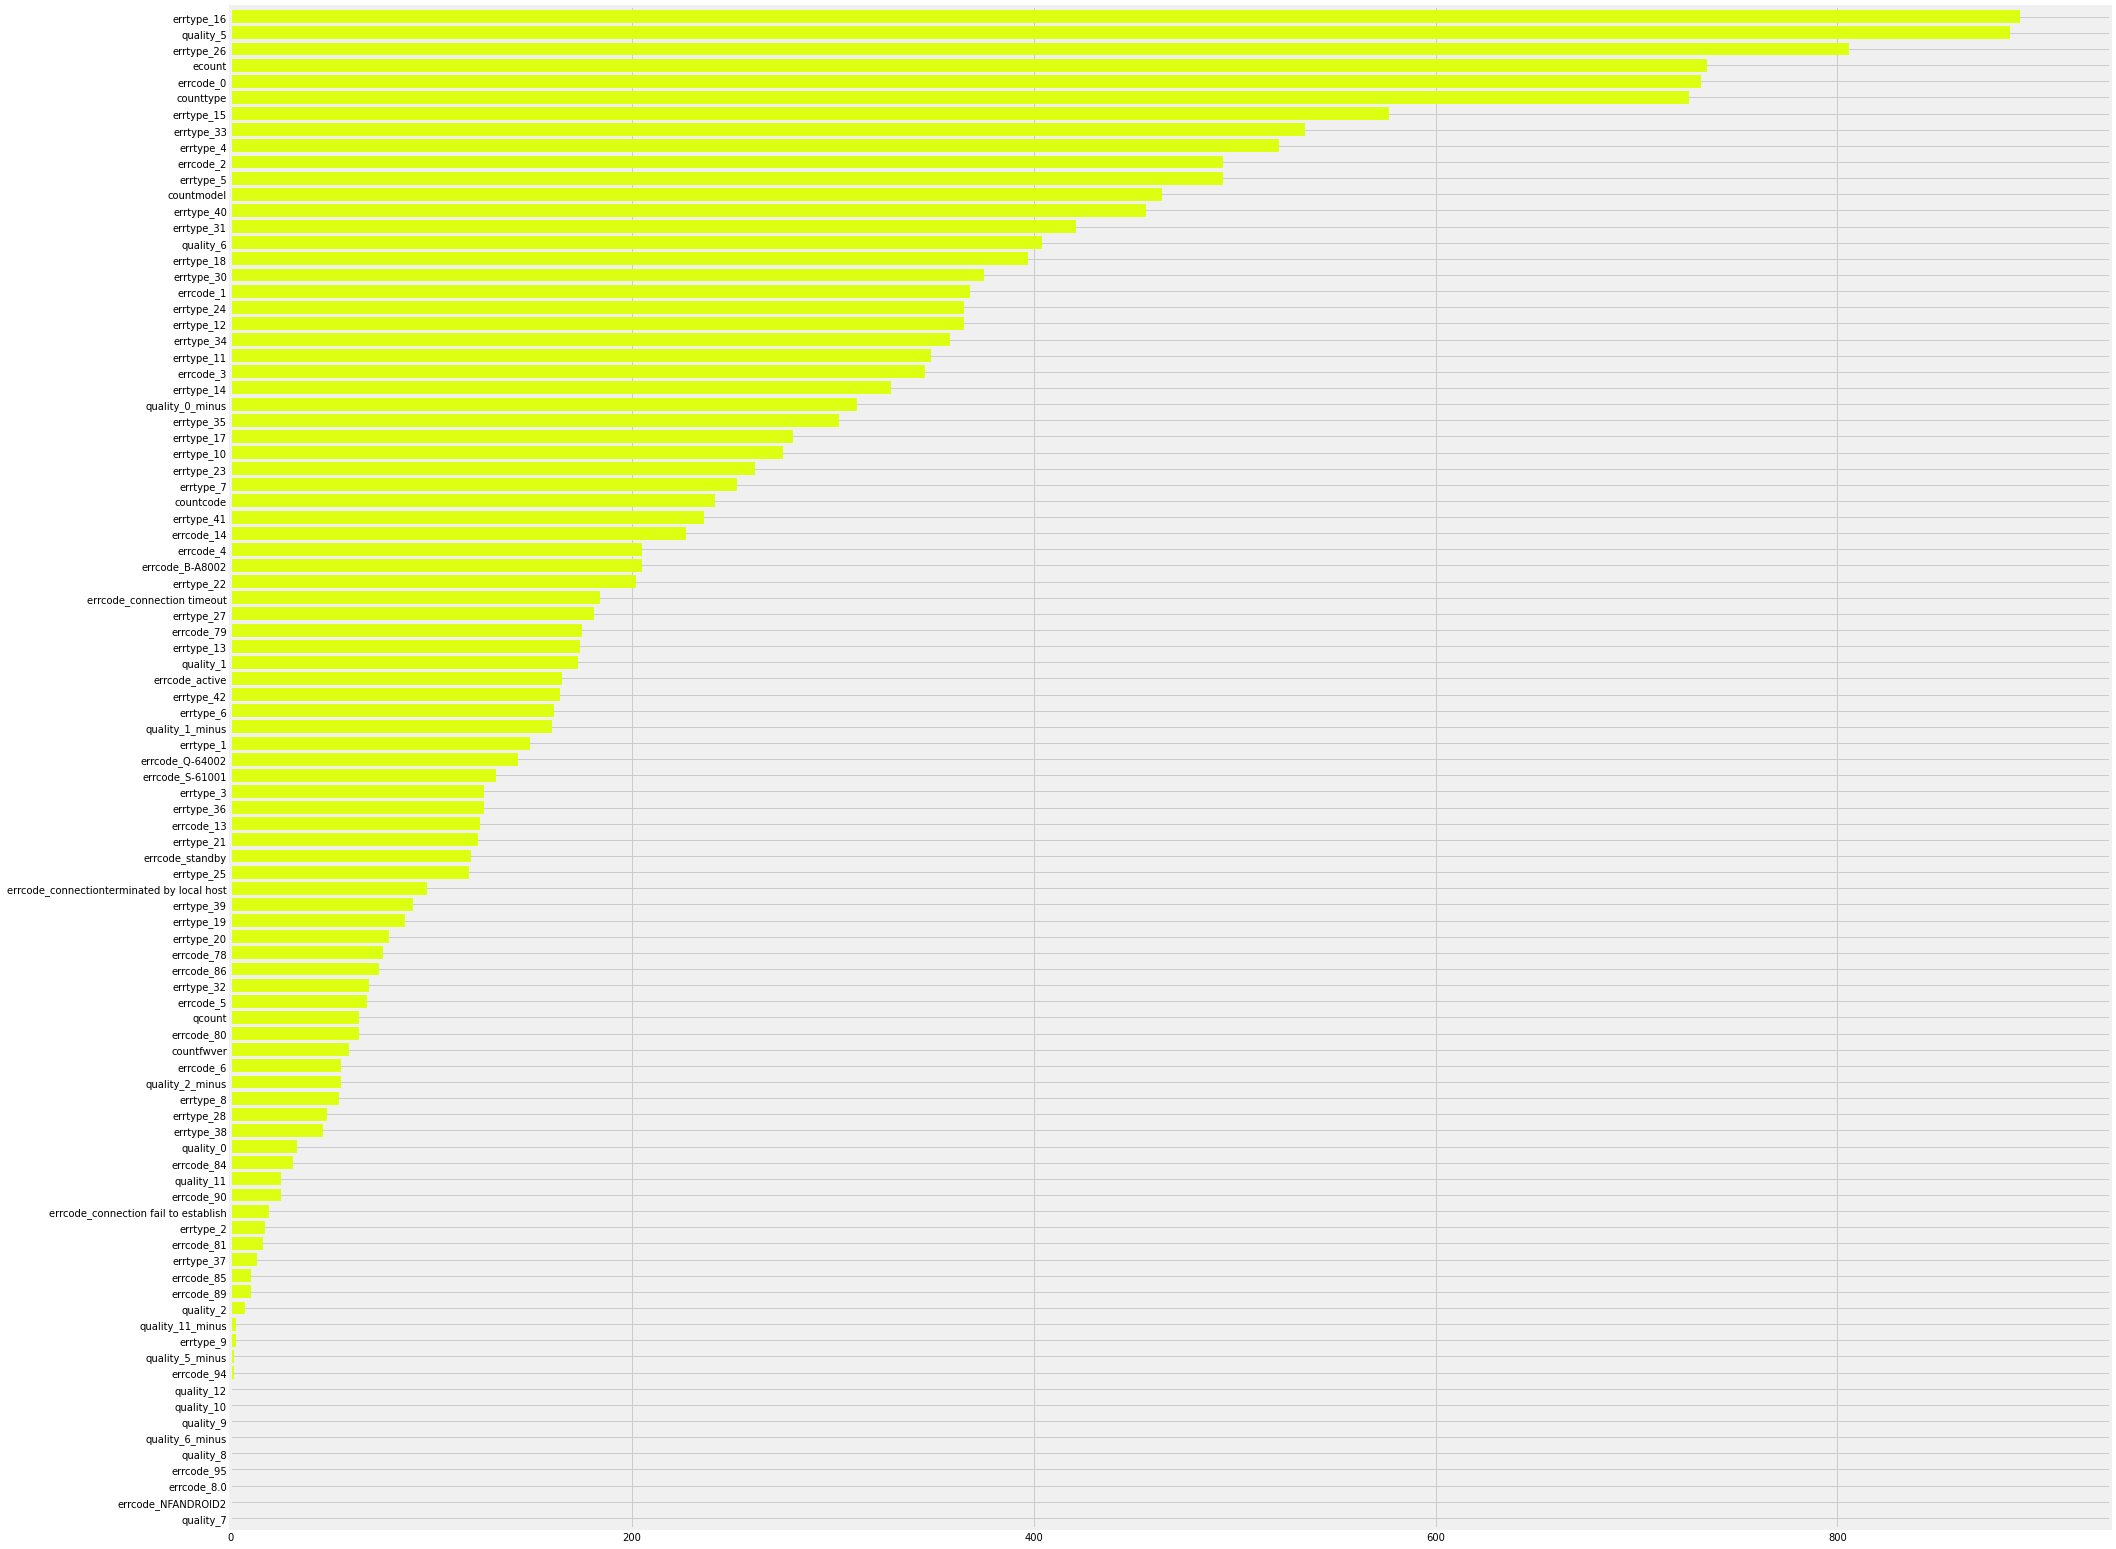

In [134]:
pd.Series(LGBM.feature_importances_,train_x.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(30,28) # fig그림 크기 조절
plt.show()

In [149]:
pd.Series(LGBM.feature_importances_,train_x.columns).sort_values(ascending=True)[0:30]

quality_7                                0
errcode_NFANDROID2                       0
errcode_8.0                              0
errcode_95                               0
quality_8                                0
quality_6_minus                          0
quality_9                                0
quality_10                               0
quality_12                               0
errcode_94                               2
quality_5_minus                          2
errtype_9                                3
quality_11_minus                         3
quality_2                                7
errcode_89                              10
errcode_85                              10
errtype_37                              13
errcode_81                              16
errtype_2                               17
errcode_connection fail to establish    19
errcode_90                              25
quality_11                              25
errcode_84                              31
quality_0  

In [135]:
pd.Series(LGBM.feature_importances_,train_x.columns).sort_values(ascending=False)[0:20]

errtype_16    891
quality_5     886
errtype_26    806
ecount        735
errcode_0     732
counttype     726
errtype_15    577
errtype_33    535
errtype_4     522
errcode_2     494
errtype_5     494
countmodel    464
errtype_40    456
errtype_31    421
quality_6     404
errtype_18    397
errtype_30    375
errcode_1     368
errtype_24    365
errtype_12    365
dtype: int32

In [158]:
train_final_=train_final.drop(['quality_7', 'quality_8', 'quality_9', 'quality_10', 'errcode_NFANDROID2',
       'errcode_95', 'quality_12', 'quality_6_minus', 'errcode_8.0', 'errcode_94',
       'quality_5_minus', 'errtype_9', 'quality_11_minus'], axis = 1)

test_final_=test_final.drop(['quality_7', 'quality_8', 'quality_9', 'quality_10', 'errcode_NFANDROID2',
       'errcode_95', 'quality_12', 'quality_6_minus', 'errcode_8.0', 'errcode_94',
       'quality_5_minus', 'errtype_9', 'quality_11_minus'], axis = 1)

In [159]:
train_x = train_final_.drop(["user_id","target"],axis=1)
train_y = train_final_.target
test_x = test_final_.drop(["user_id"],axis=1)

In [139]:
cross_val_score(LGBM,train_x, train_y,cv=10,scoring='roc_auc')

array([0.819416, 0.801838, 0.82566 , 0.809554, 0.827082, 0.82684 ,
       0.813754, 0.826675, 0.835446, 0.837374])

[0.81907 , 0.80201 , 0.824884, 0.808522, 0.82711 , 0.826317,
       0.81333 , 0.826909, 0.835098, 0.836676]

In [163]:
LGBM.fit(train_x, train_y)

LGBMClassifier(early_stoping_round=200, learning_rate=0.01, max_depth=5,
               metric='auc', n_estimators=1000, num_boost_round=1000,
               num_leaves=50, objective='binary', random_state=0)

In [165]:
proba_LG=pd.DataFrame(test_final['user_id'])
proba_LG['problem']=LGBM.predict_proba(test_x)[:,1]

In [166]:
proba_LG

,user_id,problem
0,30000,0.933886
1,30001,0.350821
2,30002,0.359685
3,30003,0.821744
4,30004,0.852472
...,...,...
14994,44994,0.221668
14995,44995,0.316619
14996,44996,0.623157
14997,44997,0.848578


In [167]:
proba_CAT

,user_id,problem
0,30000,0.958943
1,30001,0.348766
2,30002,0.322623
3,30003,0.820475
4,30004,0.951650
...,...,...
14994,44994,0.198331
14995,44995,0.311044
14996,44996,0.636971
14997,44997,0.794754


In [168]:
proba_NEW=0.3*proba_CAT.problem+0.7*proba_LG.problem

In [169]:
proba_NEW_p=proba_LG.copy()
proba_NEW_p['problem']=proba_NEW

In [173]:
proba_NEW_p

,user_id,problem
0,30000,0.941403
1,30001,0.350204
2,30002,0.348567
3,30003,0.821364
4,30004,0.882225
...,...,...
14994,44994,0.214667
14995,44995,0.314947
14996,44996,0.627301
14997,44997,0.832431


In [175]:
proba_NEW_p.to_csv(r"LG_CAT_countall.csv", index=False)